In [1]:
# Libraries
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [2]:
# Constant Variables
# Settings
ON_TIME_THRESHOLD_IN_SECONDS = 900

# Directories
DATA_DIRECTORY = 'data/'
GRAPHS_DIRECTORY = 'graphs/'
STATIC_DATA_DIRECTORY = 'static_data/'

# Filenames
EXTRACTED_REAL_TIME_DATA_FILENAME = 'extracted_real_time_data.json'
LATITUDE_BOXPLOT_BEFORE_CLEANING = 'latitude_boxplot_before_cleaning.png'
LONGITUDE_BOXPLOT_BEFORE_CLEANING = 'longitude_boxplot_before_cleaning.png'
LATITUDE_BOXPLOT_AFTER_CLEANING = 'latitude_boxplot_after_cleaning.png'
LONGITUDE_BOXPLOT_AFTER_CLEANING = 'longitude_boxplot_after_cleaning.png'
STOP_TIMES_FILENAME = 'stop_times.txt'
STOPS_FILENAME = 'stops.txt'
CLEANED_DATA_FILENAME = 'cleaned_data.json'

# Real Time Data (Cleaning)

In [3]:
# Read extracted_real_time_data.json
df_real_time_data = pd.read_json(DATA_DIRECTORY + EXTRACTED_REAL_TIME_DATA_FILENAME, dtype={'RecordedDate': 'str'})
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,11:38:23 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,11:41:33 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,11:34:14 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,11:41:03 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410


In [4]:
# Convert the time strings to datetime.time objects
df_real_time_data['RecordedTime'] = pd.to_datetime(df_real_time_data['RecordedTime'], format='%I:%M:%S %p').dt.time
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,23:38:23,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,23:41:33,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,23:34:14,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,23:41:03,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410


In [5]:
# Convert the date strings to datetime.date objects
df_real_time_data['RecordedDate'] = pd.to_datetime(df_real_time_data['RecordedDate'], format='%Y%m%d').dt.date
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,23:38:23,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,23:41:33,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,23:34:14,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,23:41:03,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10


In [6]:
# Drop the unrelated columns
df_real_time_data.drop(['VehicleNo', 'Destination', 'Pattern', 'RouteMap'], axis=1, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87917,13717298,R5,WEST,49.278533,-122.912750,23:38:23,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87919,13717236,R5,EAST,49.285817,-123.118700,23:34:14,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [7]:
# Drop all null values
df_real_time_data.dropna(axis=1, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87917,13717298,R5,WEST,49.278533,-122.912750,23:38:23,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87919,13717236,R5,EAST,49.285817,-123.118700,23:34:14,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [8]:
# Drop all duplicates
df_real_time_data.drop_duplicates(inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87915,13717184,R5,EAST,49.281133,-123.065783,23:40:30,2024-04-10
87916,13717345,R5,WEST,49.284533,-123.112633,23:41:14,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [9]:
# Filter the recorded time bewteen 7:00 to 23:00
df_real_time_data = df_real_time_data[(df_real_time_data['RecordedTime'].apply(lambda x: x.hour >= 7)) & (df_real_time_data['RecordedTime'].apply(lambda x: x.hour < 23))]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


In [10]:
# Filter the recorded date bewteen April 7 to April 10
df_real_time_data = df_real_time_data[(df_real_time_data['RecordedDate'].apply(lambda x: x.day >= 7)) & (df_real_time_data['RecordedDate'].apply(lambda x: x.day <= 10))]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


# Real Time Data (Outliers)

In [11]:
# Get the unique values of TripId
TripId_list = df_real_time_data['TripId'].unique()
TripId_list

array([13678409, 13678464, 13678465, 13678412, 13678470, 13678466,
       13678430, 13678437, 13678427, 13678445, 13678404, 13678471,
       13678433, 13678438, 13678423, 13678447, 13678435, 13678444,
       13678413, 13678446, 13678417, 13678451, 13678420, 13678460,
       13678414, 13678424, 13678459, 13678432, 13678449, 13678428,
       13678457, 13678456, 13678419, 13678415, 13678455, 13678407,
       13678454, 13678425, 13678442, 13678458, 13678410, 13678461,
       13678434, 13678405, 13678453, 13678469, 13678426, 13678468,
       13678431, 13678467, 13678418, 13678452, 13678416, 13678450,
       13678429, 13678443, 13678406, 13678441, 13678422, 13678440,
       13678421, 13678439, 13678225, 13678230, 13678228, 13678258,
       13678277, 13678216, 13678295, 13678248, 13678224, 13678303,
       13678306, 13678206, 13678294, 13678231, 13678274, 13678241,
       13678293, 13678195, 13678273, 13678236, 13678307, 13678198,
       13678288, 13678204, 13678312, 13678296, 13678218, 13678

In [12]:
# Get the unique values of RouteNo
RouteNo_list = df_real_time_data['RouteNo'].unique()
RouteNo_list

array([144, 145, 'R5'], dtype=object)

In [13]:
# Get the unique values of Direction
Direction_list = df_real_time_data['Direction'].unique()
Direction_list

array(['NORTH', 'SOUTH', 'WEST', 'EAST'], dtype=object)

In [14]:
# Get the stats of the real time data
df_real_time_data.describe()

,TripId,Latitude,Longitude
count,7.095700e+04,70957.000000,70957.000000
mean,1.369993e+07,49.151354,-122.686839
std,1.941392e+04,2.422940,6.082369
min,1.367819e+07,0.000000,-123.120783
25%,1.367843e+07,49.261850,-123.043317
50%,1.371718e+07,49.279150,-122.968883
75%,1.371733e+07,49.281133,-122.920783
max,1.372213e+07,49.288350,0.000000


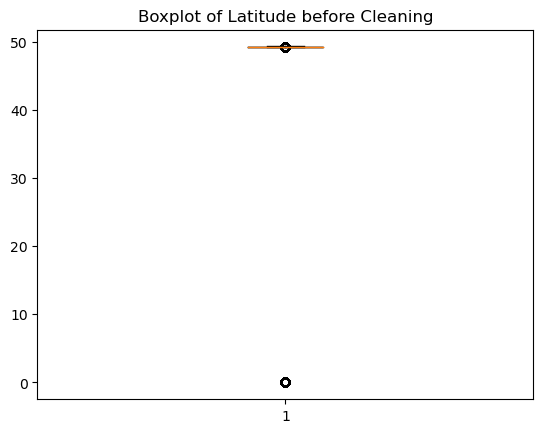

In [15]:
# Plot the graph of Latitude
plt.title('Boxplot of Latitude before Cleaning')
plt.boxplot(df_real_time_data['Latitude'])
plt.savefig(GRAPHS_DIRECTORY + LATITUDE_BOXPLOT_BEFORE_CLEANING)

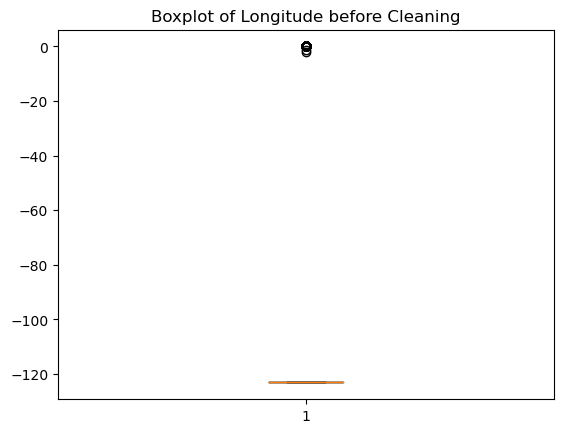

In [16]:
# Plot the graph of Longitude
plt.title('Boxplot of Longitude before Cleaning')
plt.boxplot(df_real_time_data['Longitude'])
plt.savefig(GRAPHS_DIRECTORY + LONGITUDE_BOXPLOT_BEFORE_CLEANING)

In [17]:
# Remove all outliers of Latitude and Longitude
latitude_head = df_real_time_data['Latitude'].quantile(0.01)
latitude_tail = df_real_time_data['Latitude'].quantile(0.99)
longitude_head = df_real_time_data['Longitude'].quantile(0.01)
longitude_tail = df_real_time_data['Longitude'].quantile(0.99)
df_real_time_data = df_real_time_data[(df_real_time_data['Latitude'] >= latitude_head) & 
        (df_real_time_data['Latitude'] <= latitude_tail) & 
        (df_real_time_data['Longitude'] >= longitude_head) & 
        (df_real_time_data['Longitude'] <= longitude_tail)]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
7,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07
8,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


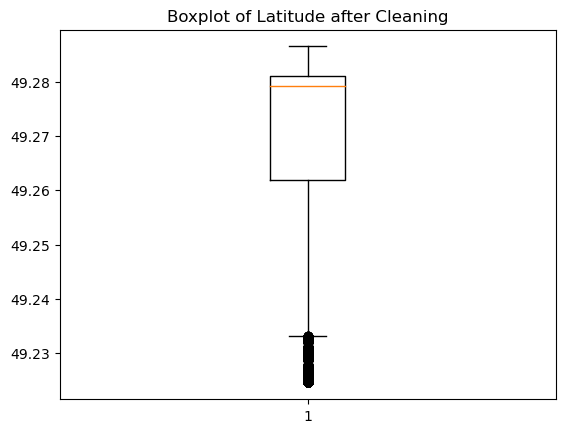

In [18]:
# Plot the graph of Latitude
plt.title('Boxplot of Latitude after Cleaning')
plt.boxplot(df_real_time_data['Latitude'])
plt.savefig(GRAPHS_DIRECTORY + LATITUDE_BOXPLOT_AFTER_CLEANING)

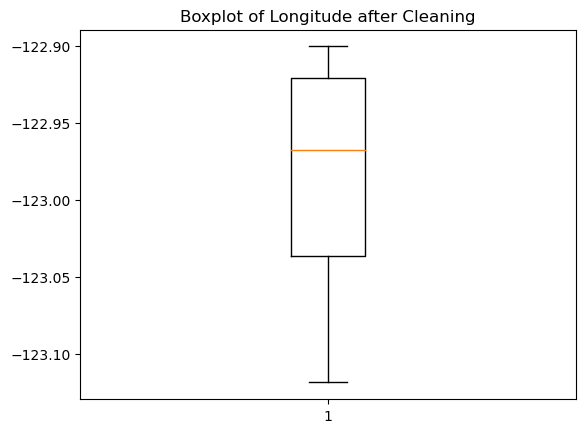

In [19]:
# Plot the graph of Longitude
plt.title('Boxplot of Longitude after Cleaning')
plt.boxplot(df_real_time_data['Longitude'])
plt.savefig(GRAPHS_DIRECTORY + LONGITUDE_BOXPLOT_AFTER_CLEANING)

In [20]:
# Reset the index of the real time data
df_real_time_data.reset_index(drop=True, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
1,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
2,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
3,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07
4,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07
...,...,...,...,...,...,...,...
68452,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
68453,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
68454,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
68455,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


# Static Data (Cleaning)

In [21]:
# Read stop_times.txt
df_stop_times = pd.read_csv(STATIC_DATA_DIRECTORY + STOP_TIMES_FILENAME)
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,13826154,09:24:00,09:24:00,7166,1,NaN,NaN,NaN,NaN,NaN
1,13826154,09:25:32,09:25:32,7096,2,NaN,NaN,NaN,0.4895,NaN
2,13826154,09:26:09,09:26:09,7093,3,NaN,NaN,NaN,0.6877,NaN
3,13826154,09:31:13,09:31:13,9291,4,NaN,NaN,NaN,2.2914,NaN
4,13826154,09:31:53,09:31:53,9292,5,NaN,NaN,NaN,2.5024,NaN
...,...,...,...,...,...,...,...,...,...,...
3546400,13698848,10:53:53,10:53:53,6038,26,NaN,NaN,NaN,9.2095,NaN
3546401,13698848,10:55:17,10:55:17,10695,27,NaN,NaN,NaN,9.6125,NaN
3546402,13698848,10:56:09,10:56:09,5310,28,NaN,NaN,NaN,9.8606,NaN
3546403,13698848,10:56:49,10:56:49,5311,29,NaN,NaN,NaN,10.0516,NaN


In [22]:
# Drop the unrelated columns
df_stop_times.drop(['departure_time', 'stop_sequence', 'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled', 'timepoint'], axis=1, inplace=True)
df_stop_times

,trip_id,arrival_time,stop_id
0,13826154,09:24:00,7166
1,13826154,09:25:32,7096
2,13826154,09:26:09,7093
3,13826154,09:31:13,9291
4,13826154,09:31:53,9292
...,...,...,...
3546400,13698848,10:53:53,6038
3546401,13698848,10:55:17,10695
3546402,13698848,10:56:09,5310
3546403,13698848,10:56:49,5311


In [23]:
# Filter the trip_id which is in the real time data
df_stop_times = df_stop_times[df_stop_times['trip_id'].isin(TripId_list)]
df_stop_times

,trip_id,arrival_time,stop_id
26864,13722115,10:40:00,9069
26865,13722115,10:40:59,11438
26866,13722115,10:42:38,2737
26867,13722115,10:45:05,2738
26868,13722115,10:51:25,2739
...,...,...,...
3542845,13717671,21:15:56,1863
3542846,13717671,21:17:34,1865
3542847,13717671,21:20:08,1870
3542848,13717671,21:27:51,1873


In [24]:
# Convert the time strings to the datatime.time objects
df_stop_times['arrival_time'] = pd.to_datetime(df_stop_times['arrival_time'], format='%H:%M:%S').dt.time
df_stop_times

C:\Users\Ching Hang\AppData\Local\Temp\ipykernel_9944\2095994125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop_times['arrival_time'] = pd.to_datetime(df_stop_times['arrival_time'], format='%H:%M:%S').dt.time


,trip_id,arrival_time,stop_id
26864,13722115,10:40:00,9069
26865,13722115,10:40:59,11438
26866,13722115,10:42:38,2737
26867,13722115,10:45:05,2738
26868,13722115,10:51:25,2739
...,...,...,...
3542845,13717671,21:15:56,1863
3542846,13717671,21:17:34,1865
3542847,13717671,21:20:08,1870
3542848,13717671,21:27:51,1873


In [25]:
# Read stops.txt
df_stops = pd.read_csv(STATIC_DATA_DIRECTORY + STOPS_FILENAME)
df_stops

,stop_lat,wheelchair_boarding,stop_code,stop_lon,stop_id,stop_url,parent_station,stop_desc,stop_name,location_type,zone_id
0,49.248581,1,53331.0,-122.843968,11543,NaN,NaN,NaN,Northbound Laurentian Cres @ Austin Ave,0,BUS ZN
1,49.170215,1,61521.0,-123.125653,11540,NaN,NaN,NaN,Westbound Westminster Hwy @ Garden City Rd,0,BUS ZN
2,49.219164,1,51114.0,-123.150433,11541,NaN,NaN,NaN,Southbound West Blvd @ W 57 Ave,0,BUS ZN
3,49.452388,2,61528.0,-123.236624,11546,NaN,NaN,NaN,Northbound Hwy 99 Onramp @ Kelvin Grove Way,0,BUS ZN
4,49.386350,2,61527.0,-123.258380,11547,NaN,NaN,NaN,Northbound Horseshoe Bay Dr @ Pasco Rd,0,BUS ZN
...,...,...,...,...,...,...,...,...,...,...,...
8854,49.184425,1,58156.0,-122.779179,8486,NaN,NaN,NaN,Westbound 100 Ave @ 160 St,0,BUS ZN
8855,49.184423,1,58157.0,-122.784642,8487,NaN,NaN,NaN,Westbound 100 Ave @ 158 St,0,BUS ZN
8856,49.051695,1,58236.0,-122.867263,8488,NaN,NaN,NaN,Northbound 128 St @ 26B Ave,0,BUS ZN
8857,49.101358,1,58237.0,-122.801231,8489,NaN,NaN,NaN,Southbound 152 St @ 54A Ave,0,BUS ZN


In [26]:
# Drop the unrelated columns
df_stops.drop(['wheelchair_boarding', 'stop_code', 'stop_url', 'parent_station', 'stop_desc', 'stop_name', 'location_type', 'zone_id'], axis=1, inplace=True)
df_stops

,stop_lat,stop_lon,stop_id
0,49.248581,-122.843968,11543
1,49.170215,-123.125653,11540
2,49.219164,-123.150433,11541
3,49.452388,-123.236624,11546
4,49.386350,-123.258380,11547
...,...,...,...
8854,49.184425,-122.779179,8486
8855,49.184423,-122.784642,8487
8856,49.051695,-122.867263,8488
8857,49.101358,-122.801231,8489


In [27]:
# Merge the stop times data and the stops data
df_static_data = pd.merge(df_stop_times, df_stops, on='stop_id', how='inner')
df_static_data

,trip_id,arrival_time,stop_id,stop_lat,stop_lon
0,13722115,10:40:00,9069,49.285902,-123.112537
1,13722113,18:37:00,9069,49.285902,-123.112537
2,13717285,09:09:00,9069,49.285902,-123.112537
3,13717265,18:12:00,9069,49.285902,-123.112537
4,13717264,19:27:00,9069,49.285902,-123.112537
...,...,...,...,...,...
16337,13717410,15:14:00,10553,49.284810,-123.112535
16338,13717411,07:27:00,10553,49.284810,-123.112535
16339,13717418,14:25:00,10553,49.284810,-123.112535
16340,13717419,14:19:00,10553,49.284810,-123.112535


In [28]:
# Drop the unrelated columns
df_static_data.drop(['stop_id'], axis=1, inplace=True)
df_static_data

,trip_id,arrival_time,stop_lat,stop_lon
0,13722115,10:40:00,49.285902,-123.112537
1,13722113,18:37:00,49.285902,-123.112537
2,13717285,09:09:00,49.285902,-123.112537
3,13717265,18:12:00,49.285902,-123.112537
4,13717264,19:27:00,49.285902,-123.112537
...,...,...,...,...
16337,13717410,15:14:00,49.284810,-123.112535
16338,13717411,07:27:00,49.284810,-123.112535
16339,13717418,14:25:00,49.284810,-123.112535
16340,13717419,14:19:00,49.284810,-123.112535


# OnTime Column

In [29]:
# Calculate the time difference in seconds
def time_difference(time1, time2):
    seconds1 = time1.hour * 3600 + time1.minute * 60 + time1.second
    seconds2 = time2.hour * 3600 + time2.minute * 60 + time2.second

    return abs(seconds2 - seconds1)

In [30]:
# Calculate the average speed for each trip_id
grouped_trip_id = df_static_data.groupby('trip_id')
total_distance = []
total_travel_time = []

# Loop for each trip_id
for trip_id, group_data in grouped_trip_id:
    # Sort the group_data
    sorted_group_data = group_data.sort_values(by='arrival_time')
    
    # Calculate the total distance
    distance = 0
    for i in range(len(sorted_group_data) - 1):
        distance += geodesic(
            (sorted_group_data.iloc[i]['stop_lat'], sorted_group_data.iloc[i]['stop_lon']),
            (sorted_group_data.iloc[i + 1]['stop_lat'], sorted_group_data.iloc[i + 1]['stop_lon'])
        ).meters
    
    # Calculate the total travel time
    travel_time = time_difference(sorted_group_data['arrival_time'].max(), sorted_group_data['arrival_time'].min())
    
    # Update the lists
    total_distance.append(distance)
    total_travel_time.append(travel_time)

In [31]:
# Create a data frame for average speed    
df_average_speed = pd.DataFrame({
    'trip_id': grouped_trip_id.groups.keys(),
    'total_distance': total_distance,
    'total_travel_time': total_travel_time
})
df_average_speed.set_index('trip_id', inplace=True)
df_average_speed['average_speed'] = df_average_speed['total_distance'] / df_average_speed['total_travel_time']

df_average_speed

,total_distance,total_travel_time,average_speed
trip_id,,,
13678189,14750.023217,3300,4.469704
13678190,14750.023217,2940,5.017015
13678191,14750.023217,2880,5.121536
13678192,14750.023217,2520,5.853184
13678193,14750.023217,2760,5.344211
...,...,...,...
13722115,6779.052845,1317,5.147345
13722121,6779.052845,1076,6.300235
13722123,6779.052845,1436,4.720789


In [32]:
# Loop for each row of the real time data
for index, row in df_real_time_data.iterrows():
    print('Calculating the row:', index)
    
    # Get the TripId
    trip_id = row['TripId']

    # Get the related bus stop schedule
    df_bus_stop_schedule = df_static_data[df_static_data['trip_id'] == trip_id]

    # Find the closest bus stop
    closest_bus_stop = None
    min_distance = float('inf')
    for _, bus_stop in df_bus_stop_schedule.iterrows():
        distance = geodesic(
            (row['Latitude'], row['Longitude']), 
            (bus_stop['stop_lat'], bus_stop['stop_lon'])
        ).meters
        
        if distance < min_distance:
            min_distance = distance
            closest_bus_stop = bus_stop

    # Calculate the time difference between the arrival time and the recorded time
    travel_time = time_difference(closest_bus_stop['arrival_time'], row['RecordedTime'])
            
    # Calculate the maximum travel time
    max_travel_time = min_distance / df_average_speed.loc[trip_id]['average_speed'] + ON_TIME_THRESHOLD_IN_SECONDS
    
    # Generate the result of on time
    on_time = travel_time <= max_travel_time
            
    # Update the real time data     
    df_real_time_data.at[index, 'OnTime'] = on_time

Calculating the row: 0
Calculating the row: 1
Calculating the row: 2
Calculating the row: 3
Calculating the row: 4
Calculating the row: 5
Calculating the row: 6
Calculating the row: 7
Calculating the row: 8
Calculating the row: 9
Calculating the row: 10
Calculating the row: 11
Calculating the row: 12
Calculating the row: 13
Calculating the row: 14
Calculating the row: 15
Calculating the row: 16


C:\Users\Ching Hang\AppData\Local\Temp\ipykernel_9944\4067405386.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_time_data.at[index, 'OnTime'] = on_time


Calculating the row: 17
Calculating the row: 18
Calculating the row: 19
Calculating the row: 20
Calculating the row: 21
Calculating the row: 22
Calculating the row: 23
Calculating the row: 24
Calculating the row: 25
Calculating the row: 26
Calculating the row: 27
Calculating the row: 28
Calculating the row: 29
Calculating the row: 30
Calculating the row: 31
Calculating the row: 32
Calculating the row: 33
Calculating the row: 34
Calculating the row: 35
Calculating the row: 36
Calculating the row: 37
Calculating the row: 38
Calculating the row: 39
Calculating the row: 40
Calculating the row: 41
Calculating the row: 42
Calculating the row: 43
Calculating the row: 44
Calculating the row: 45
Calculating the row: 46
Calculating the row: 47
Calculating the row: 48
Calculating the row: 49
Calculating the row: 50
Calculating the row: 51
Calculating the row: 52
Calculating the row: 53
Calculating the row: 54
Calculating the row: 55
Calculating the row: 56
Calculating the row: 57
Calculating the 

Calculating the row: 360
Calculating the row: 361
Calculating the row: 362
Calculating the row: 363
Calculating the row: 364
Calculating the row: 365
Calculating the row: 366
Calculating the row: 367
Calculating the row: 368
Calculating the row: 369
Calculating the row: 370
Calculating the row: 371
Calculating the row: 372
Calculating the row: 373
Calculating the row: 374
Calculating the row: 375
Calculating the row: 376
Calculating the row: 377
Calculating the row: 378
Calculating the row: 379
Calculating the row: 380
Calculating the row: 381
Calculating the row: 382
Calculating the row: 383
Calculating the row: 384
Calculating the row: 385
Calculating the row: 386
Calculating the row: 387
Calculating the row: 388
Calculating the row: 389
Calculating the row: 390
Calculating the row: 391
Calculating the row: 392
Calculating the row: 393
Calculating the row: 394
Calculating the row: 395
Calculating the row: 396
Calculating the row: 397
Calculating the row: 398
Calculating the row: 399


Calculating the row: 692
Calculating the row: 693
Calculating the row: 694
Calculating the row: 695
Calculating the row: 696
Calculating the row: 697
Calculating the row: 698
Calculating the row: 699
Calculating the row: 700
Calculating the row: 701
Calculating the row: 702
Calculating the row: 703
Calculating the row: 704
Calculating the row: 705
Calculating the row: 706
Calculating the row: 707
Calculating the row: 708
Calculating the row: 709
Calculating the row: 710
Calculating the row: 711
Calculating the row: 712
Calculating the row: 713
Calculating the row: 714
Calculating the row: 715
Calculating the row: 716
Calculating the row: 717
Calculating the row: 718
Calculating the row: 719
Calculating the row: 720
Calculating the row: 721
Calculating the row: 722
Calculating the row: 723
Calculating the row: 724
Calculating the row: 725
Calculating the row: 726
Calculating the row: 727
Calculating the row: 728
Calculating the row: 729
Calculating the row: 730
Calculating the row: 731


Calculating the row: 1035
Calculating the row: 1036
Calculating the row: 1037
Calculating the row: 1038
Calculating the row: 1039
Calculating the row: 1040
Calculating the row: 1041
Calculating the row: 1042
Calculating the row: 1043
Calculating the row: 1044
Calculating the row: 1045
Calculating the row: 1046
Calculating the row: 1047
Calculating the row: 1048
Calculating the row: 1049
Calculating the row: 1050
Calculating the row: 1051
Calculating the row: 1052
Calculating the row: 1053
Calculating the row: 1054
Calculating the row: 1055
Calculating the row: 1056
Calculating the row: 1057
Calculating the row: 1058
Calculating the row: 1059
Calculating the row: 1060
Calculating the row: 1061
Calculating the row: 1062
Calculating the row: 1063
Calculating the row: 1064
Calculating the row: 1065
Calculating the row: 1066
Calculating the row: 1067
Calculating the row: 1068
Calculating the row: 1069
Calculating the row: 1070
Calculating the row: 1071
Calculating the row: 1072
Calculating 

Calculating the row: 1352
Calculating the row: 1353
Calculating the row: 1354
Calculating the row: 1355
Calculating the row: 1356
Calculating the row: 1357
Calculating the row: 1358
Calculating the row: 1359
Calculating the row: 1360
Calculating the row: 1361
Calculating the row: 1362
Calculating the row: 1363
Calculating the row: 1364
Calculating the row: 1365
Calculating the row: 1366
Calculating the row: 1367
Calculating the row: 1368
Calculating the row: 1369
Calculating the row: 1370
Calculating the row: 1371
Calculating the row: 1372
Calculating the row: 1373
Calculating the row: 1374
Calculating the row: 1375
Calculating the row: 1376
Calculating the row: 1377
Calculating the row: 1378
Calculating the row: 1379
Calculating the row: 1380
Calculating the row: 1381
Calculating the row: 1382
Calculating the row: 1383
Calculating the row: 1384
Calculating the row: 1385
Calculating the row: 1386
Calculating the row: 1387
Calculating the row: 1388
Calculating the row: 1389
Calculating 

Calculating the row: 1674
Calculating the row: 1675
Calculating the row: 1676
Calculating the row: 1677
Calculating the row: 1678
Calculating the row: 1679
Calculating the row: 1680
Calculating the row: 1681
Calculating the row: 1682
Calculating the row: 1683
Calculating the row: 1684
Calculating the row: 1685
Calculating the row: 1686
Calculating the row: 1687
Calculating the row: 1688
Calculating the row: 1689
Calculating the row: 1690
Calculating the row: 1691
Calculating the row: 1692
Calculating the row: 1693
Calculating the row: 1694
Calculating the row: 1695
Calculating the row: 1696
Calculating the row: 1697
Calculating the row: 1698
Calculating the row: 1699
Calculating the row: 1700
Calculating the row: 1701
Calculating the row: 1702
Calculating the row: 1703
Calculating the row: 1704
Calculating the row: 1705
Calculating the row: 1706
Calculating the row: 1707
Calculating the row: 1708
Calculating the row: 1709
Calculating the row: 1710
Calculating the row: 1711
Calculating 

Calculating the row: 2003
Calculating the row: 2004
Calculating the row: 2005
Calculating the row: 2006
Calculating the row: 2007
Calculating the row: 2008
Calculating the row: 2009
Calculating the row: 2010
Calculating the row: 2011
Calculating the row: 2012
Calculating the row: 2013
Calculating the row: 2014
Calculating the row: 2015
Calculating the row: 2016
Calculating the row: 2017
Calculating the row: 2018
Calculating the row: 2019
Calculating the row: 2020
Calculating the row: 2021
Calculating the row: 2022
Calculating the row: 2023
Calculating the row: 2024
Calculating the row: 2025
Calculating the row: 2026
Calculating the row: 2027
Calculating the row: 2028
Calculating the row: 2029
Calculating the row: 2030
Calculating the row: 2031
Calculating the row: 2032
Calculating the row: 2033
Calculating the row: 2034
Calculating the row: 2035
Calculating the row: 2036
Calculating the row: 2037
Calculating the row: 2038
Calculating the row: 2039
Calculating the row: 2040
Calculating 

Calculating the row: 2327
Calculating the row: 2328
Calculating the row: 2329
Calculating the row: 2330
Calculating the row: 2331
Calculating the row: 2332
Calculating the row: 2333
Calculating the row: 2334
Calculating the row: 2335
Calculating the row: 2336
Calculating the row: 2337
Calculating the row: 2338
Calculating the row: 2339
Calculating the row: 2340
Calculating the row: 2341
Calculating the row: 2342
Calculating the row: 2343
Calculating the row: 2344
Calculating the row: 2345
Calculating the row: 2346
Calculating the row: 2347
Calculating the row: 2348
Calculating the row: 2349
Calculating the row: 2350
Calculating the row: 2351
Calculating the row: 2352
Calculating the row: 2353
Calculating the row: 2354
Calculating the row: 2355
Calculating the row: 2356
Calculating the row: 2357
Calculating the row: 2358
Calculating the row: 2359
Calculating the row: 2360
Calculating the row: 2361
Calculating the row: 2362
Calculating the row: 2363
Calculating the row: 2364
Calculating 

Calculating the row: 2651
Calculating the row: 2652
Calculating the row: 2653
Calculating the row: 2654
Calculating the row: 2655
Calculating the row: 2656
Calculating the row: 2657
Calculating the row: 2658
Calculating the row: 2659
Calculating the row: 2660
Calculating the row: 2661
Calculating the row: 2662
Calculating the row: 2663
Calculating the row: 2664
Calculating the row: 2665
Calculating the row: 2666
Calculating the row: 2667
Calculating the row: 2668
Calculating the row: 2669
Calculating the row: 2670
Calculating the row: 2671
Calculating the row: 2672
Calculating the row: 2673
Calculating the row: 2674
Calculating the row: 2675
Calculating the row: 2676
Calculating the row: 2677
Calculating the row: 2678
Calculating the row: 2679
Calculating the row: 2680
Calculating the row: 2681
Calculating the row: 2682
Calculating the row: 2683
Calculating the row: 2684
Calculating the row: 2685
Calculating the row: 2686
Calculating the row: 2687
Calculating the row: 2688
Calculating 

Calculating the row: 2976
Calculating the row: 2977
Calculating the row: 2978
Calculating the row: 2979
Calculating the row: 2980
Calculating the row: 2981
Calculating the row: 2982
Calculating the row: 2983
Calculating the row: 2984
Calculating the row: 2985
Calculating the row: 2986
Calculating the row: 2987
Calculating the row: 2988
Calculating the row: 2989
Calculating the row: 2990
Calculating the row: 2991
Calculating the row: 2992
Calculating the row: 2993
Calculating the row: 2994
Calculating the row: 2995
Calculating the row: 2996
Calculating the row: 2997
Calculating the row: 2998
Calculating the row: 2999
Calculating the row: 3000
Calculating the row: 3001
Calculating the row: 3002
Calculating the row: 3003
Calculating the row: 3004
Calculating the row: 3005
Calculating the row: 3006
Calculating the row: 3007
Calculating the row: 3008
Calculating the row: 3009
Calculating the row: 3010
Calculating the row: 3011
Calculating the row: 3012
Calculating the row: 3013
Calculating 

Calculating the row: 3297
Calculating the row: 3298
Calculating the row: 3299
Calculating the row: 3300
Calculating the row: 3301
Calculating the row: 3302
Calculating the row: 3303
Calculating the row: 3304
Calculating the row: 3305
Calculating the row: 3306
Calculating the row: 3307
Calculating the row: 3308
Calculating the row: 3309
Calculating the row: 3310
Calculating the row: 3311
Calculating the row: 3312
Calculating the row: 3313
Calculating the row: 3314
Calculating the row: 3315
Calculating the row: 3316
Calculating the row: 3317
Calculating the row: 3318
Calculating the row: 3319
Calculating the row: 3320
Calculating the row: 3321
Calculating the row: 3322
Calculating the row: 3323
Calculating the row: 3324
Calculating the row: 3325
Calculating the row: 3326
Calculating the row: 3327
Calculating the row: 3328
Calculating the row: 3329
Calculating the row: 3330
Calculating the row: 3331
Calculating the row: 3332
Calculating the row: 3333
Calculating the row: 3334
Calculating 

Calculating the row: 3626
Calculating the row: 3627
Calculating the row: 3628
Calculating the row: 3629
Calculating the row: 3630
Calculating the row: 3631
Calculating the row: 3632
Calculating the row: 3633
Calculating the row: 3634
Calculating the row: 3635
Calculating the row: 3636
Calculating the row: 3637
Calculating the row: 3638
Calculating the row: 3639
Calculating the row: 3640
Calculating the row: 3641
Calculating the row: 3642
Calculating the row: 3643
Calculating the row: 3644
Calculating the row: 3645
Calculating the row: 3646
Calculating the row: 3647
Calculating the row: 3648
Calculating the row: 3649
Calculating the row: 3650
Calculating the row: 3651
Calculating the row: 3652
Calculating the row: 3653
Calculating the row: 3654
Calculating the row: 3655
Calculating the row: 3656
Calculating the row: 3657
Calculating the row: 3658
Calculating the row: 3659
Calculating the row: 3660
Calculating the row: 3661
Calculating the row: 3662
Calculating the row: 3663
Calculating 

Calculating the row: 3953
Calculating the row: 3954
Calculating the row: 3955
Calculating the row: 3956
Calculating the row: 3957
Calculating the row: 3958
Calculating the row: 3959
Calculating the row: 3960
Calculating the row: 3961
Calculating the row: 3962
Calculating the row: 3963
Calculating the row: 3964
Calculating the row: 3965
Calculating the row: 3966
Calculating the row: 3967
Calculating the row: 3968
Calculating the row: 3969
Calculating the row: 3970
Calculating the row: 3971
Calculating the row: 3972
Calculating the row: 3973
Calculating the row: 3974
Calculating the row: 3975
Calculating the row: 3976
Calculating the row: 3977
Calculating the row: 3978
Calculating the row: 3979
Calculating the row: 3980
Calculating the row: 3981
Calculating the row: 3982
Calculating the row: 3983
Calculating the row: 3984
Calculating the row: 3985
Calculating the row: 3986
Calculating the row: 3987
Calculating the row: 3988
Calculating the row: 3989
Calculating the row: 3990
Calculating 

Calculating the row: 4276
Calculating the row: 4277
Calculating the row: 4278
Calculating the row: 4279
Calculating the row: 4280
Calculating the row: 4281
Calculating the row: 4282
Calculating the row: 4283
Calculating the row: 4284
Calculating the row: 4285
Calculating the row: 4286
Calculating the row: 4287
Calculating the row: 4288
Calculating the row: 4289
Calculating the row: 4290
Calculating the row: 4291
Calculating the row: 4292
Calculating the row: 4293
Calculating the row: 4294
Calculating the row: 4295
Calculating the row: 4296
Calculating the row: 4297
Calculating the row: 4298
Calculating the row: 4299
Calculating the row: 4300
Calculating the row: 4301
Calculating the row: 4302
Calculating the row: 4303
Calculating the row: 4304
Calculating the row: 4305
Calculating the row: 4306
Calculating the row: 4307
Calculating the row: 4308
Calculating the row: 4309
Calculating the row: 4310
Calculating the row: 4311
Calculating the row: 4312
Calculating the row: 4313
Calculating 

Calculating the row: 4604
Calculating the row: 4605
Calculating the row: 4606
Calculating the row: 4607
Calculating the row: 4608
Calculating the row: 4609
Calculating the row: 4610
Calculating the row: 4611
Calculating the row: 4612
Calculating the row: 4613
Calculating the row: 4614
Calculating the row: 4615
Calculating the row: 4616
Calculating the row: 4617
Calculating the row: 4618
Calculating the row: 4619
Calculating the row: 4620
Calculating the row: 4621
Calculating the row: 4622
Calculating the row: 4623
Calculating the row: 4624
Calculating the row: 4625
Calculating the row: 4626
Calculating the row: 4627
Calculating the row: 4628
Calculating the row: 4629
Calculating the row: 4630
Calculating the row: 4631
Calculating the row: 4632
Calculating the row: 4633
Calculating the row: 4634
Calculating the row: 4635
Calculating the row: 4636
Calculating the row: 4637
Calculating the row: 4638
Calculating the row: 4639
Calculating the row: 4640
Calculating the row: 4641
Calculating 

Calculating the row: 4937
Calculating the row: 4938
Calculating the row: 4939
Calculating the row: 4940
Calculating the row: 4941
Calculating the row: 4942
Calculating the row: 4943
Calculating the row: 4944
Calculating the row: 4945
Calculating the row: 4946
Calculating the row: 4947
Calculating the row: 4948
Calculating the row: 4949
Calculating the row: 4950
Calculating the row: 4951
Calculating the row: 4952
Calculating the row: 4953
Calculating the row: 4954
Calculating the row: 4955
Calculating the row: 4956
Calculating the row: 4957
Calculating the row: 4958
Calculating the row: 4959
Calculating the row: 4960
Calculating the row: 4961
Calculating the row: 4962
Calculating the row: 4963
Calculating the row: 4964
Calculating the row: 4965
Calculating the row: 4966
Calculating the row: 4967
Calculating the row: 4968
Calculating the row: 4969
Calculating the row: 4970
Calculating the row: 4971
Calculating the row: 4972
Calculating the row: 4973
Calculating the row: 4974
Calculating 

Calculating the row: 5262
Calculating the row: 5263
Calculating the row: 5264
Calculating the row: 5265
Calculating the row: 5266
Calculating the row: 5267
Calculating the row: 5268
Calculating the row: 5269
Calculating the row: 5270
Calculating the row: 5271
Calculating the row: 5272
Calculating the row: 5273
Calculating the row: 5274
Calculating the row: 5275
Calculating the row: 5276
Calculating the row: 5277
Calculating the row: 5278
Calculating the row: 5279
Calculating the row: 5280
Calculating the row: 5281
Calculating the row: 5282
Calculating the row: 5283
Calculating the row: 5284
Calculating the row: 5285
Calculating the row: 5286
Calculating the row: 5287
Calculating the row: 5288
Calculating the row: 5289
Calculating the row: 5290
Calculating the row: 5291
Calculating the row: 5292
Calculating the row: 5293
Calculating the row: 5294
Calculating the row: 5295
Calculating the row: 5296
Calculating the row: 5297
Calculating the row: 5298
Calculating the row: 5299
Calculating 

Calculating the row: 5582
Calculating the row: 5583
Calculating the row: 5584
Calculating the row: 5585
Calculating the row: 5586
Calculating the row: 5587
Calculating the row: 5588
Calculating the row: 5589
Calculating the row: 5590
Calculating the row: 5591
Calculating the row: 5592
Calculating the row: 5593
Calculating the row: 5594
Calculating the row: 5595
Calculating the row: 5596
Calculating the row: 5597
Calculating the row: 5598
Calculating the row: 5599
Calculating the row: 5600
Calculating the row: 5601
Calculating the row: 5602
Calculating the row: 5603
Calculating the row: 5604
Calculating the row: 5605
Calculating the row: 5606
Calculating the row: 5607
Calculating the row: 5608
Calculating the row: 5609
Calculating the row: 5610
Calculating the row: 5611
Calculating the row: 5612
Calculating the row: 5613
Calculating the row: 5614
Calculating the row: 5615
Calculating the row: 5616
Calculating the row: 5617
Calculating the row: 5618
Calculating the row: 5619
Calculating 

Calculating the row: 5913
Calculating the row: 5914
Calculating the row: 5915
Calculating the row: 5916
Calculating the row: 5917
Calculating the row: 5918
Calculating the row: 5919
Calculating the row: 5920
Calculating the row: 5921
Calculating the row: 5922
Calculating the row: 5923
Calculating the row: 5924
Calculating the row: 5925
Calculating the row: 5926
Calculating the row: 5927
Calculating the row: 5928
Calculating the row: 5929
Calculating the row: 5930
Calculating the row: 5931
Calculating the row: 5932
Calculating the row: 5933
Calculating the row: 5934
Calculating the row: 5935
Calculating the row: 5936
Calculating the row: 5937
Calculating the row: 5938
Calculating the row: 5939
Calculating the row: 5940
Calculating the row: 5941
Calculating the row: 5942
Calculating the row: 5943
Calculating the row: 5944
Calculating the row: 5945
Calculating the row: 5946
Calculating the row: 5947
Calculating the row: 5948
Calculating the row: 5949
Calculating the row: 5950
Calculating 

Calculating the row: 6230
Calculating the row: 6231
Calculating the row: 6232
Calculating the row: 6233
Calculating the row: 6234
Calculating the row: 6235
Calculating the row: 6236
Calculating the row: 6237
Calculating the row: 6238
Calculating the row: 6239
Calculating the row: 6240
Calculating the row: 6241
Calculating the row: 6242
Calculating the row: 6243
Calculating the row: 6244
Calculating the row: 6245
Calculating the row: 6246
Calculating the row: 6247
Calculating the row: 6248
Calculating the row: 6249
Calculating the row: 6250
Calculating the row: 6251
Calculating the row: 6252
Calculating the row: 6253
Calculating the row: 6254
Calculating the row: 6255
Calculating the row: 6256
Calculating the row: 6257
Calculating the row: 6258
Calculating the row: 6259
Calculating the row: 6260
Calculating the row: 6261
Calculating the row: 6262
Calculating the row: 6263
Calculating the row: 6264
Calculating the row: 6265
Calculating the row: 6266
Calculating the row: 6267
Calculating 

Calculating the row: 6551
Calculating the row: 6552
Calculating the row: 6553
Calculating the row: 6554
Calculating the row: 6555
Calculating the row: 6556
Calculating the row: 6557
Calculating the row: 6558
Calculating the row: 6559
Calculating the row: 6560
Calculating the row: 6561
Calculating the row: 6562
Calculating the row: 6563
Calculating the row: 6564
Calculating the row: 6565
Calculating the row: 6566
Calculating the row: 6567
Calculating the row: 6568
Calculating the row: 6569
Calculating the row: 6570
Calculating the row: 6571
Calculating the row: 6572
Calculating the row: 6573
Calculating the row: 6574
Calculating the row: 6575
Calculating the row: 6576
Calculating the row: 6577
Calculating the row: 6578
Calculating the row: 6579
Calculating the row: 6580
Calculating the row: 6581
Calculating the row: 6582
Calculating the row: 6583
Calculating the row: 6584
Calculating the row: 6585
Calculating the row: 6586
Calculating the row: 6587
Calculating the row: 6588
Calculating 

Calculating the row: 6874
Calculating the row: 6875
Calculating the row: 6876
Calculating the row: 6877
Calculating the row: 6878
Calculating the row: 6879
Calculating the row: 6880
Calculating the row: 6881
Calculating the row: 6882
Calculating the row: 6883
Calculating the row: 6884
Calculating the row: 6885
Calculating the row: 6886
Calculating the row: 6887
Calculating the row: 6888
Calculating the row: 6889
Calculating the row: 6890
Calculating the row: 6891
Calculating the row: 6892
Calculating the row: 6893
Calculating the row: 6894
Calculating the row: 6895
Calculating the row: 6896
Calculating the row: 6897
Calculating the row: 6898
Calculating the row: 6899
Calculating the row: 6900
Calculating the row: 6901
Calculating the row: 6902
Calculating the row: 6903
Calculating the row: 6904
Calculating the row: 6905
Calculating the row: 6906
Calculating the row: 6907
Calculating the row: 6908
Calculating the row: 6909
Calculating the row: 6910
Calculating the row: 6911
Calculating 

Calculating the row: 7192
Calculating the row: 7193
Calculating the row: 7194
Calculating the row: 7195
Calculating the row: 7196
Calculating the row: 7197
Calculating the row: 7198
Calculating the row: 7199
Calculating the row: 7200
Calculating the row: 7201
Calculating the row: 7202
Calculating the row: 7203
Calculating the row: 7204
Calculating the row: 7205
Calculating the row: 7206
Calculating the row: 7207
Calculating the row: 7208
Calculating the row: 7209
Calculating the row: 7210
Calculating the row: 7211
Calculating the row: 7212
Calculating the row: 7213
Calculating the row: 7214
Calculating the row: 7215
Calculating the row: 7216
Calculating the row: 7217
Calculating the row: 7218
Calculating the row: 7219
Calculating the row: 7220
Calculating the row: 7221
Calculating the row: 7222
Calculating the row: 7223
Calculating the row: 7224
Calculating the row: 7225
Calculating the row: 7226
Calculating the row: 7227
Calculating the row: 7228
Calculating the row: 7229
Calculating 

Calculating the row: 7512
Calculating the row: 7513
Calculating the row: 7514
Calculating the row: 7515
Calculating the row: 7516
Calculating the row: 7517
Calculating the row: 7518
Calculating the row: 7519
Calculating the row: 7520
Calculating the row: 7521
Calculating the row: 7522
Calculating the row: 7523
Calculating the row: 7524
Calculating the row: 7525
Calculating the row: 7526
Calculating the row: 7527
Calculating the row: 7528
Calculating the row: 7529
Calculating the row: 7530
Calculating the row: 7531
Calculating the row: 7532
Calculating the row: 7533
Calculating the row: 7534
Calculating the row: 7535
Calculating the row: 7536
Calculating the row: 7537
Calculating the row: 7538
Calculating the row: 7539
Calculating the row: 7540
Calculating the row: 7541
Calculating the row: 7542
Calculating the row: 7543
Calculating the row: 7544
Calculating the row: 7545
Calculating the row: 7546
Calculating the row: 7547
Calculating the row: 7548
Calculating the row: 7549
Calculating 

Calculating the row: 7838
Calculating the row: 7839
Calculating the row: 7840
Calculating the row: 7841
Calculating the row: 7842
Calculating the row: 7843
Calculating the row: 7844
Calculating the row: 7845
Calculating the row: 7846
Calculating the row: 7847
Calculating the row: 7848
Calculating the row: 7849
Calculating the row: 7850
Calculating the row: 7851
Calculating the row: 7852
Calculating the row: 7853
Calculating the row: 7854
Calculating the row: 7855
Calculating the row: 7856
Calculating the row: 7857
Calculating the row: 7858
Calculating the row: 7859
Calculating the row: 7860
Calculating the row: 7861
Calculating the row: 7862
Calculating the row: 7863
Calculating the row: 7864
Calculating the row: 7865
Calculating the row: 7866
Calculating the row: 7867
Calculating the row: 7868
Calculating the row: 7869
Calculating the row: 7870
Calculating the row: 7871
Calculating the row: 7872
Calculating the row: 7873
Calculating the row: 7874
Calculating the row: 7875
Calculating 

Calculating the row: 8157
Calculating the row: 8158
Calculating the row: 8159
Calculating the row: 8160
Calculating the row: 8161
Calculating the row: 8162
Calculating the row: 8163
Calculating the row: 8164
Calculating the row: 8165
Calculating the row: 8166
Calculating the row: 8167
Calculating the row: 8168
Calculating the row: 8169
Calculating the row: 8170
Calculating the row: 8171
Calculating the row: 8172
Calculating the row: 8173
Calculating the row: 8174
Calculating the row: 8175
Calculating the row: 8176
Calculating the row: 8177
Calculating the row: 8178
Calculating the row: 8179
Calculating the row: 8180
Calculating the row: 8181
Calculating the row: 8182
Calculating the row: 8183
Calculating the row: 8184
Calculating the row: 8185
Calculating the row: 8186
Calculating the row: 8187
Calculating the row: 8188
Calculating the row: 8189
Calculating the row: 8190
Calculating the row: 8191
Calculating the row: 8192
Calculating the row: 8193
Calculating the row: 8194
Calculating 

Calculating the row: 8486
Calculating the row: 8487
Calculating the row: 8488
Calculating the row: 8489
Calculating the row: 8490
Calculating the row: 8491
Calculating the row: 8492
Calculating the row: 8493
Calculating the row: 8494
Calculating the row: 8495
Calculating the row: 8496
Calculating the row: 8497
Calculating the row: 8498
Calculating the row: 8499
Calculating the row: 8500
Calculating the row: 8501
Calculating the row: 8502
Calculating the row: 8503
Calculating the row: 8504
Calculating the row: 8505
Calculating the row: 8506
Calculating the row: 8507
Calculating the row: 8508
Calculating the row: 8509
Calculating the row: 8510
Calculating the row: 8511
Calculating the row: 8512
Calculating the row: 8513
Calculating the row: 8514
Calculating the row: 8515
Calculating the row: 8516
Calculating the row: 8517
Calculating the row: 8518
Calculating the row: 8519
Calculating the row: 8520
Calculating the row: 8521
Calculating the row: 8522
Calculating the row: 8523
Calculating 

Calculating the row: 8813
Calculating the row: 8814
Calculating the row: 8815
Calculating the row: 8816
Calculating the row: 8817
Calculating the row: 8818
Calculating the row: 8819
Calculating the row: 8820
Calculating the row: 8821
Calculating the row: 8822
Calculating the row: 8823
Calculating the row: 8824
Calculating the row: 8825
Calculating the row: 8826
Calculating the row: 8827
Calculating the row: 8828
Calculating the row: 8829
Calculating the row: 8830
Calculating the row: 8831
Calculating the row: 8832
Calculating the row: 8833
Calculating the row: 8834
Calculating the row: 8835
Calculating the row: 8836
Calculating the row: 8837
Calculating the row: 8838
Calculating the row: 8839
Calculating the row: 8840
Calculating the row: 8841
Calculating the row: 8842
Calculating the row: 8843
Calculating the row: 8844
Calculating the row: 8845
Calculating the row: 8846
Calculating the row: 8847
Calculating the row: 8848
Calculating the row: 8849
Calculating the row: 8850
Calculating 

Calculating the row: 9144
Calculating the row: 9145
Calculating the row: 9146
Calculating the row: 9147
Calculating the row: 9148
Calculating the row: 9149
Calculating the row: 9150
Calculating the row: 9151
Calculating the row: 9152
Calculating the row: 9153
Calculating the row: 9154
Calculating the row: 9155
Calculating the row: 9156
Calculating the row: 9157
Calculating the row: 9158
Calculating the row: 9159
Calculating the row: 9160
Calculating the row: 9161
Calculating the row: 9162
Calculating the row: 9163
Calculating the row: 9164
Calculating the row: 9165
Calculating the row: 9166
Calculating the row: 9167
Calculating the row: 9168
Calculating the row: 9169
Calculating the row: 9170
Calculating the row: 9171
Calculating the row: 9172
Calculating the row: 9173
Calculating the row: 9174
Calculating the row: 9175
Calculating the row: 9176
Calculating the row: 9177
Calculating the row: 9178
Calculating the row: 9179
Calculating the row: 9180
Calculating the row: 9181
Calculating 

Calculating the row: 9466
Calculating the row: 9467
Calculating the row: 9468
Calculating the row: 9469
Calculating the row: 9470
Calculating the row: 9471
Calculating the row: 9472
Calculating the row: 9473
Calculating the row: 9474
Calculating the row: 9475
Calculating the row: 9476
Calculating the row: 9477
Calculating the row: 9478
Calculating the row: 9479
Calculating the row: 9480
Calculating the row: 9481
Calculating the row: 9482
Calculating the row: 9483
Calculating the row: 9484
Calculating the row: 9485
Calculating the row: 9486
Calculating the row: 9487
Calculating the row: 9488
Calculating the row: 9489
Calculating the row: 9490
Calculating the row: 9491
Calculating the row: 9492
Calculating the row: 9493
Calculating the row: 9494
Calculating the row: 9495
Calculating the row: 9496
Calculating the row: 9497
Calculating the row: 9498
Calculating the row: 9499
Calculating the row: 9500
Calculating the row: 9501
Calculating the row: 9502
Calculating the row: 9503
Calculating 

Calculating the row: 9794
Calculating the row: 9795
Calculating the row: 9796
Calculating the row: 9797
Calculating the row: 9798
Calculating the row: 9799
Calculating the row: 9800
Calculating the row: 9801
Calculating the row: 9802
Calculating the row: 9803
Calculating the row: 9804
Calculating the row: 9805
Calculating the row: 9806
Calculating the row: 9807
Calculating the row: 9808
Calculating the row: 9809
Calculating the row: 9810
Calculating the row: 9811
Calculating the row: 9812
Calculating the row: 9813
Calculating the row: 9814
Calculating the row: 9815
Calculating the row: 9816
Calculating the row: 9817
Calculating the row: 9818
Calculating the row: 9819
Calculating the row: 9820
Calculating the row: 9821
Calculating the row: 9822
Calculating the row: 9823
Calculating the row: 9824
Calculating the row: 9825
Calculating the row: 9826
Calculating the row: 9827
Calculating the row: 9828
Calculating the row: 9829
Calculating the row: 9830
Calculating the row: 9831
Calculating 

Calculating the row: 10122
Calculating the row: 10123
Calculating the row: 10124
Calculating the row: 10125
Calculating the row: 10126
Calculating the row: 10127
Calculating the row: 10128
Calculating the row: 10129
Calculating the row: 10130
Calculating the row: 10131
Calculating the row: 10132
Calculating the row: 10133
Calculating the row: 10134
Calculating the row: 10135
Calculating the row: 10136
Calculating the row: 10137
Calculating the row: 10138
Calculating the row: 10139
Calculating the row: 10140
Calculating the row: 10141
Calculating the row: 10142
Calculating the row: 10143
Calculating the row: 10144
Calculating the row: 10145
Calculating the row: 10146
Calculating the row: 10147
Calculating the row: 10148
Calculating the row: 10149
Calculating the row: 10150
Calculating the row: 10151
Calculating the row: 10152
Calculating the row: 10153
Calculating the row: 10154
Calculating the row: 10155
Calculating the row: 10156
Calculating the row: 10157
Calculating the row: 10158
C

Calculating the row: 10438
Calculating the row: 10439
Calculating the row: 10440
Calculating the row: 10441
Calculating the row: 10442
Calculating the row: 10443
Calculating the row: 10444
Calculating the row: 10445
Calculating the row: 10446
Calculating the row: 10447
Calculating the row: 10448
Calculating the row: 10449
Calculating the row: 10450
Calculating the row: 10451
Calculating the row: 10452
Calculating the row: 10453
Calculating the row: 10454
Calculating the row: 10455
Calculating the row: 10456
Calculating the row: 10457
Calculating the row: 10458
Calculating the row: 10459
Calculating the row: 10460
Calculating the row: 10461
Calculating the row: 10462
Calculating the row: 10463
Calculating the row: 10464
Calculating the row: 10465
Calculating the row: 10466
Calculating the row: 10467
Calculating the row: 10468
Calculating the row: 10469
Calculating the row: 10470
Calculating the row: 10471
Calculating the row: 10472
Calculating the row: 10473
Calculating the row: 10474
C

Calculating the row: 10748
Calculating the row: 10749
Calculating the row: 10750
Calculating the row: 10751
Calculating the row: 10752
Calculating the row: 10753
Calculating the row: 10754
Calculating the row: 10755
Calculating the row: 10756
Calculating the row: 10757
Calculating the row: 10758
Calculating the row: 10759
Calculating the row: 10760
Calculating the row: 10761
Calculating the row: 10762
Calculating the row: 10763
Calculating the row: 10764
Calculating the row: 10765
Calculating the row: 10766
Calculating the row: 10767
Calculating the row: 10768
Calculating the row: 10769
Calculating the row: 10770
Calculating the row: 10771
Calculating the row: 10772
Calculating the row: 10773
Calculating the row: 10774
Calculating the row: 10775
Calculating the row: 10776
Calculating the row: 10777
Calculating the row: 10778
Calculating the row: 10779
Calculating the row: 10780
Calculating the row: 10781
Calculating the row: 10782
Calculating the row: 10783
Calculating the row: 10784
C

Calculating the row: 11070
Calculating the row: 11071
Calculating the row: 11072
Calculating the row: 11073
Calculating the row: 11074
Calculating the row: 11075
Calculating the row: 11076
Calculating the row: 11077
Calculating the row: 11078
Calculating the row: 11079
Calculating the row: 11080
Calculating the row: 11081
Calculating the row: 11082
Calculating the row: 11083
Calculating the row: 11084
Calculating the row: 11085
Calculating the row: 11086
Calculating the row: 11087
Calculating the row: 11088
Calculating the row: 11089
Calculating the row: 11090
Calculating the row: 11091
Calculating the row: 11092
Calculating the row: 11093
Calculating the row: 11094
Calculating the row: 11095
Calculating the row: 11096
Calculating the row: 11097
Calculating the row: 11098
Calculating the row: 11099
Calculating the row: 11100
Calculating the row: 11101
Calculating the row: 11102
Calculating the row: 11103
Calculating the row: 11104
Calculating the row: 11105
Calculating the row: 11106
C

Calculating the row: 11385
Calculating the row: 11386
Calculating the row: 11387
Calculating the row: 11388
Calculating the row: 11389
Calculating the row: 11390
Calculating the row: 11391
Calculating the row: 11392
Calculating the row: 11393
Calculating the row: 11394
Calculating the row: 11395
Calculating the row: 11396
Calculating the row: 11397
Calculating the row: 11398
Calculating the row: 11399
Calculating the row: 11400
Calculating the row: 11401
Calculating the row: 11402
Calculating the row: 11403
Calculating the row: 11404
Calculating the row: 11405
Calculating the row: 11406
Calculating the row: 11407
Calculating the row: 11408
Calculating the row: 11409
Calculating the row: 11410
Calculating the row: 11411
Calculating the row: 11412
Calculating the row: 11413
Calculating the row: 11414
Calculating the row: 11415
Calculating the row: 11416
Calculating the row: 11417
Calculating the row: 11418
Calculating the row: 11419
Calculating the row: 11420
Calculating the row: 11421
C

Calculating the row: 11698
Calculating the row: 11699
Calculating the row: 11700
Calculating the row: 11701
Calculating the row: 11702
Calculating the row: 11703
Calculating the row: 11704
Calculating the row: 11705
Calculating the row: 11706
Calculating the row: 11707
Calculating the row: 11708
Calculating the row: 11709
Calculating the row: 11710
Calculating the row: 11711
Calculating the row: 11712
Calculating the row: 11713
Calculating the row: 11714
Calculating the row: 11715
Calculating the row: 11716
Calculating the row: 11717
Calculating the row: 11718
Calculating the row: 11719
Calculating the row: 11720
Calculating the row: 11721
Calculating the row: 11722
Calculating the row: 11723
Calculating the row: 11724
Calculating the row: 11725
Calculating the row: 11726
Calculating the row: 11727
Calculating the row: 11728
Calculating the row: 11729
Calculating the row: 11730
Calculating the row: 11731
Calculating the row: 11732
Calculating the row: 11733
Calculating the row: 11734
C

Calculating the row: 12010
Calculating the row: 12011
Calculating the row: 12012
Calculating the row: 12013
Calculating the row: 12014
Calculating the row: 12015
Calculating the row: 12016
Calculating the row: 12017
Calculating the row: 12018
Calculating the row: 12019
Calculating the row: 12020
Calculating the row: 12021
Calculating the row: 12022
Calculating the row: 12023
Calculating the row: 12024
Calculating the row: 12025
Calculating the row: 12026
Calculating the row: 12027
Calculating the row: 12028
Calculating the row: 12029
Calculating the row: 12030
Calculating the row: 12031
Calculating the row: 12032
Calculating the row: 12033
Calculating the row: 12034
Calculating the row: 12035
Calculating the row: 12036
Calculating the row: 12037
Calculating the row: 12038
Calculating the row: 12039
Calculating the row: 12040
Calculating the row: 12041
Calculating the row: 12042
Calculating the row: 12043
Calculating the row: 12044
Calculating the row: 12045
Calculating the row: 12046
C

Calculating the row: 12330
Calculating the row: 12331
Calculating the row: 12332
Calculating the row: 12333
Calculating the row: 12334
Calculating the row: 12335
Calculating the row: 12336
Calculating the row: 12337
Calculating the row: 12338
Calculating the row: 12339
Calculating the row: 12340
Calculating the row: 12341
Calculating the row: 12342
Calculating the row: 12343
Calculating the row: 12344
Calculating the row: 12345
Calculating the row: 12346
Calculating the row: 12347
Calculating the row: 12348
Calculating the row: 12349
Calculating the row: 12350
Calculating the row: 12351
Calculating the row: 12352
Calculating the row: 12353
Calculating the row: 12354
Calculating the row: 12355
Calculating the row: 12356
Calculating the row: 12357
Calculating the row: 12358
Calculating the row: 12359
Calculating the row: 12360
Calculating the row: 12361
Calculating the row: 12362
Calculating the row: 12363
Calculating the row: 12364
Calculating the row: 12365
Calculating the row: 12366
C

Calculating the row: 12648
Calculating the row: 12649
Calculating the row: 12650
Calculating the row: 12651
Calculating the row: 12652
Calculating the row: 12653
Calculating the row: 12654
Calculating the row: 12655
Calculating the row: 12656
Calculating the row: 12657
Calculating the row: 12658
Calculating the row: 12659
Calculating the row: 12660
Calculating the row: 12661
Calculating the row: 12662
Calculating the row: 12663
Calculating the row: 12664
Calculating the row: 12665
Calculating the row: 12666
Calculating the row: 12667
Calculating the row: 12668
Calculating the row: 12669
Calculating the row: 12670
Calculating the row: 12671
Calculating the row: 12672
Calculating the row: 12673
Calculating the row: 12674
Calculating the row: 12675
Calculating the row: 12676
Calculating the row: 12677
Calculating the row: 12678
Calculating the row: 12679
Calculating the row: 12680
Calculating the row: 12681
Calculating the row: 12682
Calculating the row: 12683
Calculating the row: 12684
C

Calculating the row: 12956
Calculating the row: 12957
Calculating the row: 12958
Calculating the row: 12959
Calculating the row: 12960
Calculating the row: 12961
Calculating the row: 12962
Calculating the row: 12963
Calculating the row: 12964
Calculating the row: 12965
Calculating the row: 12966
Calculating the row: 12967
Calculating the row: 12968
Calculating the row: 12969
Calculating the row: 12970
Calculating the row: 12971
Calculating the row: 12972
Calculating the row: 12973
Calculating the row: 12974
Calculating the row: 12975
Calculating the row: 12976
Calculating the row: 12977
Calculating the row: 12978
Calculating the row: 12979
Calculating the row: 12980
Calculating the row: 12981
Calculating the row: 12982
Calculating the row: 12983
Calculating the row: 12984
Calculating the row: 12985
Calculating the row: 12986
Calculating the row: 12987
Calculating the row: 12988
Calculating the row: 12989
Calculating the row: 12990
Calculating the row: 12991
Calculating the row: 12992
C

Calculating the row: 13260
Calculating the row: 13261
Calculating the row: 13262
Calculating the row: 13263
Calculating the row: 13264
Calculating the row: 13265
Calculating the row: 13266
Calculating the row: 13267
Calculating the row: 13268
Calculating the row: 13269
Calculating the row: 13270
Calculating the row: 13271
Calculating the row: 13272
Calculating the row: 13273
Calculating the row: 13274
Calculating the row: 13275
Calculating the row: 13276
Calculating the row: 13277
Calculating the row: 13278
Calculating the row: 13279
Calculating the row: 13280
Calculating the row: 13281
Calculating the row: 13282
Calculating the row: 13283
Calculating the row: 13284
Calculating the row: 13285
Calculating the row: 13286
Calculating the row: 13287
Calculating the row: 13288
Calculating the row: 13289
Calculating the row: 13290
Calculating the row: 13291
Calculating the row: 13292
Calculating the row: 13293
Calculating the row: 13294
Calculating the row: 13295
Calculating the row: 13296
C

Calculating the row: 13577
Calculating the row: 13578
Calculating the row: 13579
Calculating the row: 13580
Calculating the row: 13581
Calculating the row: 13582
Calculating the row: 13583
Calculating the row: 13584
Calculating the row: 13585
Calculating the row: 13586
Calculating the row: 13587
Calculating the row: 13588
Calculating the row: 13589
Calculating the row: 13590
Calculating the row: 13591
Calculating the row: 13592
Calculating the row: 13593
Calculating the row: 13594
Calculating the row: 13595
Calculating the row: 13596
Calculating the row: 13597
Calculating the row: 13598
Calculating the row: 13599
Calculating the row: 13600
Calculating the row: 13601
Calculating the row: 13602
Calculating the row: 13603
Calculating the row: 13604
Calculating the row: 13605
Calculating the row: 13606
Calculating the row: 13607
Calculating the row: 13608
Calculating the row: 13609
Calculating the row: 13610
Calculating the row: 13611
Calculating the row: 13612
Calculating the row: 13613
C

Calculating the row: 13891
Calculating the row: 13892
Calculating the row: 13893
Calculating the row: 13894
Calculating the row: 13895
Calculating the row: 13896
Calculating the row: 13897
Calculating the row: 13898
Calculating the row: 13899
Calculating the row: 13900
Calculating the row: 13901
Calculating the row: 13902
Calculating the row: 13903
Calculating the row: 13904
Calculating the row: 13905
Calculating the row: 13906
Calculating the row: 13907
Calculating the row: 13908
Calculating the row: 13909
Calculating the row: 13910
Calculating the row: 13911
Calculating the row: 13912
Calculating the row: 13913
Calculating the row: 13914
Calculating the row: 13915
Calculating the row: 13916
Calculating the row: 13917
Calculating the row: 13918
Calculating the row: 13919
Calculating the row: 13920
Calculating the row: 13921
Calculating the row: 13922
Calculating the row: 13923
Calculating the row: 13924
Calculating the row: 13925
Calculating the row: 13926
Calculating the row: 13927
C

Calculating the row: 14202
Calculating the row: 14203
Calculating the row: 14204
Calculating the row: 14205
Calculating the row: 14206
Calculating the row: 14207
Calculating the row: 14208
Calculating the row: 14209
Calculating the row: 14210
Calculating the row: 14211
Calculating the row: 14212
Calculating the row: 14213
Calculating the row: 14214
Calculating the row: 14215
Calculating the row: 14216
Calculating the row: 14217
Calculating the row: 14218
Calculating the row: 14219
Calculating the row: 14220
Calculating the row: 14221
Calculating the row: 14222
Calculating the row: 14223
Calculating the row: 14224
Calculating the row: 14225
Calculating the row: 14226
Calculating the row: 14227
Calculating the row: 14228
Calculating the row: 14229
Calculating the row: 14230
Calculating the row: 14231
Calculating the row: 14232
Calculating the row: 14233
Calculating the row: 14234
Calculating the row: 14235
Calculating the row: 14236
Calculating the row: 14237
Calculating the row: 14238
C

Calculating the row: 14510
Calculating the row: 14511
Calculating the row: 14512
Calculating the row: 14513
Calculating the row: 14514
Calculating the row: 14515
Calculating the row: 14516
Calculating the row: 14517
Calculating the row: 14518
Calculating the row: 14519
Calculating the row: 14520
Calculating the row: 14521
Calculating the row: 14522
Calculating the row: 14523
Calculating the row: 14524
Calculating the row: 14525
Calculating the row: 14526
Calculating the row: 14527
Calculating the row: 14528
Calculating the row: 14529
Calculating the row: 14530
Calculating the row: 14531
Calculating the row: 14532
Calculating the row: 14533
Calculating the row: 14534
Calculating the row: 14535
Calculating the row: 14536
Calculating the row: 14537
Calculating the row: 14538
Calculating the row: 14539
Calculating the row: 14540
Calculating the row: 14541
Calculating the row: 14542
Calculating the row: 14543
Calculating the row: 14544
Calculating the row: 14545
Calculating the row: 14546
C

Calculating the row: 14830
Calculating the row: 14831
Calculating the row: 14832
Calculating the row: 14833
Calculating the row: 14834
Calculating the row: 14835
Calculating the row: 14836
Calculating the row: 14837
Calculating the row: 14838
Calculating the row: 14839
Calculating the row: 14840
Calculating the row: 14841
Calculating the row: 14842
Calculating the row: 14843
Calculating the row: 14844
Calculating the row: 14845
Calculating the row: 14846
Calculating the row: 14847
Calculating the row: 14848
Calculating the row: 14849
Calculating the row: 14850
Calculating the row: 14851
Calculating the row: 14852
Calculating the row: 14853
Calculating the row: 14854
Calculating the row: 14855
Calculating the row: 14856
Calculating the row: 14857
Calculating the row: 14858
Calculating the row: 14859
Calculating the row: 14860
Calculating the row: 14861
Calculating the row: 14862
Calculating the row: 14863
Calculating the row: 14864
Calculating the row: 14865
Calculating the row: 14866
C

Calculating the row: 15146
Calculating the row: 15147
Calculating the row: 15148
Calculating the row: 15149
Calculating the row: 15150
Calculating the row: 15151
Calculating the row: 15152
Calculating the row: 15153
Calculating the row: 15154
Calculating the row: 15155
Calculating the row: 15156
Calculating the row: 15157
Calculating the row: 15158
Calculating the row: 15159
Calculating the row: 15160
Calculating the row: 15161
Calculating the row: 15162
Calculating the row: 15163
Calculating the row: 15164
Calculating the row: 15165
Calculating the row: 15166
Calculating the row: 15167
Calculating the row: 15168
Calculating the row: 15169
Calculating the row: 15170
Calculating the row: 15171
Calculating the row: 15172
Calculating the row: 15173
Calculating the row: 15174
Calculating the row: 15175
Calculating the row: 15176
Calculating the row: 15177
Calculating the row: 15178
Calculating the row: 15179
Calculating the row: 15180
Calculating the row: 15181
Calculating the row: 15182
C

Calculating the row: 15454
Calculating the row: 15455
Calculating the row: 15456
Calculating the row: 15457
Calculating the row: 15458
Calculating the row: 15459
Calculating the row: 15460
Calculating the row: 15461
Calculating the row: 15462
Calculating the row: 15463
Calculating the row: 15464
Calculating the row: 15465
Calculating the row: 15466
Calculating the row: 15467
Calculating the row: 15468
Calculating the row: 15469
Calculating the row: 15470
Calculating the row: 15471
Calculating the row: 15472
Calculating the row: 15473
Calculating the row: 15474
Calculating the row: 15475
Calculating the row: 15476
Calculating the row: 15477
Calculating the row: 15478
Calculating the row: 15479
Calculating the row: 15480
Calculating the row: 15481
Calculating the row: 15482
Calculating the row: 15483
Calculating the row: 15484
Calculating the row: 15485
Calculating the row: 15486
Calculating the row: 15487
Calculating the row: 15488
Calculating the row: 15489
Calculating the row: 15490
C

Calculating the row: 15761
Calculating the row: 15762
Calculating the row: 15763
Calculating the row: 15764
Calculating the row: 15765
Calculating the row: 15766
Calculating the row: 15767
Calculating the row: 15768
Calculating the row: 15769
Calculating the row: 15770
Calculating the row: 15771
Calculating the row: 15772
Calculating the row: 15773
Calculating the row: 15774
Calculating the row: 15775
Calculating the row: 15776
Calculating the row: 15777
Calculating the row: 15778
Calculating the row: 15779
Calculating the row: 15780
Calculating the row: 15781
Calculating the row: 15782
Calculating the row: 15783
Calculating the row: 15784
Calculating the row: 15785
Calculating the row: 15786
Calculating the row: 15787
Calculating the row: 15788
Calculating the row: 15789
Calculating the row: 15790
Calculating the row: 15791
Calculating the row: 15792
Calculating the row: 15793
Calculating the row: 15794
Calculating the row: 15795
Calculating the row: 15796
Calculating the row: 15797
C

Calculating the row: 16080
Calculating the row: 16081
Calculating the row: 16082
Calculating the row: 16083
Calculating the row: 16084
Calculating the row: 16085
Calculating the row: 16086
Calculating the row: 16087
Calculating the row: 16088
Calculating the row: 16089
Calculating the row: 16090
Calculating the row: 16091
Calculating the row: 16092
Calculating the row: 16093
Calculating the row: 16094
Calculating the row: 16095
Calculating the row: 16096
Calculating the row: 16097
Calculating the row: 16098
Calculating the row: 16099
Calculating the row: 16100
Calculating the row: 16101
Calculating the row: 16102
Calculating the row: 16103
Calculating the row: 16104
Calculating the row: 16105
Calculating the row: 16106
Calculating the row: 16107
Calculating the row: 16108
Calculating the row: 16109
Calculating the row: 16110
Calculating the row: 16111
Calculating the row: 16112
Calculating the row: 16113
Calculating the row: 16114
Calculating the row: 16115
Calculating the row: 16116
C

Calculating the row: 16388
Calculating the row: 16389
Calculating the row: 16390
Calculating the row: 16391
Calculating the row: 16392
Calculating the row: 16393
Calculating the row: 16394
Calculating the row: 16395
Calculating the row: 16396
Calculating the row: 16397
Calculating the row: 16398
Calculating the row: 16399
Calculating the row: 16400
Calculating the row: 16401
Calculating the row: 16402
Calculating the row: 16403
Calculating the row: 16404
Calculating the row: 16405
Calculating the row: 16406
Calculating the row: 16407
Calculating the row: 16408
Calculating the row: 16409
Calculating the row: 16410
Calculating the row: 16411
Calculating the row: 16412
Calculating the row: 16413
Calculating the row: 16414
Calculating the row: 16415
Calculating the row: 16416
Calculating the row: 16417
Calculating the row: 16418
Calculating the row: 16419
Calculating the row: 16420
Calculating the row: 16421
Calculating the row: 16422
Calculating the row: 16423
Calculating the row: 16424
C

Calculating the row: 16699
Calculating the row: 16700
Calculating the row: 16701
Calculating the row: 16702
Calculating the row: 16703
Calculating the row: 16704
Calculating the row: 16705
Calculating the row: 16706
Calculating the row: 16707
Calculating the row: 16708
Calculating the row: 16709
Calculating the row: 16710
Calculating the row: 16711
Calculating the row: 16712
Calculating the row: 16713
Calculating the row: 16714
Calculating the row: 16715
Calculating the row: 16716
Calculating the row: 16717
Calculating the row: 16718
Calculating the row: 16719
Calculating the row: 16720
Calculating the row: 16721
Calculating the row: 16722
Calculating the row: 16723
Calculating the row: 16724
Calculating the row: 16725
Calculating the row: 16726
Calculating the row: 16727
Calculating the row: 16728
Calculating the row: 16729
Calculating the row: 16730
Calculating the row: 16731
Calculating the row: 16732
Calculating the row: 16733
Calculating the row: 16734
Calculating the row: 16735
C

Calculating the row: 17018
Calculating the row: 17019
Calculating the row: 17020
Calculating the row: 17021
Calculating the row: 17022
Calculating the row: 17023
Calculating the row: 17024
Calculating the row: 17025
Calculating the row: 17026
Calculating the row: 17027
Calculating the row: 17028
Calculating the row: 17029
Calculating the row: 17030
Calculating the row: 17031
Calculating the row: 17032
Calculating the row: 17033
Calculating the row: 17034
Calculating the row: 17035
Calculating the row: 17036
Calculating the row: 17037
Calculating the row: 17038
Calculating the row: 17039
Calculating the row: 17040
Calculating the row: 17041
Calculating the row: 17042
Calculating the row: 17043
Calculating the row: 17044
Calculating the row: 17045
Calculating the row: 17046
Calculating the row: 17047
Calculating the row: 17048
Calculating the row: 17049
Calculating the row: 17050
Calculating the row: 17051
Calculating the row: 17052
Calculating the row: 17053
Calculating the row: 17054
C

Calculating the row: 17329
Calculating the row: 17330
Calculating the row: 17331
Calculating the row: 17332
Calculating the row: 17333
Calculating the row: 17334
Calculating the row: 17335
Calculating the row: 17336
Calculating the row: 17337
Calculating the row: 17338
Calculating the row: 17339
Calculating the row: 17340
Calculating the row: 17341
Calculating the row: 17342
Calculating the row: 17343
Calculating the row: 17344
Calculating the row: 17345
Calculating the row: 17346
Calculating the row: 17347
Calculating the row: 17348
Calculating the row: 17349
Calculating the row: 17350
Calculating the row: 17351
Calculating the row: 17352
Calculating the row: 17353
Calculating the row: 17354
Calculating the row: 17355
Calculating the row: 17356
Calculating the row: 17357
Calculating the row: 17358
Calculating the row: 17359
Calculating the row: 17360
Calculating the row: 17361
Calculating the row: 17362
Calculating the row: 17363
Calculating the row: 17364
Calculating the row: 17365
C

Calculating the row: 17633
Calculating the row: 17634
Calculating the row: 17635
Calculating the row: 17636
Calculating the row: 17637
Calculating the row: 17638
Calculating the row: 17639
Calculating the row: 17640
Calculating the row: 17641
Calculating the row: 17642
Calculating the row: 17643
Calculating the row: 17644
Calculating the row: 17645
Calculating the row: 17646
Calculating the row: 17647
Calculating the row: 17648
Calculating the row: 17649
Calculating the row: 17650
Calculating the row: 17651
Calculating the row: 17652
Calculating the row: 17653
Calculating the row: 17654
Calculating the row: 17655
Calculating the row: 17656
Calculating the row: 17657
Calculating the row: 17658
Calculating the row: 17659
Calculating the row: 17660
Calculating the row: 17661
Calculating the row: 17662
Calculating the row: 17663
Calculating the row: 17664
Calculating the row: 17665
Calculating the row: 17666
Calculating the row: 17667
Calculating the row: 17668
Calculating the row: 17669
C

Calculating the row: 17942
Calculating the row: 17943
Calculating the row: 17944
Calculating the row: 17945
Calculating the row: 17946
Calculating the row: 17947
Calculating the row: 17948
Calculating the row: 17949
Calculating the row: 17950
Calculating the row: 17951
Calculating the row: 17952
Calculating the row: 17953
Calculating the row: 17954
Calculating the row: 17955
Calculating the row: 17956
Calculating the row: 17957
Calculating the row: 17958
Calculating the row: 17959
Calculating the row: 17960
Calculating the row: 17961
Calculating the row: 17962
Calculating the row: 17963
Calculating the row: 17964
Calculating the row: 17965
Calculating the row: 17966
Calculating the row: 17967
Calculating the row: 17968
Calculating the row: 17969
Calculating the row: 17970
Calculating the row: 17971
Calculating the row: 17972
Calculating the row: 17973
Calculating the row: 17974
Calculating the row: 17975
Calculating the row: 17976
Calculating the row: 17977
Calculating the row: 17978
C

Calculating the row: 18252
Calculating the row: 18253
Calculating the row: 18254
Calculating the row: 18255
Calculating the row: 18256
Calculating the row: 18257
Calculating the row: 18258
Calculating the row: 18259
Calculating the row: 18260
Calculating the row: 18261
Calculating the row: 18262
Calculating the row: 18263
Calculating the row: 18264
Calculating the row: 18265
Calculating the row: 18266
Calculating the row: 18267
Calculating the row: 18268
Calculating the row: 18269
Calculating the row: 18270
Calculating the row: 18271
Calculating the row: 18272
Calculating the row: 18273
Calculating the row: 18274
Calculating the row: 18275
Calculating the row: 18276
Calculating the row: 18277
Calculating the row: 18278
Calculating the row: 18279
Calculating the row: 18280
Calculating the row: 18281
Calculating the row: 18282
Calculating the row: 18283
Calculating the row: 18284
Calculating the row: 18285
Calculating the row: 18286
Calculating the row: 18287
Calculating the row: 18288
C

Calculating the row: 18565
Calculating the row: 18566
Calculating the row: 18567
Calculating the row: 18568
Calculating the row: 18569
Calculating the row: 18570
Calculating the row: 18571
Calculating the row: 18572
Calculating the row: 18573
Calculating the row: 18574
Calculating the row: 18575
Calculating the row: 18576
Calculating the row: 18577
Calculating the row: 18578
Calculating the row: 18579
Calculating the row: 18580
Calculating the row: 18581
Calculating the row: 18582
Calculating the row: 18583
Calculating the row: 18584
Calculating the row: 18585
Calculating the row: 18586
Calculating the row: 18587
Calculating the row: 18588
Calculating the row: 18589
Calculating the row: 18590
Calculating the row: 18591
Calculating the row: 18592
Calculating the row: 18593
Calculating the row: 18594
Calculating the row: 18595
Calculating the row: 18596
Calculating the row: 18597
Calculating the row: 18598
Calculating the row: 18599
Calculating the row: 18600
Calculating the row: 18601
C

Calculating the row: 18877
Calculating the row: 18878
Calculating the row: 18879
Calculating the row: 18880
Calculating the row: 18881
Calculating the row: 18882
Calculating the row: 18883
Calculating the row: 18884
Calculating the row: 18885
Calculating the row: 18886
Calculating the row: 18887
Calculating the row: 18888
Calculating the row: 18889
Calculating the row: 18890
Calculating the row: 18891
Calculating the row: 18892
Calculating the row: 18893
Calculating the row: 18894
Calculating the row: 18895
Calculating the row: 18896
Calculating the row: 18897
Calculating the row: 18898
Calculating the row: 18899
Calculating the row: 18900
Calculating the row: 18901
Calculating the row: 18902
Calculating the row: 18903
Calculating the row: 18904
Calculating the row: 18905
Calculating the row: 18906
Calculating the row: 18907
Calculating the row: 18908
Calculating the row: 18909
Calculating the row: 18910
Calculating the row: 18911
Calculating the row: 18912
Calculating the row: 18913
C

Calculating the row: 19195
Calculating the row: 19196
Calculating the row: 19197
Calculating the row: 19198
Calculating the row: 19199
Calculating the row: 19200
Calculating the row: 19201
Calculating the row: 19202
Calculating the row: 19203
Calculating the row: 19204
Calculating the row: 19205
Calculating the row: 19206
Calculating the row: 19207
Calculating the row: 19208
Calculating the row: 19209
Calculating the row: 19210
Calculating the row: 19211
Calculating the row: 19212
Calculating the row: 19213
Calculating the row: 19214
Calculating the row: 19215
Calculating the row: 19216
Calculating the row: 19217
Calculating the row: 19218
Calculating the row: 19219
Calculating the row: 19220
Calculating the row: 19221
Calculating the row: 19222
Calculating the row: 19223
Calculating the row: 19224
Calculating the row: 19225
Calculating the row: 19226
Calculating the row: 19227
Calculating the row: 19228
Calculating the row: 19229
Calculating the row: 19230
Calculating the row: 19231
C

Calculating the row: 19511
Calculating the row: 19512
Calculating the row: 19513
Calculating the row: 19514
Calculating the row: 19515
Calculating the row: 19516
Calculating the row: 19517
Calculating the row: 19518
Calculating the row: 19519
Calculating the row: 19520
Calculating the row: 19521
Calculating the row: 19522
Calculating the row: 19523
Calculating the row: 19524
Calculating the row: 19525
Calculating the row: 19526
Calculating the row: 19527
Calculating the row: 19528
Calculating the row: 19529
Calculating the row: 19530
Calculating the row: 19531
Calculating the row: 19532
Calculating the row: 19533
Calculating the row: 19534
Calculating the row: 19535
Calculating the row: 19536
Calculating the row: 19537
Calculating the row: 19538
Calculating the row: 19539
Calculating the row: 19540
Calculating the row: 19541
Calculating the row: 19542
Calculating the row: 19543
Calculating the row: 19544
Calculating the row: 19545
Calculating the row: 19546
Calculating the row: 19547
C

Calculating the row: 19836
Calculating the row: 19837
Calculating the row: 19838
Calculating the row: 19839
Calculating the row: 19840
Calculating the row: 19841
Calculating the row: 19842
Calculating the row: 19843
Calculating the row: 19844
Calculating the row: 19845
Calculating the row: 19846
Calculating the row: 19847
Calculating the row: 19848
Calculating the row: 19849
Calculating the row: 19850
Calculating the row: 19851
Calculating the row: 19852
Calculating the row: 19853
Calculating the row: 19854
Calculating the row: 19855
Calculating the row: 19856
Calculating the row: 19857
Calculating the row: 19858
Calculating the row: 19859
Calculating the row: 19860
Calculating the row: 19861
Calculating the row: 19862
Calculating the row: 19863
Calculating the row: 19864
Calculating the row: 19865
Calculating the row: 19866
Calculating the row: 19867
Calculating the row: 19868
Calculating the row: 19869
Calculating the row: 19870
Calculating the row: 19871
Calculating the row: 19872
C

Calculating the row: 20156
Calculating the row: 20157
Calculating the row: 20158
Calculating the row: 20159
Calculating the row: 20160
Calculating the row: 20161
Calculating the row: 20162
Calculating the row: 20163
Calculating the row: 20164
Calculating the row: 20165
Calculating the row: 20166
Calculating the row: 20167
Calculating the row: 20168
Calculating the row: 20169
Calculating the row: 20170
Calculating the row: 20171
Calculating the row: 20172
Calculating the row: 20173
Calculating the row: 20174
Calculating the row: 20175
Calculating the row: 20176
Calculating the row: 20177
Calculating the row: 20178
Calculating the row: 20179
Calculating the row: 20180
Calculating the row: 20181
Calculating the row: 20182
Calculating the row: 20183
Calculating the row: 20184
Calculating the row: 20185
Calculating the row: 20186
Calculating the row: 20187
Calculating the row: 20188
Calculating the row: 20189
Calculating the row: 20190
Calculating the row: 20191
Calculating the row: 20192
C

Calculating the row: 20487
Calculating the row: 20488
Calculating the row: 20489
Calculating the row: 20490
Calculating the row: 20491
Calculating the row: 20492
Calculating the row: 20493
Calculating the row: 20494
Calculating the row: 20495
Calculating the row: 20496
Calculating the row: 20497
Calculating the row: 20498
Calculating the row: 20499
Calculating the row: 20500
Calculating the row: 20501
Calculating the row: 20502
Calculating the row: 20503
Calculating the row: 20504
Calculating the row: 20505
Calculating the row: 20506
Calculating the row: 20507
Calculating the row: 20508
Calculating the row: 20509
Calculating the row: 20510
Calculating the row: 20511
Calculating the row: 20512
Calculating the row: 20513
Calculating the row: 20514
Calculating the row: 20515
Calculating the row: 20516
Calculating the row: 20517
Calculating the row: 20518
Calculating the row: 20519
Calculating the row: 20520
Calculating the row: 20521
Calculating the row: 20522
Calculating the row: 20523
C

Calculating the row: 20817
Calculating the row: 20818
Calculating the row: 20819
Calculating the row: 20820
Calculating the row: 20821
Calculating the row: 20822
Calculating the row: 20823
Calculating the row: 20824
Calculating the row: 20825
Calculating the row: 20826
Calculating the row: 20827
Calculating the row: 20828
Calculating the row: 20829
Calculating the row: 20830
Calculating the row: 20831
Calculating the row: 20832
Calculating the row: 20833
Calculating the row: 20834
Calculating the row: 20835
Calculating the row: 20836
Calculating the row: 20837
Calculating the row: 20838
Calculating the row: 20839
Calculating the row: 20840
Calculating the row: 20841
Calculating the row: 20842
Calculating the row: 20843
Calculating the row: 20844
Calculating the row: 20845
Calculating the row: 20846
Calculating the row: 20847
Calculating the row: 20848
Calculating the row: 20849
Calculating the row: 20850
Calculating the row: 20851
Calculating the row: 20852
Calculating the row: 20853
C

Calculating the row: 21142
Calculating the row: 21143
Calculating the row: 21144
Calculating the row: 21145
Calculating the row: 21146
Calculating the row: 21147
Calculating the row: 21148
Calculating the row: 21149
Calculating the row: 21150
Calculating the row: 21151
Calculating the row: 21152
Calculating the row: 21153
Calculating the row: 21154
Calculating the row: 21155
Calculating the row: 21156
Calculating the row: 21157
Calculating the row: 21158
Calculating the row: 21159
Calculating the row: 21160
Calculating the row: 21161
Calculating the row: 21162
Calculating the row: 21163
Calculating the row: 21164
Calculating the row: 21165
Calculating the row: 21166
Calculating the row: 21167
Calculating the row: 21168
Calculating the row: 21169
Calculating the row: 21170
Calculating the row: 21171
Calculating the row: 21172
Calculating the row: 21173
Calculating the row: 21174
Calculating the row: 21175
Calculating the row: 21176
Calculating the row: 21177
Calculating the row: 21178
C

Calculating the row: 21473
Calculating the row: 21474
Calculating the row: 21475
Calculating the row: 21476
Calculating the row: 21477
Calculating the row: 21478
Calculating the row: 21479
Calculating the row: 21480
Calculating the row: 21481
Calculating the row: 21482
Calculating the row: 21483
Calculating the row: 21484
Calculating the row: 21485
Calculating the row: 21486
Calculating the row: 21487
Calculating the row: 21488
Calculating the row: 21489
Calculating the row: 21490
Calculating the row: 21491
Calculating the row: 21492
Calculating the row: 21493
Calculating the row: 21494
Calculating the row: 21495
Calculating the row: 21496
Calculating the row: 21497
Calculating the row: 21498
Calculating the row: 21499
Calculating the row: 21500
Calculating the row: 21501
Calculating the row: 21502
Calculating the row: 21503
Calculating the row: 21504
Calculating the row: 21505
Calculating the row: 21506
Calculating the row: 21507
Calculating the row: 21508
Calculating the row: 21509
C

Calculating the row: 21795
Calculating the row: 21796
Calculating the row: 21797
Calculating the row: 21798
Calculating the row: 21799
Calculating the row: 21800
Calculating the row: 21801
Calculating the row: 21802
Calculating the row: 21803
Calculating the row: 21804
Calculating the row: 21805
Calculating the row: 21806
Calculating the row: 21807
Calculating the row: 21808
Calculating the row: 21809
Calculating the row: 21810
Calculating the row: 21811
Calculating the row: 21812
Calculating the row: 21813
Calculating the row: 21814
Calculating the row: 21815
Calculating the row: 21816
Calculating the row: 21817
Calculating the row: 21818
Calculating the row: 21819
Calculating the row: 21820
Calculating the row: 21821
Calculating the row: 21822
Calculating the row: 21823
Calculating the row: 21824
Calculating the row: 21825
Calculating the row: 21826
Calculating the row: 21827
Calculating the row: 21828
Calculating the row: 21829
Calculating the row: 21830
Calculating the row: 21831
C

Calculating the row: 22120
Calculating the row: 22121
Calculating the row: 22122
Calculating the row: 22123
Calculating the row: 22124
Calculating the row: 22125
Calculating the row: 22126
Calculating the row: 22127
Calculating the row: 22128
Calculating the row: 22129
Calculating the row: 22130
Calculating the row: 22131
Calculating the row: 22132
Calculating the row: 22133
Calculating the row: 22134
Calculating the row: 22135
Calculating the row: 22136
Calculating the row: 22137
Calculating the row: 22138
Calculating the row: 22139
Calculating the row: 22140
Calculating the row: 22141
Calculating the row: 22142
Calculating the row: 22143
Calculating the row: 22144
Calculating the row: 22145
Calculating the row: 22146
Calculating the row: 22147
Calculating the row: 22148
Calculating the row: 22149
Calculating the row: 22150
Calculating the row: 22151
Calculating the row: 22152
Calculating the row: 22153
Calculating the row: 22154
Calculating the row: 22155
Calculating the row: 22156
C

Calculating the row: 22441
Calculating the row: 22442
Calculating the row: 22443
Calculating the row: 22444
Calculating the row: 22445
Calculating the row: 22446
Calculating the row: 22447
Calculating the row: 22448
Calculating the row: 22449
Calculating the row: 22450
Calculating the row: 22451
Calculating the row: 22452
Calculating the row: 22453
Calculating the row: 22454
Calculating the row: 22455
Calculating the row: 22456
Calculating the row: 22457
Calculating the row: 22458
Calculating the row: 22459
Calculating the row: 22460
Calculating the row: 22461
Calculating the row: 22462
Calculating the row: 22463
Calculating the row: 22464
Calculating the row: 22465
Calculating the row: 22466
Calculating the row: 22467
Calculating the row: 22468
Calculating the row: 22469
Calculating the row: 22470
Calculating the row: 22471
Calculating the row: 22472
Calculating the row: 22473
Calculating the row: 22474
Calculating the row: 22475
Calculating the row: 22476
Calculating the row: 22477
C

Calculating the row: 22775
Calculating the row: 22776
Calculating the row: 22777
Calculating the row: 22778
Calculating the row: 22779
Calculating the row: 22780
Calculating the row: 22781
Calculating the row: 22782
Calculating the row: 22783
Calculating the row: 22784
Calculating the row: 22785
Calculating the row: 22786
Calculating the row: 22787
Calculating the row: 22788
Calculating the row: 22789
Calculating the row: 22790
Calculating the row: 22791
Calculating the row: 22792
Calculating the row: 22793
Calculating the row: 22794
Calculating the row: 22795
Calculating the row: 22796
Calculating the row: 22797
Calculating the row: 22798
Calculating the row: 22799
Calculating the row: 22800
Calculating the row: 22801
Calculating the row: 22802
Calculating the row: 22803
Calculating the row: 22804
Calculating the row: 22805
Calculating the row: 22806
Calculating the row: 22807
Calculating the row: 22808
Calculating the row: 22809
Calculating the row: 22810
Calculating the row: 22811
C

Calculating the row: 23113
Calculating the row: 23114
Calculating the row: 23115
Calculating the row: 23116
Calculating the row: 23117
Calculating the row: 23118
Calculating the row: 23119
Calculating the row: 23120
Calculating the row: 23121
Calculating the row: 23122
Calculating the row: 23123
Calculating the row: 23124
Calculating the row: 23125
Calculating the row: 23126
Calculating the row: 23127
Calculating the row: 23128
Calculating the row: 23129
Calculating the row: 23130
Calculating the row: 23131
Calculating the row: 23132
Calculating the row: 23133
Calculating the row: 23134
Calculating the row: 23135
Calculating the row: 23136
Calculating the row: 23137
Calculating the row: 23138
Calculating the row: 23139
Calculating the row: 23140
Calculating the row: 23141
Calculating the row: 23142
Calculating the row: 23143
Calculating the row: 23144
Calculating the row: 23145
Calculating the row: 23146
Calculating the row: 23147
Calculating the row: 23148
Calculating the row: 23149
C

Calculating the row: 23447
Calculating the row: 23448
Calculating the row: 23449
Calculating the row: 23450
Calculating the row: 23451
Calculating the row: 23452
Calculating the row: 23453
Calculating the row: 23454
Calculating the row: 23455
Calculating the row: 23456
Calculating the row: 23457
Calculating the row: 23458
Calculating the row: 23459
Calculating the row: 23460
Calculating the row: 23461
Calculating the row: 23462
Calculating the row: 23463
Calculating the row: 23464
Calculating the row: 23465
Calculating the row: 23466
Calculating the row: 23467
Calculating the row: 23468
Calculating the row: 23469
Calculating the row: 23470
Calculating the row: 23471
Calculating the row: 23472
Calculating the row: 23473
Calculating the row: 23474
Calculating the row: 23475
Calculating the row: 23476
Calculating the row: 23477
Calculating the row: 23478
Calculating the row: 23479
Calculating the row: 23480
Calculating the row: 23481
Calculating the row: 23482
Calculating the row: 23483
C

Calculating the row: 23772
Calculating the row: 23773
Calculating the row: 23774
Calculating the row: 23775
Calculating the row: 23776
Calculating the row: 23777
Calculating the row: 23778
Calculating the row: 23779
Calculating the row: 23780
Calculating the row: 23781
Calculating the row: 23782
Calculating the row: 23783
Calculating the row: 23784
Calculating the row: 23785
Calculating the row: 23786
Calculating the row: 23787
Calculating the row: 23788
Calculating the row: 23789
Calculating the row: 23790
Calculating the row: 23791
Calculating the row: 23792
Calculating the row: 23793
Calculating the row: 23794
Calculating the row: 23795
Calculating the row: 23796
Calculating the row: 23797
Calculating the row: 23798
Calculating the row: 23799
Calculating the row: 23800
Calculating the row: 23801
Calculating the row: 23802
Calculating the row: 23803
Calculating the row: 23804
Calculating the row: 23805
Calculating the row: 23806
Calculating the row: 23807
Calculating the row: 23808
C

Calculating the row: 24100
Calculating the row: 24101
Calculating the row: 24102
Calculating the row: 24103
Calculating the row: 24104
Calculating the row: 24105
Calculating the row: 24106
Calculating the row: 24107
Calculating the row: 24108
Calculating the row: 24109
Calculating the row: 24110
Calculating the row: 24111
Calculating the row: 24112
Calculating the row: 24113
Calculating the row: 24114
Calculating the row: 24115
Calculating the row: 24116
Calculating the row: 24117
Calculating the row: 24118
Calculating the row: 24119
Calculating the row: 24120
Calculating the row: 24121
Calculating the row: 24122
Calculating the row: 24123
Calculating the row: 24124
Calculating the row: 24125
Calculating the row: 24126
Calculating the row: 24127
Calculating the row: 24128
Calculating the row: 24129
Calculating the row: 24130
Calculating the row: 24131
Calculating the row: 24132
Calculating the row: 24133
Calculating the row: 24134
Calculating the row: 24135
Calculating the row: 24136
C

Calculating the row: 24429
Calculating the row: 24430
Calculating the row: 24431
Calculating the row: 24432
Calculating the row: 24433
Calculating the row: 24434
Calculating the row: 24435
Calculating the row: 24436
Calculating the row: 24437
Calculating the row: 24438
Calculating the row: 24439
Calculating the row: 24440
Calculating the row: 24441
Calculating the row: 24442
Calculating the row: 24443
Calculating the row: 24444
Calculating the row: 24445
Calculating the row: 24446
Calculating the row: 24447
Calculating the row: 24448
Calculating the row: 24449
Calculating the row: 24450
Calculating the row: 24451
Calculating the row: 24452
Calculating the row: 24453
Calculating the row: 24454
Calculating the row: 24455
Calculating the row: 24456
Calculating the row: 24457
Calculating the row: 24458
Calculating the row: 24459
Calculating the row: 24460
Calculating the row: 24461
Calculating the row: 24462
Calculating the row: 24463
Calculating the row: 24464
Calculating the row: 24465
C

Calculating the row: 24762
Calculating the row: 24763
Calculating the row: 24764
Calculating the row: 24765
Calculating the row: 24766
Calculating the row: 24767
Calculating the row: 24768
Calculating the row: 24769
Calculating the row: 24770
Calculating the row: 24771
Calculating the row: 24772
Calculating the row: 24773
Calculating the row: 24774
Calculating the row: 24775
Calculating the row: 24776
Calculating the row: 24777
Calculating the row: 24778
Calculating the row: 24779
Calculating the row: 24780
Calculating the row: 24781
Calculating the row: 24782
Calculating the row: 24783
Calculating the row: 24784
Calculating the row: 24785
Calculating the row: 24786
Calculating the row: 24787
Calculating the row: 24788
Calculating the row: 24789
Calculating the row: 24790
Calculating the row: 24791
Calculating the row: 24792
Calculating the row: 24793
Calculating the row: 24794
Calculating the row: 24795
Calculating the row: 24796
Calculating the row: 24797
Calculating the row: 24798
C

Calculating the row: 25099
Calculating the row: 25100
Calculating the row: 25101
Calculating the row: 25102
Calculating the row: 25103
Calculating the row: 25104
Calculating the row: 25105
Calculating the row: 25106
Calculating the row: 25107
Calculating the row: 25108
Calculating the row: 25109
Calculating the row: 25110
Calculating the row: 25111
Calculating the row: 25112
Calculating the row: 25113
Calculating the row: 25114
Calculating the row: 25115
Calculating the row: 25116
Calculating the row: 25117
Calculating the row: 25118
Calculating the row: 25119
Calculating the row: 25120
Calculating the row: 25121
Calculating the row: 25122
Calculating the row: 25123
Calculating the row: 25124
Calculating the row: 25125
Calculating the row: 25126
Calculating the row: 25127
Calculating the row: 25128
Calculating the row: 25129
Calculating the row: 25130
Calculating the row: 25131
Calculating the row: 25132
Calculating the row: 25133
Calculating the row: 25134
Calculating the row: 25135
C

Calculating the row: 25415
Calculating the row: 25416
Calculating the row: 25417
Calculating the row: 25418
Calculating the row: 25419
Calculating the row: 25420
Calculating the row: 25421
Calculating the row: 25422
Calculating the row: 25423
Calculating the row: 25424
Calculating the row: 25425
Calculating the row: 25426
Calculating the row: 25427
Calculating the row: 25428
Calculating the row: 25429
Calculating the row: 25430
Calculating the row: 25431
Calculating the row: 25432
Calculating the row: 25433
Calculating the row: 25434
Calculating the row: 25435
Calculating the row: 25436
Calculating the row: 25437
Calculating the row: 25438
Calculating the row: 25439
Calculating the row: 25440
Calculating the row: 25441
Calculating the row: 25442
Calculating the row: 25443
Calculating the row: 25444
Calculating the row: 25445
Calculating the row: 25446
Calculating the row: 25447
Calculating the row: 25448
Calculating the row: 25449
Calculating the row: 25450
Calculating the row: 25451
C

Calculating the row: 25744
Calculating the row: 25745
Calculating the row: 25746
Calculating the row: 25747
Calculating the row: 25748
Calculating the row: 25749
Calculating the row: 25750
Calculating the row: 25751
Calculating the row: 25752
Calculating the row: 25753
Calculating the row: 25754
Calculating the row: 25755
Calculating the row: 25756
Calculating the row: 25757
Calculating the row: 25758
Calculating the row: 25759
Calculating the row: 25760
Calculating the row: 25761
Calculating the row: 25762
Calculating the row: 25763
Calculating the row: 25764
Calculating the row: 25765
Calculating the row: 25766
Calculating the row: 25767
Calculating the row: 25768
Calculating the row: 25769
Calculating the row: 25770
Calculating the row: 25771
Calculating the row: 25772
Calculating the row: 25773
Calculating the row: 25774
Calculating the row: 25775
Calculating the row: 25776
Calculating the row: 25777
Calculating the row: 25778
Calculating the row: 25779
Calculating the row: 25780
C

Calculating the row: 26076
Calculating the row: 26077
Calculating the row: 26078
Calculating the row: 26079
Calculating the row: 26080
Calculating the row: 26081
Calculating the row: 26082
Calculating the row: 26083
Calculating the row: 26084
Calculating the row: 26085
Calculating the row: 26086
Calculating the row: 26087
Calculating the row: 26088
Calculating the row: 26089
Calculating the row: 26090
Calculating the row: 26091
Calculating the row: 26092
Calculating the row: 26093
Calculating the row: 26094
Calculating the row: 26095
Calculating the row: 26096
Calculating the row: 26097
Calculating the row: 26098
Calculating the row: 26099
Calculating the row: 26100
Calculating the row: 26101
Calculating the row: 26102
Calculating the row: 26103
Calculating the row: 26104
Calculating the row: 26105
Calculating the row: 26106
Calculating the row: 26107
Calculating the row: 26108
Calculating the row: 26109
Calculating the row: 26110
Calculating the row: 26111
Calculating the row: 26112
C

Calculating the row: 26421
Calculating the row: 26422
Calculating the row: 26423
Calculating the row: 26424
Calculating the row: 26425
Calculating the row: 26426
Calculating the row: 26427
Calculating the row: 26428
Calculating the row: 26429
Calculating the row: 26430
Calculating the row: 26431
Calculating the row: 26432
Calculating the row: 26433
Calculating the row: 26434
Calculating the row: 26435
Calculating the row: 26436
Calculating the row: 26437
Calculating the row: 26438
Calculating the row: 26439
Calculating the row: 26440
Calculating the row: 26441
Calculating the row: 26442
Calculating the row: 26443
Calculating the row: 26444
Calculating the row: 26445
Calculating the row: 26446
Calculating the row: 26447
Calculating the row: 26448
Calculating the row: 26449
Calculating the row: 26450
Calculating the row: 26451
Calculating the row: 26452
Calculating the row: 26453
Calculating the row: 26454
Calculating the row: 26455
Calculating the row: 26456
Calculating the row: 26457
C

Calculating the row: 26744
Calculating the row: 26745
Calculating the row: 26746
Calculating the row: 26747
Calculating the row: 26748
Calculating the row: 26749
Calculating the row: 26750
Calculating the row: 26751
Calculating the row: 26752
Calculating the row: 26753
Calculating the row: 26754
Calculating the row: 26755
Calculating the row: 26756
Calculating the row: 26757
Calculating the row: 26758
Calculating the row: 26759
Calculating the row: 26760
Calculating the row: 26761
Calculating the row: 26762
Calculating the row: 26763
Calculating the row: 26764
Calculating the row: 26765
Calculating the row: 26766
Calculating the row: 26767
Calculating the row: 26768
Calculating the row: 26769
Calculating the row: 26770
Calculating the row: 26771
Calculating the row: 26772
Calculating the row: 26773
Calculating the row: 26774
Calculating the row: 26775
Calculating the row: 26776
Calculating the row: 26777
Calculating the row: 26778
Calculating the row: 26779
Calculating the row: 26780
C

Calculating the row: 27086
Calculating the row: 27087
Calculating the row: 27088
Calculating the row: 27089
Calculating the row: 27090
Calculating the row: 27091
Calculating the row: 27092
Calculating the row: 27093
Calculating the row: 27094
Calculating the row: 27095
Calculating the row: 27096
Calculating the row: 27097
Calculating the row: 27098
Calculating the row: 27099
Calculating the row: 27100
Calculating the row: 27101
Calculating the row: 27102
Calculating the row: 27103
Calculating the row: 27104
Calculating the row: 27105
Calculating the row: 27106
Calculating the row: 27107
Calculating the row: 27108
Calculating the row: 27109
Calculating the row: 27110
Calculating the row: 27111
Calculating the row: 27112
Calculating the row: 27113
Calculating the row: 27114
Calculating the row: 27115
Calculating the row: 27116
Calculating the row: 27117
Calculating the row: 27118
Calculating the row: 27119
Calculating the row: 27120
Calculating the row: 27121
Calculating the row: 27122
C

Calculating the row: 27420
Calculating the row: 27421
Calculating the row: 27422
Calculating the row: 27423
Calculating the row: 27424
Calculating the row: 27425
Calculating the row: 27426
Calculating the row: 27427
Calculating the row: 27428
Calculating the row: 27429
Calculating the row: 27430
Calculating the row: 27431
Calculating the row: 27432
Calculating the row: 27433
Calculating the row: 27434
Calculating the row: 27435
Calculating the row: 27436
Calculating the row: 27437
Calculating the row: 27438
Calculating the row: 27439
Calculating the row: 27440
Calculating the row: 27441
Calculating the row: 27442
Calculating the row: 27443
Calculating the row: 27444
Calculating the row: 27445
Calculating the row: 27446
Calculating the row: 27447
Calculating the row: 27448
Calculating the row: 27449
Calculating the row: 27450
Calculating the row: 27451
Calculating the row: 27452
Calculating the row: 27453
Calculating the row: 27454
Calculating the row: 27455
Calculating the row: 27456
C

Calculating the row: 27746
Calculating the row: 27747
Calculating the row: 27748
Calculating the row: 27749
Calculating the row: 27750
Calculating the row: 27751
Calculating the row: 27752
Calculating the row: 27753
Calculating the row: 27754
Calculating the row: 27755
Calculating the row: 27756
Calculating the row: 27757
Calculating the row: 27758
Calculating the row: 27759
Calculating the row: 27760
Calculating the row: 27761
Calculating the row: 27762
Calculating the row: 27763
Calculating the row: 27764
Calculating the row: 27765
Calculating the row: 27766
Calculating the row: 27767
Calculating the row: 27768
Calculating the row: 27769
Calculating the row: 27770
Calculating the row: 27771
Calculating the row: 27772
Calculating the row: 27773
Calculating the row: 27774
Calculating the row: 27775
Calculating the row: 27776
Calculating the row: 27777
Calculating the row: 27778
Calculating the row: 27779
Calculating the row: 27780
Calculating the row: 27781
Calculating the row: 27782
C

Calculating the row: 28075
Calculating the row: 28076
Calculating the row: 28077
Calculating the row: 28078
Calculating the row: 28079
Calculating the row: 28080
Calculating the row: 28081
Calculating the row: 28082
Calculating the row: 28083
Calculating the row: 28084
Calculating the row: 28085
Calculating the row: 28086
Calculating the row: 28087
Calculating the row: 28088
Calculating the row: 28089
Calculating the row: 28090
Calculating the row: 28091
Calculating the row: 28092
Calculating the row: 28093
Calculating the row: 28094
Calculating the row: 28095
Calculating the row: 28096
Calculating the row: 28097
Calculating the row: 28098
Calculating the row: 28099
Calculating the row: 28100
Calculating the row: 28101
Calculating the row: 28102
Calculating the row: 28103
Calculating the row: 28104
Calculating the row: 28105
Calculating the row: 28106
Calculating the row: 28107
Calculating the row: 28108
Calculating the row: 28109
Calculating the row: 28110
Calculating the row: 28111
C

Calculating the row: 28399
Calculating the row: 28400
Calculating the row: 28401
Calculating the row: 28402
Calculating the row: 28403
Calculating the row: 28404
Calculating the row: 28405
Calculating the row: 28406
Calculating the row: 28407
Calculating the row: 28408
Calculating the row: 28409
Calculating the row: 28410
Calculating the row: 28411
Calculating the row: 28412
Calculating the row: 28413
Calculating the row: 28414
Calculating the row: 28415
Calculating the row: 28416
Calculating the row: 28417
Calculating the row: 28418
Calculating the row: 28419
Calculating the row: 28420
Calculating the row: 28421
Calculating the row: 28422
Calculating the row: 28423
Calculating the row: 28424
Calculating the row: 28425
Calculating the row: 28426
Calculating the row: 28427
Calculating the row: 28428
Calculating the row: 28429
Calculating the row: 28430
Calculating the row: 28431
Calculating the row: 28432
Calculating the row: 28433
Calculating the row: 28434
Calculating the row: 28435
C

Calculating the row: 28726
Calculating the row: 28727
Calculating the row: 28728
Calculating the row: 28729
Calculating the row: 28730
Calculating the row: 28731
Calculating the row: 28732
Calculating the row: 28733
Calculating the row: 28734
Calculating the row: 28735
Calculating the row: 28736
Calculating the row: 28737
Calculating the row: 28738
Calculating the row: 28739
Calculating the row: 28740
Calculating the row: 28741
Calculating the row: 28742
Calculating the row: 28743
Calculating the row: 28744
Calculating the row: 28745
Calculating the row: 28746
Calculating the row: 28747
Calculating the row: 28748
Calculating the row: 28749
Calculating the row: 28750
Calculating the row: 28751
Calculating the row: 28752
Calculating the row: 28753
Calculating the row: 28754
Calculating the row: 28755
Calculating the row: 28756
Calculating the row: 28757
Calculating the row: 28758
Calculating the row: 28759
Calculating the row: 28760
Calculating the row: 28761
Calculating the row: 28762
C

Calculating the row: 29060
Calculating the row: 29061
Calculating the row: 29062
Calculating the row: 29063
Calculating the row: 29064
Calculating the row: 29065
Calculating the row: 29066
Calculating the row: 29067
Calculating the row: 29068
Calculating the row: 29069
Calculating the row: 29070
Calculating the row: 29071
Calculating the row: 29072
Calculating the row: 29073
Calculating the row: 29074
Calculating the row: 29075
Calculating the row: 29076
Calculating the row: 29077
Calculating the row: 29078
Calculating the row: 29079
Calculating the row: 29080
Calculating the row: 29081
Calculating the row: 29082
Calculating the row: 29083
Calculating the row: 29084
Calculating the row: 29085
Calculating the row: 29086
Calculating the row: 29087
Calculating the row: 29088
Calculating the row: 29089
Calculating the row: 29090
Calculating the row: 29091
Calculating the row: 29092
Calculating the row: 29093
Calculating the row: 29094
Calculating the row: 29095
Calculating the row: 29096
C

Calculating the row: 29393
Calculating the row: 29394
Calculating the row: 29395
Calculating the row: 29396
Calculating the row: 29397
Calculating the row: 29398
Calculating the row: 29399
Calculating the row: 29400
Calculating the row: 29401
Calculating the row: 29402
Calculating the row: 29403
Calculating the row: 29404
Calculating the row: 29405
Calculating the row: 29406
Calculating the row: 29407
Calculating the row: 29408
Calculating the row: 29409
Calculating the row: 29410
Calculating the row: 29411
Calculating the row: 29412
Calculating the row: 29413
Calculating the row: 29414
Calculating the row: 29415
Calculating the row: 29416
Calculating the row: 29417
Calculating the row: 29418
Calculating the row: 29419
Calculating the row: 29420
Calculating the row: 29421
Calculating the row: 29422
Calculating the row: 29423
Calculating the row: 29424
Calculating the row: 29425
Calculating the row: 29426
Calculating the row: 29427
Calculating the row: 29428
Calculating the row: 29429
C

Calculating the row: 29724
Calculating the row: 29725
Calculating the row: 29726
Calculating the row: 29727
Calculating the row: 29728
Calculating the row: 29729
Calculating the row: 29730
Calculating the row: 29731
Calculating the row: 29732
Calculating the row: 29733
Calculating the row: 29734
Calculating the row: 29735
Calculating the row: 29736
Calculating the row: 29737
Calculating the row: 29738
Calculating the row: 29739
Calculating the row: 29740
Calculating the row: 29741
Calculating the row: 29742
Calculating the row: 29743
Calculating the row: 29744
Calculating the row: 29745
Calculating the row: 29746
Calculating the row: 29747
Calculating the row: 29748
Calculating the row: 29749
Calculating the row: 29750
Calculating the row: 29751
Calculating the row: 29752
Calculating the row: 29753
Calculating the row: 29754
Calculating the row: 29755
Calculating the row: 29756
Calculating the row: 29757
Calculating the row: 29758
Calculating the row: 29759
Calculating the row: 29760
C

Calculating the row: 30057
Calculating the row: 30058
Calculating the row: 30059
Calculating the row: 30060
Calculating the row: 30061
Calculating the row: 30062
Calculating the row: 30063
Calculating the row: 30064
Calculating the row: 30065
Calculating the row: 30066
Calculating the row: 30067
Calculating the row: 30068
Calculating the row: 30069
Calculating the row: 30070
Calculating the row: 30071
Calculating the row: 30072
Calculating the row: 30073
Calculating the row: 30074
Calculating the row: 30075
Calculating the row: 30076
Calculating the row: 30077
Calculating the row: 30078
Calculating the row: 30079
Calculating the row: 30080
Calculating the row: 30081
Calculating the row: 30082
Calculating the row: 30083
Calculating the row: 30084
Calculating the row: 30085
Calculating the row: 30086
Calculating the row: 30087
Calculating the row: 30088
Calculating the row: 30089
Calculating the row: 30090
Calculating the row: 30091
Calculating the row: 30092
Calculating the row: 30093
C

Calculating the row: 30384
Calculating the row: 30385
Calculating the row: 30386
Calculating the row: 30387
Calculating the row: 30388
Calculating the row: 30389
Calculating the row: 30390
Calculating the row: 30391
Calculating the row: 30392
Calculating the row: 30393
Calculating the row: 30394
Calculating the row: 30395
Calculating the row: 30396
Calculating the row: 30397
Calculating the row: 30398
Calculating the row: 30399
Calculating the row: 30400
Calculating the row: 30401
Calculating the row: 30402
Calculating the row: 30403
Calculating the row: 30404
Calculating the row: 30405
Calculating the row: 30406
Calculating the row: 30407
Calculating the row: 30408
Calculating the row: 30409
Calculating the row: 30410
Calculating the row: 30411
Calculating the row: 30412
Calculating the row: 30413
Calculating the row: 30414
Calculating the row: 30415
Calculating the row: 30416
Calculating the row: 30417
Calculating the row: 30418
Calculating the row: 30419
Calculating the row: 30420
C

Calculating the row: 30722
Calculating the row: 30723
Calculating the row: 30724
Calculating the row: 30725
Calculating the row: 30726
Calculating the row: 30727
Calculating the row: 30728
Calculating the row: 30729
Calculating the row: 30730
Calculating the row: 30731
Calculating the row: 30732
Calculating the row: 30733
Calculating the row: 30734
Calculating the row: 30735
Calculating the row: 30736
Calculating the row: 30737
Calculating the row: 30738
Calculating the row: 30739
Calculating the row: 30740
Calculating the row: 30741
Calculating the row: 30742
Calculating the row: 30743
Calculating the row: 30744
Calculating the row: 30745
Calculating the row: 30746
Calculating the row: 30747
Calculating the row: 30748
Calculating the row: 30749
Calculating the row: 30750
Calculating the row: 30751
Calculating the row: 30752
Calculating the row: 30753
Calculating the row: 30754
Calculating the row: 30755
Calculating the row: 30756
Calculating the row: 30757
Calculating the row: 30758
C

Calculating the row: 31062
Calculating the row: 31063
Calculating the row: 31064
Calculating the row: 31065
Calculating the row: 31066
Calculating the row: 31067
Calculating the row: 31068
Calculating the row: 31069
Calculating the row: 31070
Calculating the row: 31071
Calculating the row: 31072
Calculating the row: 31073
Calculating the row: 31074
Calculating the row: 31075
Calculating the row: 31076
Calculating the row: 31077
Calculating the row: 31078
Calculating the row: 31079
Calculating the row: 31080
Calculating the row: 31081
Calculating the row: 31082
Calculating the row: 31083
Calculating the row: 31084
Calculating the row: 31085
Calculating the row: 31086
Calculating the row: 31087
Calculating the row: 31088
Calculating the row: 31089
Calculating the row: 31090
Calculating the row: 31091
Calculating the row: 31092
Calculating the row: 31093
Calculating the row: 31094
Calculating the row: 31095
Calculating the row: 31096
Calculating the row: 31097
Calculating the row: 31098
C

Calculating the row: 31404
Calculating the row: 31405
Calculating the row: 31406
Calculating the row: 31407
Calculating the row: 31408
Calculating the row: 31409
Calculating the row: 31410
Calculating the row: 31411
Calculating the row: 31412
Calculating the row: 31413
Calculating the row: 31414
Calculating the row: 31415
Calculating the row: 31416
Calculating the row: 31417
Calculating the row: 31418
Calculating the row: 31419
Calculating the row: 31420
Calculating the row: 31421
Calculating the row: 31422
Calculating the row: 31423
Calculating the row: 31424
Calculating the row: 31425
Calculating the row: 31426
Calculating the row: 31427
Calculating the row: 31428
Calculating the row: 31429
Calculating the row: 31430
Calculating the row: 31431
Calculating the row: 31432
Calculating the row: 31433
Calculating the row: 31434
Calculating the row: 31435
Calculating the row: 31436
Calculating the row: 31437
Calculating the row: 31438
Calculating the row: 31439
Calculating the row: 31440
C

Calculating the row: 31734
Calculating the row: 31735
Calculating the row: 31736
Calculating the row: 31737
Calculating the row: 31738
Calculating the row: 31739
Calculating the row: 31740
Calculating the row: 31741
Calculating the row: 31742
Calculating the row: 31743
Calculating the row: 31744
Calculating the row: 31745
Calculating the row: 31746
Calculating the row: 31747
Calculating the row: 31748
Calculating the row: 31749
Calculating the row: 31750
Calculating the row: 31751
Calculating the row: 31752
Calculating the row: 31753
Calculating the row: 31754
Calculating the row: 31755
Calculating the row: 31756
Calculating the row: 31757
Calculating the row: 31758
Calculating the row: 31759
Calculating the row: 31760
Calculating the row: 31761
Calculating the row: 31762
Calculating the row: 31763
Calculating the row: 31764
Calculating the row: 31765
Calculating the row: 31766
Calculating the row: 31767
Calculating the row: 31768
Calculating the row: 31769
Calculating the row: 31770
C

Calculating the row: 32071
Calculating the row: 32072
Calculating the row: 32073
Calculating the row: 32074
Calculating the row: 32075
Calculating the row: 32076
Calculating the row: 32077
Calculating the row: 32078
Calculating the row: 32079
Calculating the row: 32080
Calculating the row: 32081
Calculating the row: 32082
Calculating the row: 32083
Calculating the row: 32084
Calculating the row: 32085
Calculating the row: 32086
Calculating the row: 32087
Calculating the row: 32088
Calculating the row: 32089
Calculating the row: 32090
Calculating the row: 32091
Calculating the row: 32092
Calculating the row: 32093
Calculating the row: 32094
Calculating the row: 32095
Calculating the row: 32096
Calculating the row: 32097
Calculating the row: 32098
Calculating the row: 32099
Calculating the row: 32100
Calculating the row: 32101
Calculating the row: 32102
Calculating the row: 32103
Calculating the row: 32104
Calculating the row: 32105
Calculating the row: 32106
Calculating the row: 32107
C

Calculating the row: 32405
Calculating the row: 32406
Calculating the row: 32407
Calculating the row: 32408
Calculating the row: 32409
Calculating the row: 32410
Calculating the row: 32411
Calculating the row: 32412
Calculating the row: 32413
Calculating the row: 32414
Calculating the row: 32415
Calculating the row: 32416
Calculating the row: 32417
Calculating the row: 32418
Calculating the row: 32419
Calculating the row: 32420
Calculating the row: 32421
Calculating the row: 32422
Calculating the row: 32423
Calculating the row: 32424
Calculating the row: 32425
Calculating the row: 32426
Calculating the row: 32427
Calculating the row: 32428
Calculating the row: 32429
Calculating the row: 32430
Calculating the row: 32431
Calculating the row: 32432
Calculating the row: 32433
Calculating the row: 32434
Calculating the row: 32435
Calculating the row: 32436
Calculating the row: 32437
Calculating the row: 32438
Calculating the row: 32439
Calculating the row: 32440
Calculating the row: 32441
C

Calculating the row: 32737
Calculating the row: 32738
Calculating the row: 32739
Calculating the row: 32740
Calculating the row: 32741
Calculating the row: 32742
Calculating the row: 32743
Calculating the row: 32744
Calculating the row: 32745
Calculating the row: 32746
Calculating the row: 32747
Calculating the row: 32748
Calculating the row: 32749
Calculating the row: 32750
Calculating the row: 32751
Calculating the row: 32752
Calculating the row: 32753
Calculating the row: 32754
Calculating the row: 32755
Calculating the row: 32756
Calculating the row: 32757
Calculating the row: 32758
Calculating the row: 32759
Calculating the row: 32760
Calculating the row: 32761
Calculating the row: 32762
Calculating the row: 32763
Calculating the row: 32764
Calculating the row: 32765
Calculating the row: 32766
Calculating the row: 32767
Calculating the row: 32768
Calculating the row: 32769
Calculating the row: 32770
Calculating the row: 32771
Calculating the row: 32772
Calculating the row: 32773
C

Calculating the row: 33045
Calculating the row: 33046
Calculating the row: 33047
Calculating the row: 33048
Calculating the row: 33049
Calculating the row: 33050
Calculating the row: 33051
Calculating the row: 33052
Calculating the row: 33053
Calculating the row: 33054
Calculating the row: 33055
Calculating the row: 33056
Calculating the row: 33057
Calculating the row: 33058
Calculating the row: 33059
Calculating the row: 33060
Calculating the row: 33061
Calculating the row: 33062
Calculating the row: 33063
Calculating the row: 33064
Calculating the row: 33065
Calculating the row: 33066
Calculating the row: 33067
Calculating the row: 33068
Calculating the row: 33069
Calculating the row: 33070
Calculating the row: 33071
Calculating the row: 33072
Calculating the row: 33073
Calculating the row: 33074
Calculating the row: 33075
Calculating the row: 33076
Calculating the row: 33077
Calculating the row: 33078
Calculating the row: 33079
Calculating the row: 33080
Calculating the row: 33081
C

Calculating the row: 33389
Calculating the row: 33390
Calculating the row: 33391
Calculating the row: 33392
Calculating the row: 33393
Calculating the row: 33394
Calculating the row: 33395
Calculating the row: 33396
Calculating the row: 33397
Calculating the row: 33398
Calculating the row: 33399
Calculating the row: 33400
Calculating the row: 33401
Calculating the row: 33402
Calculating the row: 33403
Calculating the row: 33404
Calculating the row: 33405
Calculating the row: 33406
Calculating the row: 33407
Calculating the row: 33408
Calculating the row: 33409
Calculating the row: 33410
Calculating the row: 33411
Calculating the row: 33412
Calculating the row: 33413
Calculating the row: 33414
Calculating the row: 33415
Calculating the row: 33416
Calculating the row: 33417
Calculating the row: 33418
Calculating the row: 33419
Calculating the row: 33420
Calculating the row: 33421
Calculating the row: 33422
Calculating the row: 33423
Calculating the row: 33424
Calculating the row: 33425
C

Calculating the row: 33730
Calculating the row: 33731
Calculating the row: 33732
Calculating the row: 33733
Calculating the row: 33734
Calculating the row: 33735
Calculating the row: 33736
Calculating the row: 33737
Calculating the row: 33738
Calculating the row: 33739
Calculating the row: 33740
Calculating the row: 33741
Calculating the row: 33742
Calculating the row: 33743
Calculating the row: 33744
Calculating the row: 33745
Calculating the row: 33746
Calculating the row: 33747
Calculating the row: 33748
Calculating the row: 33749
Calculating the row: 33750
Calculating the row: 33751
Calculating the row: 33752
Calculating the row: 33753
Calculating the row: 33754
Calculating the row: 33755
Calculating the row: 33756
Calculating the row: 33757
Calculating the row: 33758
Calculating the row: 33759
Calculating the row: 33760
Calculating the row: 33761
Calculating the row: 33762
Calculating the row: 33763
Calculating the row: 33764
Calculating the row: 33765
Calculating the row: 33766
C

Calculating the row: 34070
Calculating the row: 34071
Calculating the row: 34072
Calculating the row: 34073
Calculating the row: 34074
Calculating the row: 34075
Calculating the row: 34076
Calculating the row: 34077
Calculating the row: 34078
Calculating the row: 34079
Calculating the row: 34080
Calculating the row: 34081
Calculating the row: 34082
Calculating the row: 34083
Calculating the row: 34084
Calculating the row: 34085
Calculating the row: 34086
Calculating the row: 34087
Calculating the row: 34088
Calculating the row: 34089
Calculating the row: 34090
Calculating the row: 34091
Calculating the row: 34092
Calculating the row: 34093
Calculating the row: 34094
Calculating the row: 34095
Calculating the row: 34096
Calculating the row: 34097
Calculating the row: 34098
Calculating the row: 34099
Calculating the row: 34100
Calculating the row: 34101
Calculating the row: 34102
Calculating the row: 34103
Calculating the row: 34104
Calculating the row: 34105
Calculating the row: 34106
C

Calculating the row: 34384
Calculating the row: 34385
Calculating the row: 34386
Calculating the row: 34387
Calculating the row: 34388
Calculating the row: 34389
Calculating the row: 34390
Calculating the row: 34391
Calculating the row: 34392
Calculating the row: 34393
Calculating the row: 34394
Calculating the row: 34395
Calculating the row: 34396
Calculating the row: 34397
Calculating the row: 34398
Calculating the row: 34399
Calculating the row: 34400
Calculating the row: 34401
Calculating the row: 34402
Calculating the row: 34403
Calculating the row: 34404
Calculating the row: 34405
Calculating the row: 34406
Calculating the row: 34407
Calculating the row: 34408
Calculating the row: 34409
Calculating the row: 34410
Calculating the row: 34411
Calculating the row: 34412
Calculating the row: 34413
Calculating the row: 34414
Calculating the row: 34415
Calculating the row: 34416
Calculating the row: 34417
Calculating the row: 34418
Calculating the row: 34419
Calculating the row: 34420
C

Calculating the row: 34715
Calculating the row: 34716
Calculating the row: 34717
Calculating the row: 34718
Calculating the row: 34719
Calculating the row: 34720
Calculating the row: 34721
Calculating the row: 34722
Calculating the row: 34723
Calculating the row: 34724
Calculating the row: 34725
Calculating the row: 34726
Calculating the row: 34727
Calculating the row: 34728
Calculating the row: 34729
Calculating the row: 34730
Calculating the row: 34731
Calculating the row: 34732
Calculating the row: 34733
Calculating the row: 34734
Calculating the row: 34735
Calculating the row: 34736
Calculating the row: 34737
Calculating the row: 34738
Calculating the row: 34739
Calculating the row: 34740
Calculating the row: 34741
Calculating the row: 34742
Calculating the row: 34743
Calculating the row: 34744
Calculating the row: 34745
Calculating the row: 34746
Calculating the row: 34747
Calculating the row: 34748
Calculating the row: 34749
Calculating the row: 34750
Calculating the row: 34751
C

Calculating the row: 35035
Calculating the row: 35036
Calculating the row: 35037
Calculating the row: 35038
Calculating the row: 35039
Calculating the row: 35040
Calculating the row: 35041
Calculating the row: 35042
Calculating the row: 35043
Calculating the row: 35044
Calculating the row: 35045
Calculating the row: 35046
Calculating the row: 35047
Calculating the row: 35048
Calculating the row: 35049
Calculating the row: 35050
Calculating the row: 35051
Calculating the row: 35052
Calculating the row: 35053
Calculating the row: 35054
Calculating the row: 35055
Calculating the row: 35056
Calculating the row: 35057
Calculating the row: 35058
Calculating the row: 35059
Calculating the row: 35060
Calculating the row: 35061
Calculating the row: 35062
Calculating the row: 35063
Calculating the row: 35064
Calculating the row: 35065
Calculating the row: 35066
Calculating the row: 35067
Calculating the row: 35068
Calculating the row: 35069
Calculating the row: 35070
Calculating the row: 35071
C

Calculating the row: 35343
Calculating the row: 35344
Calculating the row: 35345
Calculating the row: 35346
Calculating the row: 35347
Calculating the row: 35348
Calculating the row: 35349
Calculating the row: 35350
Calculating the row: 35351
Calculating the row: 35352
Calculating the row: 35353
Calculating the row: 35354
Calculating the row: 35355
Calculating the row: 35356
Calculating the row: 35357
Calculating the row: 35358
Calculating the row: 35359
Calculating the row: 35360
Calculating the row: 35361
Calculating the row: 35362
Calculating the row: 35363
Calculating the row: 35364
Calculating the row: 35365
Calculating the row: 35366
Calculating the row: 35367
Calculating the row: 35368
Calculating the row: 35369
Calculating the row: 35370
Calculating the row: 35371
Calculating the row: 35372
Calculating the row: 35373
Calculating the row: 35374
Calculating the row: 35375
Calculating the row: 35376
Calculating the row: 35377
Calculating the row: 35378
Calculating the row: 35379
C

Calculating the row: 35698
Calculating the row: 35699
Calculating the row: 35700
Calculating the row: 35701
Calculating the row: 35702
Calculating the row: 35703
Calculating the row: 35704
Calculating the row: 35705
Calculating the row: 35706
Calculating the row: 35707
Calculating the row: 35708
Calculating the row: 35709
Calculating the row: 35710
Calculating the row: 35711
Calculating the row: 35712
Calculating the row: 35713
Calculating the row: 35714
Calculating the row: 35715
Calculating the row: 35716
Calculating the row: 35717
Calculating the row: 35718
Calculating the row: 35719
Calculating the row: 35720
Calculating the row: 35721
Calculating the row: 35722
Calculating the row: 35723
Calculating the row: 35724
Calculating the row: 35725
Calculating the row: 35726
Calculating the row: 35727
Calculating the row: 35728
Calculating the row: 35729
Calculating the row: 35730
Calculating the row: 35731
Calculating the row: 35732
Calculating the row: 35733
Calculating the row: 35734
C

Calculating the row: 36014
Calculating the row: 36015
Calculating the row: 36016
Calculating the row: 36017
Calculating the row: 36018
Calculating the row: 36019
Calculating the row: 36020
Calculating the row: 36021
Calculating the row: 36022
Calculating the row: 36023
Calculating the row: 36024
Calculating the row: 36025
Calculating the row: 36026
Calculating the row: 36027
Calculating the row: 36028
Calculating the row: 36029
Calculating the row: 36030
Calculating the row: 36031
Calculating the row: 36032
Calculating the row: 36033
Calculating the row: 36034
Calculating the row: 36035
Calculating the row: 36036
Calculating the row: 36037
Calculating the row: 36038
Calculating the row: 36039
Calculating the row: 36040
Calculating the row: 36041
Calculating the row: 36042
Calculating the row: 36043
Calculating the row: 36044
Calculating the row: 36045
Calculating the row: 36046
Calculating the row: 36047
Calculating the row: 36048
Calculating the row: 36049
Calculating the row: 36050
C

Calculating the row: 36360
Calculating the row: 36361
Calculating the row: 36362
Calculating the row: 36363
Calculating the row: 36364
Calculating the row: 36365
Calculating the row: 36366
Calculating the row: 36367
Calculating the row: 36368
Calculating the row: 36369
Calculating the row: 36370
Calculating the row: 36371
Calculating the row: 36372
Calculating the row: 36373
Calculating the row: 36374
Calculating the row: 36375
Calculating the row: 36376
Calculating the row: 36377
Calculating the row: 36378
Calculating the row: 36379
Calculating the row: 36380
Calculating the row: 36381
Calculating the row: 36382
Calculating the row: 36383
Calculating the row: 36384
Calculating the row: 36385
Calculating the row: 36386
Calculating the row: 36387
Calculating the row: 36388
Calculating the row: 36389
Calculating the row: 36390
Calculating the row: 36391
Calculating the row: 36392
Calculating the row: 36393
Calculating the row: 36394
Calculating the row: 36395
Calculating the row: 36396
C

Calculating the row: 36698
Calculating the row: 36699
Calculating the row: 36700
Calculating the row: 36701
Calculating the row: 36702
Calculating the row: 36703
Calculating the row: 36704
Calculating the row: 36705
Calculating the row: 36706
Calculating the row: 36707
Calculating the row: 36708
Calculating the row: 36709
Calculating the row: 36710
Calculating the row: 36711
Calculating the row: 36712
Calculating the row: 36713
Calculating the row: 36714
Calculating the row: 36715
Calculating the row: 36716
Calculating the row: 36717
Calculating the row: 36718
Calculating the row: 36719
Calculating the row: 36720
Calculating the row: 36721
Calculating the row: 36722
Calculating the row: 36723
Calculating the row: 36724
Calculating the row: 36725
Calculating the row: 36726
Calculating the row: 36727
Calculating the row: 36728
Calculating the row: 36729
Calculating the row: 36730
Calculating the row: 36731
Calculating the row: 36732
Calculating the row: 36733
Calculating the row: 36734
C

Calculating the row: 37008
Calculating the row: 37009
Calculating the row: 37010
Calculating the row: 37011
Calculating the row: 37012
Calculating the row: 37013
Calculating the row: 37014
Calculating the row: 37015
Calculating the row: 37016
Calculating the row: 37017
Calculating the row: 37018
Calculating the row: 37019
Calculating the row: 37020
Calculating the row: 37021
Calculating the row: 37022
Calculating the row: 37023
Calculating the row: 37024
Calculating the row: 37025
Calculating the row: 37026
Calculating the row: 37027
Calculating the row: 37028
Calculating the row: 37029
Calculating the row: 37030
Calculating the row: 37031
Calculating the row: 37032
Calculating the row: 37033
Calculating the row: 37034
Calculating the row: 37035
Calculating the row: 37036
Calculating the row: 37037
Calculating the row: 37038
Calculating the row: 37039
Calculating the row: 37040
Calculating the row: 37041
Calculating the row: 37042
Calculating the row: 37043
Calculating the row: 37044
C

Calculating the row: 37328
Calculating the row: 37329
Calculating the row: 37330
Calculating the row: 37331
Calculating the row: 37332
Calculating the row: 37333
Calculating the row: 37334
Calculating the row: 37335
Calculating the row: 37336
Calculating the row: 37337
Calculating the row: 37338
Calculating the row: 37339
Calculating the row: 37340
Calculating the row: 37341
Calculating the row: 37342
Calculating the row: 37343
Calculating the row: 37344
Calculating the row: 37345
Calculating the row: 37346
Calculating the row: 37347
Calculating the row: 37348
Calculating the row: 37349
Calculating the row: 37350
Calculating the row: 37351
Calculating the row: 37352
Calculating the row: 37353
Calculating the row: 37354
Calculating the row: 37355
Calculating the row: 37356
Calculating the row: 37357
Calculating the row: 37358
Calculating the row: 37359
Calculating the row: 37360
Calculating the row: 37361
Calculating the row: 37362
Calculating the row: 37363
Calculating the row: 37364
C

Calculating the row: 37658
Calculating the row: 37659
Calculating the row: 37660
Calculating the row: 37661
Calculating the row: 37662
Calculating the row: 37663
Calculating the row: 37664
Calculating the row: 37665
Calculating the row: 37666
Calculating the row: 37667
Calculating the row: 37668
Calculating the row: 37669
Calculating the row: 37670
Calculating the row: 37671
Calculating the row: 37672
Calculating the row: 37673
Calculating the row: 37674
Calculating the row: 37675
Calculating the row: 37676
Calculating the row: 37677
Calculating the row: 37678
Calculating the row: 37679
Calculating the row: 37680
Calculating the row: 37681
Calculating the row: 37682
Calculating the row: 37683
Calculating the row: 37684
Calculating the row: 37685
Calculating the row: 37686
Calculating the row: 37687
Calculating the row: 37688
Calculating the row: 37689
Calculating the row: 37690
Calculating the row: 37691
Calculating the row: 37692
Calculating the row: 37693
Calculating the row: 37694
C

Calculating the row: 37991
Calculating the row: 37992
Calculating the row: 37993
Calculating the row: 37994
Calculating the row: 37995
Calculating the row: 37996
Calculating the row: 37997
Calculating the row: 37998
Calculating the row: 37999
Calculating the row: 38000
Calculating the row: 38001
Calculating the row: 38002
Calculating the row: 38003
Calculating the row: 38004
Calculating the row: 38005
Calculating the row: 38006
Calculating the row: 38007
Calculating the row: 38008
Calculating the row: 38009
Calculating the row: 38010
Calculating the row: 38011
Calculating the row: 38012
Calculating the row: 38013
Calculating the row: 38014
Calculating the row: 38015
Calculating the row: 38016
Calculating the row: 38017
Calculating the row: 38018
Calculating the row: 38019
Calculating the row: 38020
Calculating the row: 38021
Calculating the row: 38022
Calculating the row: 38023
Calculating the row: 38024
Calculating the row: 38025
Calculating the row: 38026
Calculating the row: 38027
C

Calculating the row: 38302
Calculating the row: 38303
Calculating the row: 38304
Calculating the row: 38305
Calculating the row: 38306
Calculating the row: 38307
Calculating the row: 38308
Calculating the row: 38309
Calculating the row: 38310
Calculating the row: 38311
Calculating the row: 38312
Calculating the row: 38313
Calculating the row: 38314
Calculating the row: 38315
Calculating the row: 38316
Calculating the row: 38317
Calculating the row: 38318
Calculating the row: 38319
Calculating the row: 38320
Calculating the row: 38321
Calculating the row: 38322
Calculating the row: 38323
Calculating the row: 38324
Calculating the row: 38325
Calculating the row: 38326
Calculating the row: 38327
Calculating the row: 38328
Calculating the row: 38329
Calculating the row: 38330
Calculating the row: 38331
Calculating the row: 38332
Calculating the row: 38333
Calculating the row: 38334
Calculating the row: 38335
Calculating the row: 38336
Calculating the row: 38337
Calculating the row: 38338
C

Calculating the row: 38617
Calculating the row: 38618
Calculating the row: 38619
Calculating the row: 38620
Calculating the row: 38621
Calculating the row: 38622
Calculating the row: 38623
Calculating the row: 38624
Calculating the row: 38625
Calculating the row: 38626
Calculating the row: 38627
Calculating the row: 38628
Calculating the row: 38629
Calculating the row: 38630
Calculating the row: 38631
Calculating the row: 38632
Calculating the row: 38633
Calculating the row: 38634
Calculating the row: 38635
Calculating the row: 38636
Calculating the row: 38637
Calculating the row: 38638
Calculating the row: 38639
Calculating the row: 38640
Calculating the row: 38641
Calculating the row: 38642
Calculating the row: 38643
Calculating the row: 38644
Calculating the row: 38645
Calculating the row: 38646
Calculating the row: 38647
Calculating the row: 38648
Calculating the row: 38649
Calculating the row: 38650
Calculating the row: 38651
Calculating the row: 38652
Calculating the row: 38653
C

Calculating the row: 38925
Calculating the row: 38926
Calculating the row: 38927
Calculating the row: 38928
Calculating the row: 38929
Calculating the row: 38930
Calculating the row: 38931
Calculating the row: 38932
Calculating the row: 38933
Calculating the row: 38934
Calculating the row: 38935
Calculating the row: 38936
Calculating the row: 38937
Calculating the row: 38938
Calculating the row: 38939
Calculating the row: 38940
Calculating the row: 38941
Calculating the row: 38942
Calculating the row: 38943
Calculating the row: 38944
Calculating the row: 38945
Calculating the row: 38946
Calculating the row: 38947
Calculating the row: 38948
Calculating the row: 38949
Calculating the row: 38950
Calculating the row: 38951
Calculating the row: 38952
Calculating the row: 38953
Calculating the row: 38954
Calculating the row: 38955
Calculating the row: 38956
Calculating the row: 38957
Calculating the row: 38958
Calculating the row: 38959
Calculating the row: 38960
Calculating the row: 38961
C

Calculating the row: 39266
Calculating the row: 39267
Calculating the row: 39268
Calculating the row: 39269
Calculating the row: 39270
Calculating the row: 39271
Calculating the row: 39272
Calculating the row: 39273
Calculating the row: 39274
Calculating the row: 39275
Calculating the row: 39276
Calculating the row: 39277
Calculating the row: 39278
Calculating the row: 39279
Calculating the row: 39280
Calculating the row: 39281
Calculating the row: 39282
Calculating the row: 39283
Calculating the row: 39284
Calculating the row: 39285
Calculating the row: 39286
Calculating the row: 39287
Calculating the row: 39288
Calculating the row: 39289
Calculating the row: 39290
Calculating the row: 39291
Calculating the row: 39292
Calculating the row: 39293
Calculating the row: 39294
Calculating the row: 39295
Calculating the row: 39296
Calculating the row: 39297
Calculating the row: 39298
Calculating the row: 39299
Calculating the row: 39300
Calculating the row: 39301
Calculating the row: 39302
C

Calculating the row: 39574
Calculating the row: 39575
Calculating the row: 39576
Calculating the row: 39577
Calculating the row: 39578
Calculating the row: 39579
Calculating the row: 39580
Calculating the row: 39581
Calculating the row: 39582
Calculating the row: 39583
Calculating the row: 39584
Calculating the row: 39585
Calculating the row: 39586
Calculating the row: 39587
Calculating the row: 39588
Calculating the row: 39589
Calculating the row: 39590
Calculating the row: 39591
Calculating the row: 39592
Calculating the row: 39593
Calculating the row: 39594
Calculating the row: 39595
Calculating the row: 39596
Calculating the row: 39597
Calculating the row: 39598
Calculating the row: 39599
Calculating the row: 39600
Calculating the row: 39601
Calculating the row: 39602
Calculating the row: 39603
Calculating the row: 39604
Calculating the row: 39605
Calculating the row: 39606
Calculating the row: 39607
Calculating the row: 39608
Calculating the row: 39609
Calculating the row: 39610
C

Calculating the row: 39917
Calculating the row: 39918
Calculating the row: 39919
Calculating the row: 39920
Calculating the row: 39921
Calculating the row: 39922
Calculating the row: 39923
Calculating the row: 39924
Calculating the row: 39925
Calculating the row: 39926
Calculating the row: 39927
Calculating the row: 39928
Calculating the row: 39929
Calculating the row: 39930
Calculating the row: 39931
Calculating the row: 39932
Calculating the row: 39933
Calculating the row: 39934
Calculating the row: 39935
Calculating the row: 39936
Calculating the row: 39937
Calculating the row: 39938
Calculating the row: 39939
Calculating the row: 39940
Calculating the row: 39941
Calculating the row: 39942
Calculating the row: 39943
Calculating the row: 39944
Calculating the row: 39945
Calculating the row: 39946
Calculating the row: 39947
Calculating the row: 39948
Calculating the row: 39949
Calculating the row: 39950
Calculating the row: 39951
Calculating the row: 39952
Calculating the row: 39953
C

Calculating the row: 40240
Calculating the row: 40241
Calculating the row: 40242
Calculating the row: 40243
Calculating the row: 40244
Calculating the row: 40245
Calculating the row: 40246
Calculating the row: 40247
Calculating the row: 40248
Calculating the row: 40249
Calculating the row: 40250
Calculating the row: 40251
Calculating the row: 40252
Calculating the row: 40253
Calculating the row: 40254
Calculating the row: 40255
Calculating the row: 40256
Calculating the row: 40257
Calculating the row: 40258
Calculating the row: 40259
Calculating the row: 40260
Calculating the row: 40261
Calculating the row: 40262
Calculating the row: 40263
Calculating the row: 40264
Calculating the row: 40265
Calculating the row: 40266
Calculating the row: 40267
Calculating the row: 40268
Calculating the row: 40269
Calculating the row: 40270
Calculating the row: 40271
Calculating the row: 40272
Calculating the row: 40273
Calculating the row: 40274
Calculating the row: 40275
Calculating the row: 40276
C

Calculating the row: 40573
Calculating the row: 40574
Calculating the row: 40575
Calculating the row: 40576
Calculating the row: 40577
Calculating the row: 40578
Calculating the row: 40579
Calculating the row: 40580
Calculating the row: 40581
Calculating the row: 40582
Calculating the row: 40583
Calculating the row: 40584
Calculating the row: 40585
Calculating the row: 40586
Calculating the row: 40587
Calculating the row: 40588
Calculating the row: 40589
Calculating the row: 40590
Calculating the row: 40591
Calculating the row: 40592
Calculating the row: 40593
Calculating the row: 40594
Calculating the row: 40595
Calculating the row: 40596
Calculating the row: 40597
Calculating the row: 40598
Calculating the row: 40599
Calculating the row: 40600
Calculating the row: 40601
Calculating the row: 40602
Calculating the row: 40603
Calculating the row: 40604
Calculating the row: 40605
Calculating the row: 40606
Calculating the row: 40607
Calculating the row: 40608
Calculating the row: 40609
C

Calculating the row: 40878
Calculating the row: 40879
Calculating the row: 40880
Calculating the row: 40881
Calculating the row: 40882
Calculating the row: 40883
Calculating the row: 40884
Calculating the row: 40885
Calculating the row: 40886
Calculating the row: 40887
Calculating the row: 40888
Calculating the row: 40889
Calculating the row: 40890
Calculating the row: 40891
Calculating the row: 40892
Calculating the row: 40893
Calculating the row: 40894
Calculating the row: 40895
Calculating the row: 40896
Calculating the row: 40897
Calculating the row: 40898
Calculating the row: 40899
Calculating the row: 40900
Calculating the row: 40901
Calculating the row: 40902
Calculating the row: 40903
Calculating the row: 40904
Calculating the row: 40905
Calculating the row: 40906
Calculating the row: 40907
Calculating the row: 40908
Calculating the row: 40909
Calculating the row: 40910
Calculating the row: 40911
Calculating the row: 40912
Calculating the row: 40913
Calculating the row: 40914
C

Calculating the row: 41184
Calculating the row: 41185
Calculating the row: 41186
Calculating the row: 41187
Calculating the row: 41188
Calculating the row: 41189
Calculating the row: 41190
Calculating the row: 41191
Calculating the row: 41192
Calculating the row: 41193
Calculating the row: 41194
Calculating the row: 41195
Calculating the row: 41196
Calculating the row: 41197
Calculating the row: 41198
Calculating the row: 41199
Calculating the row: 41200
Calculating the row: 41201
Calculating the row: 41202
Calculating the row: 41203
Calculating the row: 41204
Calculating the row: 41205
Calculating the row: 41206
Calculating the row: 41207
Calculating the row: 41208
Calculating the row: 41209
Calculating the row: 41210
Calculating the row: 41211
Calculating the row: 41212
Calculating the row: 41213
Calculating the row: 41214
Calculating the row: 41215
Calculating the row: 41216
Calculating the row: 41217
Calculating the row: 41218
Calculating the row: 41219
Calculating the row: 41220
C

Calculating the row: 41531
Calculating the row: 41532
Calculating the row: 41533
Calculating the row: 41534
Calculating the row: 41535
Calculating the row: 41536
Calculating the row: 41537
Calculating the row: 41538
Calculating the row: 41539
Calculating the row: 41540
Calculating the row: 41541
Calculating the row: 41542
Calculating the row: 41543
Calculating the row: 41544
Calculating the row: 41545
Calculating the row: 41546
Calculating the row: 41547
Calculating the row: 41548
Calculating the row: 41549
Calculating the row: 41550
Calculating the row: 41551
Calculating the row: 41552
Calculating the row: 41553
Calculating the row: 41554
Calculating the row: 41555
Calculating the row: 41556
Calculating the row: 41557
Calculating the row: 41558
Calculating the row: 41559
Calculating the row: 41560
Calculating the row: 41561
Calculating the row: 41562
Calculating the row: 41563
Calculating the row: 41564
Calculating the row: 41565
Calculating the row: 41566
Calculating the row: 41567
C

Calculating the row: 41844
Calculating the row: 41845
Calculating the row: 41846
Calculating the row: 41847
Calculating the row: 41848
Calculating the row: 41849
Calculating the row: 41850
Calculating the row: 41851
Calculating the row: 41852
Calculating the row: 41853
Calculating the row: 41854
Calculating the row: 41855
Calculating the row: 41856
Calculating the row: 41857
Calculating the row: 41858
Calculating the row: 41859
Calculating the row: 41860
Calculating the row: 41861
Calculating the row: 41862
Calculating the row: 41863
Calculating the row: 41864
Calculating the row: 41865
Calculating the row: 41866
Calculating the row: 41867
Calculating the row: 41868
Calculating the row: 41869
Calculating the row: 41870
Calculating the row: 41871
Calculating the row: 41872
Calculating the row: 41873
Calculating the row: 41874
Calculating the row: 41875
Calculating the row: 41876
Calculating the row: 41877
Calculating the row: 41878
Calculating the row: 41879
Calculating the row: 41880
C

Calculating the row: 42152
Calculating the row: 42153
Calculating the row: 42154
Calculating the row: 42155
Calculating the row: 42156
Calculating the row: 42157
Calculating the row: 42158
Calculating the row: 42159
Calculating the row: 42160
Calculating the row: 42161
Calculating the row: 42162
Calculating the row: 42163
Calculating the row: 42164
Calculating the row: 42165
Calculating the row: 42166
Calculating the row: 42167
Calculating the row: 42168
Calculating the row: 42169
Calculating the row: 42170
Calculating the row: 42171
Calculating the row: 42172
Calculating the row: 42173
Calculating the row: 42174
Calculating the row: 42175
Calculating the row: 42176
Calculating the row: 42177
Calculating the row: 42178
Calculating the row: 42179
Calculating the row: 42180
Calculating the row: 42181
Calculating the row: 42182
Calculating the row: 42183
Calculating the row: 42184
Calculating the row: 42185
Calculating the row: 42186
Calculating the row: 42187
Calculating the row: 42188
C

Calculating the row: 42461
Calculating the row: 42462
Calculating the row: 42463
Calculating the row: 42464
Calculating the row: 42465
Calculating the row: 42466
Calculating the row: 42467
Calculating the row: 42468
Calculating the row: 42469
Calculating the row: 42470
Calculating the row: 42471
Calculating the row: 42472
Calculating the row: 42473
Calculating the row: 42474
Calculating the row: 42475
Calculating the row: 42476
Calculating the row: 42477
Calculating the row: 42478
Calculating the row: 42479
Calculating the row: 42480
Calculating the row: 42481
Calculating the row: 42482
Calculating the row: 42483
Calculating the row: 42484
Calculating the row: 42485
Calculating the row: 42486
Calculating the row: 42487
Calculating the row: 42488
Calculating the row: 42489
Calculating the row: 42490
Calculating the row: 42491
Calculating the row: 42492
Calculating the row: 42493
Calculating the row: 42494
Calculating the row: 42495
Calculating the row: 42496
Calculating the row: 42497
C

Calculating the row: 42783
Calculating the row: 42784
Calculating the row: 42785
Calculating the row: 42786
Calculating the row: 42787
Calculating the row: 42788
Calculating the row: 42789
Calculating the row: 42790
Calculating the row: 42791
Calculating the row: 42792
Calculating the row: 42793
Calculating the row: 42794
Calculating the row: 42795
Calculating the row: 42796
Calculating the row: 42797
Calculating the row: 42798
Calculating the row: 42799
Calculating the row: 42800
Calculating the row: 42801
Calculating the row: 42802
Calculating the row: 42803
Calculating the row: 42804
Calculating the row: 42805
Calculating the row: 42806
Calculating the row: 42807
Calculating the row: 42808
Calculating the row: 42809
Calculating the row: 42810
Calculating the row: 42811
Calculating the row: 42812
Calculating the row: 42813
Calculating the row: 42814
Calculating the row: 42815
Calculating the row: 42816
Calculating the row: 42817
Calculating the row: 42818
Calculating the row: 42819
C

Calculating the row: 43108
Calculating the row: 43109
Calculating the row: 43110
Calculating the row: 43111
Calculating the row: 43112
Calculating the row: 43113
Calculating the row: 43114
Calculating the row: 43115
Calculating the row: 43116
Calculating the row: 43117
Calculating the row: 43118
Calculating the row: 43119
Calculating the row: 43120
Calculating the row: 43121
Calculating the row: 43122
Calculating the row: 43123
Calculating the row: 43124
Calculating the row: 43125
Calculating the row: 43126
Calculating the row: 43127
Calculating the row: 43128
Calculating the row: 43129
Calculating the row: 43130
Calculating the row: 43131
Calculating the row: 43132
Calculating the row: 43133
Calculating the row: 43134
Calculating the row: 43135
Calculating the row: 43136
Calculating the row: 43137
Calculating the row: 43138
Calculating the row: 43139
Calculating the row: 43140
Calculating the row: 43141
Calculating the row: 43142
Calculating the row: 43143
Calculating the row: 43144
C

Calculating the row: 43445
Calculating the row: 43446
Calculating the row: 43447
Calculating the row: 43448
Calculating the row: 43449
Calculating the row: 43450
Calculating the row: 43451
Calculating the row: 43452
Calculating the row: 43453
Calculating the row: 43454
Calculating the row: 43455
Calculating the row: 43456
Calculating the row: 43457
Calculating the row: 43458
Calculating the row: 43459
Calculating the row: 43460
Calculating the row: 43461
Calculating the row: 43462
Calculating the row: 43463
Calculating the row: 43464
Calculating the row: 43465
Calculating the row: 43466
Calculating the row: 43467
Calculating the row: 43468
Calculating the row: 43469
Calculating the row: 43470
Calculating the row: 43471
Calculating the row: 43472
Calculating the row: 43473
Calculating the row: 43474
Calculating the row: 43475
Calculating the row: 43476
Calculating the row: 43477
Calculating the row: 43478
Calculating the row: 43479
Calculating the row: 43480
Calculating the row: 43481
C

Calculating the row: 43770
Calculating the row: 43771
Calculating the row: 43772
Calculating the row: 43773
Calculating the row: 43774
Calculating the row: 43775
Calculating the row: 43776
Calculating the row: 43777
Calculating the row: 43778
Calculating the row: 43779
Calculating the row: 43780
Calculating the row: 43781
Calculating the row: 43782
Calculating the row: 43783
Calculating the row: 43784
Calculating the row: 43785
Calculating the row: 43786
Calculating the row: 43787
Calculating the row: 43788
Calculating the row: 43789
Calculating the row: 43790
Calculating the row: 43791
Calculating the row: 43792
Calculating the row: 43793
Calculating the row: 43794
Calculating the row: 43795
Calculating the row: 43796
Calculating the row: 43797
Calculating the row: 43798
Calculating the row: 43799
Calculating the row: 43800
Calculating the row: 43801
Calculating the row: 43802
Calculating the row: 43803
Calculating the row: 43804
Calculating the row: 43805
Calculating the row: 43806
C

Calculating the row: 44096
Calculating the row: 44097
Calculating the row: 44098
Calculating the row: 44099
Calculating the row: 44100
Calculating the row: 44101
Calculating the row: 44102
Calculating the row: 44103
Calculating the row: 44104
Calculating the row: 44105
Calculating the row: 44106
Calculating the row: 44107
Calculating the row: 44108
Calculating the row: 44109
Calculating the row: 44110
Calculating the row: 44111
Calculating the row: 44112
Calculating the row: 44113
Calculating the row: 44114
Calculating the row: 44115
Calculating the row: 44116
Calculating the row: 44117
Calculating the row: 44118
Calculating the row: 44119
Calculating the row: 44120
Calculating the row: 44121
Calculating the row: 44122
Calculating the row: 44123
Calculating the row: 44124
Calculating the row: 44125
Calculating the row: 44126
Calculating the row: 44127
Calculating the row: 44128
Calculating the row: 44129
Calculating the row: 44130
Calculating the row: 44131
Calculating the row: 44132
C

Calculating the row: 44407
Calculating the row: 44408
Calculating the row: 44409
Calculating the row: 44410
Calculating the row: 44411
Calculating the row: 44412
Calculating the row: 44413
Calculating the row: 44414
Calculating the row: 44415
Calculating the row: 44416
Calculating the row: 44417
Calculating the row: 44418
Calculating the row: 44419
Calculating the row: 44420
Calculating the row: 44421
Calculating the row: 44422
Calculating the row: 44423
Calculating the row: 44424
Calculating the row: 44425
Calculating the row: 44426
Calculating the row: 44427
Calculating the row: 44428
Calculating the row: 44429
Calculating the row: 44430
Calculating the row: 44431
Calculating the row: 44432
Calculating the row: 44433
Calculating the row: 44434
Calculating the row: 44435
Calculating the row: 44436
Calculating the row: 44437
Calculating the row: 44438
Calculating the row: 44439
Calculating the row: 44440
Calculating the row: 44441
Calculating the row: 44442
Calculating the row: 44443
C

Calculating the row: 44754
Calculating the row: 44755
Calculating the row: 44756
Calculating the row: 44757
Calculating the row: 44758
Calculating the row: 44759
Calculating the row: 44760
Calculating the row: 44761
Calculating the row: 44762
Calculating the row: 44763
Calculating the row: 44764
Calculating the row: 44765
Calculating the row: 44766
Calculating the row: 44767
Calculating the row: 44768
Calculating the row: 44769
Calculating the row: 44770
Calculating the row: 44771
Calculating the row: 44772
Calculating the row: 44773
Calculating the row: 44774
Calculating the row: 44775
Calculating the row: 44776
Calculating the row: 44777
Calculating the row: 44778
Calculating the row: 44779
Calculating the row: 44780
Calculating the row: 44781
Calculating the row: 44782
Calculating the row: 44783
Calculating the row: 44784
Calculating the row: 44785
Calculating the row: 44786
Calculating the row: 44787
Calculating the row: 44788
Calculating the row: 44789
Calculating the row: 44790
C

Calculating the row: 45064
Calculating the row: 45065
Calculating the row: 45066
Calculating the row: 45067
Calculating the row: 45068
Calculating the row: 45069
Calculating the row: 45070
Calculating the row: 45071
Calculating the row: 45072
Calculating the row: 45073
Calculating the row: 45074
Calculating the row: 45075
Calculating the row: 45076
Calculating the row: 45077
Calculating the row: 45078
Calculating the row: 45079
Calculating the row: 45080
Calculating the row: 45081
Calculating the row: 45082
Calculating the row: 45083
Calculating the row: 45084
Calculating the row: 45085
Calculating the row: 45086
Calculating the row: 45087
Calculating the row: 45088
Calculating the row: 45089
Calculating the row: 45090
Calculating the row: 45091
Calculating the row: 45092
Calculating the row: 45093
Calculating the row: 45094
Calculating the row: 45095
Calculating the row: 45096
Calculating the row: 45097
Calculating the row: 45098
Calculating the row: 45099
Calculating the row: 45100
C

Calculating the row: 45385
Calculating the row: 45386
Calculating the row: 45387
Calculating the row: 45388
Calculating the row: 45389
Calculating the row: 45390
Calculating the row: 45391
Calculating the row: 45392
Calculating the row: 45393
Calculating the row: 45394
Calculating the row: 45395
Calculating the row: 45396
Calculating the row: 45397
Calculating the row: 45398
Calculating the row: 45399
Calculating the row: 45400
Calculating the row: 45401
Calculating the row: 45402
Calculating the row: 45403
Calculating the row: 45404
Calculating the row: 45405
Calculating the row: 45406
Calculating the row: 45407
Calculating the row: 45408
Calculating the row: 45409
Calculating the row: 45410
Calculating the row: 45411
Calculating the row: 45412
Calculating the row: 45413
Calculating the row: 45414
Calculating the row: 45415
Calculating the row: 45416
Calculating the row: 45417
Calculating the row: 45418
Calculating the row: 45419
Calculating the row: 45420
Calculating the row: 45421
C

Calculating the row: 45698
Calculating the row: 45699
Calculating the row: 45700
Calculating the row: 45701
Calculating the row: 45702
Calculating the row: 45703
Calculating the row: 45704
Calculating the row: 45705
Calculating the row: 45706
Calculating the row: 45707
Calculating the row: 45708
Calculating the row: 45709
Calculating the row: 45710
Calculating the row: 45711
Calculating the row: 45712
Calculating the row: 45713
Calculating the row: 45714
Calculating the row: 45715
Calculating the row: 45716
Calculating the row: 45717
Calculating the row: 45718
Calculating the row: 45719
Calculating the row: 45720
Calculating the row: 45721
Calculating the row: 45722
Calculating the row: 45723
Calculating the row: 45724
Calculating the row: 45725
Calculating the row: 45726
Calculating the row: 45727
Calculating the row: 45728
Calculating the row: 45729
Calculating the row: 45730
Calculating the row: 45731
Calculating the row: 45732
Calculating the row: 45733
Calculating the row: 45734
C

Calculating the row: 46032
Calculating the row: 46033
Calculating the row: 46034
Calculating the row: 46035
Calculating the row: 46036
Calculating the row: 46037
Calculating the row: 46038
Calculating the row: 46039
Calculating the row: 46040
Calculating the row: 46041
Calculating the row: 46042
Calculating the row: 46043
Calculating the row: 46044
Calculating the row: 46045
Calculating the row: 46046
Calculating the row: 46047
Calculating the row: 46048
Calculating the row: 46049
Calculating the row: 46050
Calculating the row: 46051
Calculating the row: 46052
Calculating the row: 46053
Calculating the row: 46054
Calculating the row: 46055
Calculating the row: 46056
Calculating the row: 46057
Calculating the row: 46058
Calculating the row: 46059
Calculating the row: 46060
Calculating the row: 46061
Calculating the row: 46062
Calculating the row: 46063
Calculating the row: 46064
Calculating the row: 46065
Calculating the row: 46066
Calculating the row: 46067
Calculating the row: 46068
C

Calculating the row: 46362
Calculating the row: 46363
Calculating the row: 46364
Calculating the row: 46365
Calculating the row: 46366
Calculating the row: 46367
Calculating the row: 46368
Calculating the row: 46369
Calculating the row: 46370
Calculating the row: 46371
Calculating the row: 46372
Calculating the row: 46373
Calculating the row: 46374
Calculating the row: 46375
Calculating the row: 46376
Calculating the row: 46377
Calculating the row: 46378
Calculating the row: 46379
Calculating the row: 46380
Calculating the row: 46381
Calculating the row: 46382
Calculating the row: 46383
Calculating the row: 46384
Calculating the row: 46385
Calculating the row: 46386
Calculating the row: 46387
Calculating the row: 46388
Calculating the row: 46389
Calculating the row: 46390
Calculating the row: 46391
Calculating the row: 46392
Calculating the row: 46393
Calculating the row: 46394
Calculating the row: 46395
Calculating the row: 46396
Calculating the row: 46397
Calculating the row: 46398
C

Calculating the row: 46667
Calculating the row: 46668
Calculating the row: 46669
Calculating the row: 46670
Calculating the row: 46671
Calculating the row: 46672
Calculating the row: 46673
Calculating the row: 46674
Calculating the row: 46675
Calculating the row: 46676
Calculating the row: 46677
Calculating the row: 46678
Calculating the row: 46679
Calculating the row: 46680
Calculating the row: 46681
Calculating the row: 46682
Calculating the row: 46683
Calculating the row: 46684
Calculating the row: 46685
Calculating the row: 46686
Calculating the row: 46687
Calculating the row: 46688
Calculating the row: 46689
Calculating the row: 46690
Calculating the row: 46691
Calculating the row: 46692
Calculating the row: 46693
Calculating the row: 46694
Calculating the row: 46695
Calculating the row: 46696
Calculating the row: 46697
Calculating the row: 46698
Calculating the row: 46699
Calculating the row: 46700
Calculating the row: 46701
Calculating the row: 46702
Calculating the row: 46703
C

Calculating the row: 47001
Calculating the row: 47002
Calculating the row: 47003
Calculating the row: 47004
Calculating the row: 47005
Calculating the row: 47006
Calculating the row: 47007
Calculating the row: 47008
Calculating the row: 47009
Calculating the row: 47010
Calculating the row: 47011
Calculating the row: 47012
Calculating the row: 47013
Calculating the row: 47014
Calculating the row: 47015
Calculating the row: 47016
Calculating the row: 47017
Calculating the row: 47018
Calculating the row: 47019
Calculating the row: 47020
Calculating the row: 47021
Calculating the row: 47022
Calculating the row: 47023
Calculating the row: 47024
Calculating the row: 47025
Calculating the row: 47026
Calculating the row: 47027
Calculating the row: 47028
Calculating the row: 47029
Calculating the row: 47030
Calculating the row: 47031
Calculating the row: 47032
Calculating the row: 47033
Calculating the row: 47034
Calculating the row: 47035
Calculating the row: 47036
Calculating the row: 47037
C

Calculating the row: 47322
Calculating the row: 47323
Calculating the row: 47324
Calculating the row: 47325
Calculating the row: 47326
Calculating the row: 47327
Calculating the row: 47328
Calculating the row: 47329
Calculating the row: 47330
Calculating the row: 47331
Calculating the row: 47332
Calculating the row: 47333
Calculating the row: 47334
Calculating the row: 47335
Calculating the row: 47336
Calculating the row: 47337
Calculating the row: 47338
Calculating the row: 47339
Calculating the row: 47340
Calculating the row: 47341
Calculating the row: 47342
Calculating the row: 47343
Calculating the row: 47344
Calculating the row: 47345
Calculating the row: 47346
Calculating the row: 47347
Calculating the row: 47348
Calculating the row: 47349
Calculating the row: 47350
Calculating the row: 47351
Calculating the row: 47352
Calculating the row: 47353
Calculating the row: 47354
Calculating the row: 47355
Calculating the row: 47356
Calculating the row: 47357
Calculating the row: 47358
C

Calculating the row: 47662
Calculating the row: 47663
Calculating the row: 47664
Calculating the row: 47665
Calculating the row: 47666
Calculating the row: 47667
Calculating the row: 47668
Calculating the row: 47669
Calculating the row: 47670
Calculating the row: 47671
Calculating the row: 47672
Calculating the row: 47673
Calculating the row: 47674
Calculating the row: 47675
Calculating the row: 47676
Calculating the row: 47677
Calculating the row: 47678
Calculating the row: 47679
Calculating the row: 47680
Calculating the row: 47681
Calculating the row: 47682
Calculating the row: 47683
Calculating the row: 47684
Calculating the row: 47685
Calculating the row: 47686
Calculating the row: 47687
Calculating the row: 47688
Calculating the row: 47689
Calculating the row: 47690
Calculating the row: 47691
Calculating the row: 47692
Calculating the row: 47693
Calculating the row: 47694
Calculating the row: 47695
Calculating the row: 47696
Calculating the row: 47697
Calculating the row: 47698
C

Calculating the row: 47975
Calculating the row: 47976
Calculating the row: 47977
Calculating the row: 47978
Calculating the row: 47979
Calculating the row: 47980
Calculating the row: 47981
Calculating the row: 47982
Calculating the row: 47983
Calculating the row: 47984
Calculating the row: 47985
Calculating the row: 47986
Calculating the row: 47987
Calculating the row: 47988
Calculating the row: 47989
Calculating the row: 47990
Calculating the row: 47991
Calculating the row: 47992
Calculating the row: 47993
Calculating the row: 47994
Calculating the row: 47995
Calculating the row: 47996
Calculating the row: 47997
Calculating the row: 47998
Calculating the row: 47999
Calculating the row: 48000
Calculating the row: 48001
Calculating the row: 48002
Calculating the row: 48003
Calculating the row: 48004
Calculating the row: 48005
Calculating the row: 48006
Calculating the row: 48007
Calculating the row: 48008
Calculating the row: 48009
Calculating the row: 48010
Calculating the row: 48011
C

Calculating the row: 48301
Calculating the row: 48302
Calculating the row: 48303
Calculating the row: 48304
Calculating the row: 48305
Calculating the row: 48306
Calculating the row: 48307
Calculating the row: 48308
Calculating the row: 48309
Calculating the row: 48310
Calculating the row: 48311
Calculating the row: 48312
Calculating the row: 48313
Calculating the row: 48314
Calculating the row: 48315
Calculating the row: 48316
Calculating the row: 48317
Calculating the row: 48318
Calculating the row: 48319
Calculating the row: 48320
Calculating the row: 48321
Calculating the row: 48322
Calculating the row: 48323
Calculating the row: 48324
Calculating the row: 48325
Calculating the row: 48326
Calculating the row: 48327
Calculating the row: 48328
Calculating the row: 48329
Calculating the row: 48330
Calculating the row: 48331
Calculating the row: 48332
Calculating the row: 48333
Calculating the row: 48334
Calculating the row: 48335
Calculating the row: 48336
Calculating the row: 48337
C

Calculating the row: 48644
Calculating the row: 48645
Calculating the row: 48646
Calculating the row: 48647
Calculating the row: 48648
Calculating the row: 48649
Calculating the row: 48650
Calculating the row: 48651
Calculating the row: 48652
Calculating the row: 48653
Calculating the row: 48654
Calculating the row: 48655
Calculating the row: 48656
Calculating the row: 48657
Calculating the row: 48658
Calculating the row: 48659
Calculating the row: 48660
Calculating the row: 48661
Calculating the row: 48662
Calculating the row: 48663
Calculating the row: 48664
Calculating the row: 48665
Calculating the row: 48666
Calculating the row: 48667
Calculating the row: 48668
Calculating the row: 48669
Calculating the row: 48670
Calculating the row: 48671
Calculating the row: 48672
Calculating the row: 48673
Calculating the row: 48674
Calculating the row: 48675
Calculating the row: 48676
Calculating the row: 48677
Calculating the row: 48678
Calculating the row: 48679
Calculating the row: 48680
C

Calculating the row: 48950
Calculating the row: 48951
Calculating the row: 48952
Calculating the row: 48953
Calculating the row: 48954
Calculating the row: 48955
Calculating the row: 48956
Calculating the row: 48957
Calculating the row: 48958
Calculating the row: 48959
Calculating the row: 48960
Calculating the row: 48961
Calculating the row: 48962
Calculating the row: 48963
Calculating the row: 48964
Calculating the row: 48965
Calculating the row: 48966
Calculating the row: 48967
Calculating the row: 48968
Calculating the row: 48969
Calculating the row: 48970
Calculating the row: 48971
Calculating the row: 48972
Calculating the row: 48973
Calculating the row: 48974
Calculating the row: 48975
Calculating the row: 48976
Calculating the row: 48977
Calculating the row: 48978
Calculating the row: 48979
Calculating the row: 48980
Calculating the row: 48981
Calculating the row: 48982
Calculating the row: 48983
Calculating the row: 48984
Calculating the row: 48985
Calculating the row: 48986
C

Calculating the row: 49292
Calculating the row: 49293
Calculating the row: 49294
Calculating the row: 49295
Calculating the row: 49296
Calculating the row: 49297
Calculating the row: 49298
Calculating the row: 49299
Calculating the row: 49300
Calculating the row: 49301
Calculating the row: 49302
Calculating the row: 49303
Calculating the row: 49304
Calculating the row: 49305
Calculating the row: 49306
Calculating the row: 49307
Calculating the row: 49308
Calculating the row: 49309
Calculating the row: 49310
Calculating the row: 49311
Calculating the row: 49312
Calculating the row: 49313
Calculating the row: 49314
Calculating the row: 49315
Calculating the row: 49316
Calculating the row: 49317
Calculating the row: 49318
Calculating the row: 49319
Calculating the row: 49320
Calculating the row: 49321
Calculating the row: 49322
Calculating the row: 49323
Calculating the row: 49324
Calculating the row: 49325
Calculating the row: 49326
Calculating the row: 49327
Calculating the row: 49328
C

Calculating the row: 49625
Calculating the row: 49626
Calculating the row: 49627
Calculating the row: 49628
Calculating the row: 49629
Calculating the row: 49630
Calculating the row: 49631
Calculating the row: 49632
Calculating the row: 49633
Calculating the row: 49634
Calculating the row: 49635
Calculating the row: 49636
Calculating the row: 49637
Calculating the row: 49638
Calculating the row: 49639
Calculating the row: 49640
Calculating the row: 49641
Calculating the row: 49642
Calculating the row: 49643
Calculating the row: 49644
Calculating the row: 49645
Calculating the row: 49646
Calculating the row: 49647
Calculating the row: 49648
Calculating the row: 49649
Calculating the row: 49650
Calculating the row: 49651
Calculating the row: 49652
Calculating the row: 49653
Calculating the row: 49654
Calculating the row: 49655
Calculating the row: 49656
Calculating the row: 49657
Calculating the row: 49658
Calculating the row: 49659
Calculating the row: 49660
Calculating the row: 49661
C

Calculating the row: 49965
Calculating the row: 49966
Calculating the row: 49967
Calculating the row: 49968
Calculating the row: 49969
Calculating the row: 49970
Calculating the row: 49971
Calculating the row: 49972
Calculating the row: 49973
Calculating the row: 49974
Calculating the row: 49975
Calculating the row: 49976
Calculating the row: 49977
Calculating the row: 49978
Calculating the row: 49979
Calculating the row: 49980
Calculating the row: 49981
Calculating the row: 49982
Calculating the row: 49983
Calculating the row: 49984
Calculating the row: 49985
Calculating the row: 49986
Calculating the row: 49987
Calculating the row: 49988
Calculating the row: 49989
Calculating the row: 49990
Calculating the row: 49991
Calculating the row: 49992
Calculating the row: 49993
Calculating the row: 49994
Calculating the row: 49995
Calculating the row: 49996
Calculating the row: 49997
Calculating the row: 49998
Calculating the row: 49999
Calculating the row: 50000
Calculating the row: 50001
C

Calculating the row: 50275
Calculating the row: 50276
Calculating the row: 50277
Calculating the row: 50278
Calculating the row: 50279
Calculating the row: 50280
Calculating the row: 50281
Calculating the row: 50282
Calculating the row: 50283
Calculating the row: 50284
Calculating the row: 50285
Calculating the row: 50286
Calculating the row: 50287
Calculating the row: 50288
Calculating the row: 50289
Calculating the row: 50290
Calculating the row: 50291
Calculating the row: 50292
Calculating the row: 50293
Calculating the row: 50294
Calculating the row: 50295
Calculating the row: 50296
Calculating the row: 50297
Calculating the row: 50298
Calculating the row: 50299
Calculating the row: 50300
Calculating the row: 50301
Calculating the row: 50302
Calculating the row: 50303
Calculating the row: 50304
Calculating the row: 50305
Calculating the row: 50306
Calculating the row: 50307
Calculating the row: 50308
Calculating the row: 50309
Calculating the row: 50310
Calculating the row: 50311
C

Calculating the row: 50606
Calculating the row: 50607
Calculating the row: 50608
Calculating the row: 50609
Calculating the row: 50610
Calculating the row: 50611
Calculating the row: 50612
Calculating the row: 50613
Calculating the row: 50614
Calculating the row: 50615
Calculating the row: 50616
Calculating the row: 50617
Calculating the row: 50618
Calculating the row: 50619
Calculating the row: 50620
Calculating the row: 50621
Calculating the row: 50622
Calculating the row: 50623
Calculating the row: 50624
Calculating the row: 50625
Calculating the row: 50626
Calculating the row: 50627
Calculating the row: 50628
Calculating the row: 50629
Calculating the row: 50630
Calculating the row: 50631
Calculating the row: 50632
Calculating the row: 50633
Calculating the row: 50634
Calculating the row: 50635
Calculating the row: 50636
Calculating the row: 50637
Calculating the row: 50638
Calculating the row: 50639
Calculating the row: 50640
Calculating the row: 50641
Calculating the row: 50642
C

Calculating the row: 50932
Calculating the row: 50933
Calculating the row: 50934
Calculating the row: 50935
Calculating the row: 50936
Calculating the row: 50937
Calculating the row: 50938
Calculating the row: 50939
Calculating the row: 50940
Calculating the row: 50941
Calculating the row: 50942
Calculating the row: 50943
Calculating the row: 50944
Calculating the row: 50945
Calculating the row: 50946
Calculating the row: 50947
Calculating the row: 50948
Calculating the row: 50949
Calculating the row: 50950
Calculating the row: 50951
Calculating the row: 50952
Calculating the row: 50953
Calculating the row: 50954
Calculating the row: 50955
Calculating the row: 50956
Calculating the row: 50957
Calculating the row: 50958
Calculating the row: 50959
Calculating the row: 50960
Calculating the row: 50961
Calculating the row: 50962
Calculating the row: 50963
Calculating the row: 50964
Calculating the row: 50965
Calculating the row: 50966
Calculating the row: 50967
Calculating the row: 50968
C

Calculating the row: 51270
Calculating the row: 51271
Calculating the row: 51272
Calculating the row: 51273
Calculating the row: 51274
Calculating the row: 51275
Calculating the row: 51276
Calculating the row: 51277
Calculating the row: 51278
Calculating the row: 51279
Calculating the row: 51280
Calculating the row: 51281
Calculating the row: 51282
Calculating the row: 51283
Calculating the row: 51284
Calculating the row: 51285
Calculating the row: 51286
Calculating the row: 51287
Calculating the row: 51288
Calculating the row: 51289
Calculating the row: 51290
Calculating the row: 51291
Calculating the row: 51292
Calculating the row: 51293
Calculating the row: 51294
Calculating the row: 51295
Calculating the row: 51296
Calculating the row: 51297
Calculating the row: 51298
Calculating the row: 51299
Calculating the row: 51300
Calculating the row: 51301
Calculating the row: 51302
Calculating the row: 51303
Calculating the row: 51304
Calculating the row: 51305
Calculating the row: 51306
C

Calculating the row: 51601
Calculating the row: 51602
Calculating the row: 51603
Calculating the row: 51604
Calculating the row: 51605
Calculating the row: 51606
Calculating the row: 51607
Calculating the row: 51608
Calculating the row: 51609
Calculating the row: 51610
Calculating the row: 51611
Calculating the row: 51612
Calculating the row: 51613
Calculating the row: 51614
Calculating the row: 51615
Calculating the row: 51616
Calculating the row: 51617
Calculating the row: 51618
Calculating the row: 51619
Calculating the row: 51620
Calculating the row: 51621
Calculating the row: 51622
Calculating the row: 51623
Calculating the row: 51624
Calculating the row: 51625
Calculating the row: 51626
Calculating the row: 51627
Calculating the row: 51628
Calculating the row: 51629
Calculating the row: 51630
Calculating the row: 51631
Calculating the row: 51632
Calculating the row: 51633
Calculating the row: 51634
Calculating the row: 51635
Calculating the row: 51636
Calculating the row: 51637
C

Calculating the row: 51940
Calculating the row: 51941
Calculating the row: 51942
Calculating the row: 51943
Calculating the row: 51944
Calculating the row: 51945
Calculating the row: 51946
Calculating the row: 51947
Calculating the row: 51948
Calculating the row: 51949
Calculating the row: 51950
Calculating the row: 51951
Calculating the row: 51952
Calculating the row: 51953
Calculating the row: 51954
Calculating the row: 51955
Calculating the row: 51956
Calculating the row: 51957
Calculating the row: 51958
Calculating the row: 51959
Calculating the row: 51960
Calculating the row: 51961
Calculating the row: 51962
Calculating the row: 51963
Calculating the row: 51964
Calculating the row: 51965
Calculating the row: 51966
Calculating the row: 51967
Calculating the row: 51968
Calculating the row: 51969
Calculating the row: 51970
Calculating the row: 51971
Calculating the row: 51972
Calculating the row: 51973
Calculating the row: 51974
Calculating the row: 51975
Calculating the row: 51976
C

Calculating the row: 52288
Calculating the row: 52289
Calculating the row: 52290
Calculating the row: 52291
Calculating the row: 52292
Calculating the row: 52293
Calculating the row: 52294
Calculating the row: 52295
Calculating the row: 52296
Calculating the row: 52297
Calculating the row: 52298
Calculating the row: 52299
Calculating the row: 52300
Calculating the row: 52301
Calculating the row: 52302
Calculating the row: 52303
Calculating the row: 52304
Calculating the row: 52305
Calculating the row: 52306
Calculating the row: 52307
Calculating the row: 52308
Calculating the row: 52309
Calculating the row: 52310
Calculating the row: 52311
Calculating the row: 52312
Calculating the row: 52313
Calculating the row: 52314
Calculating the row: 52315
Calculating the row: 52316
Calculating the row: 52317
Calculating the row: 52318
Calculating the row: 52319
Calculating the row: 52320
Calculating the row: 52321
Calculating the row: 52322
Calculating the row: 52323
Calculating the row: 52324
C

Calculating the row: 52635
Calculating the row: 52636
Calculating the row: 52637
Calculating the row: 52638
Calculating the row: 52639
Calculating the row: 52640
Calculating the row: 52641
Calculating the row: 52642
Calculating the row: 52643
Calculating the row: 52644
Calculating the row: 52645
Calculating the row: 52646
Calculating the row: 52647
Calculating the row: 52648
Calculating the row: 52649
Calculating the row: 52650
Calculating the row: 52651
Calculating the row: 52652
Calculating the row: 52653
Calculating the row: 52654
Calculating the row: 52655
Calculating the row: 52656
Calculating the row: 52657
Calculating the row: 52658
Calculating the row: 52659
Calculating the row: 52660
Calculating the row: 52661
Calculating the row: 52662
Calculating the row: 52663
Calculating the row: 52664
Calculating the row: 52665
Calculating the row: 52666
Calculating the row: 52667
Calculating the row: 52668
Calculating the row: 52669
Calculating the row: 52670
Calculating the row: 52671
C

Calculating the row: 52939
Calculating the row: 52940
Calculating the row: 52941
Calculating the row: 52942
Calculating the row: 52943
Calculating the row: 52944
Calculating the row: 52945
Calculating the row: 52946
Calculating the row: 52947
Calculating the row: 52948
Calculating the row: 52949
Calculating the row: 52950
Calculating the row: 52951
Calculating the row: 52952
Calculating the row: 52953
Calculating the row: 52954
Calculating the row: 52955
Calculating the row: 52956
Calculating the row: 52957
Calculating the row: 52958
Calculating the row: 52959
Calculating the row: 52960
Calculating the row: 52961
Calculating the row: 52962
Calculating the row: 52963
Calculating the row: 52964
Calculating the row: 52965
Calculating the row: 52966
Calculating the row: 52967
Calculating the row: 52968
Calculating the row: 52969
Calculating the row: 52970
Calculating the row: 52971
Calculating the row: 52972
Calculating the row: 52973
Calculating the row: 52974
Calculating the row: 52975
C

Calculating the row: 53253
Calculating the row: 53254
Calculating the row: 53255
Calculating the row: 53256
Calculating the row: 53257
Calculating the row: 53258
Calculating the row: 53259
Calculating the row: 53260
Calculating the row: 53261
Calculating the row: 53262
Calculating the row: 53263
Calculating the row: 53264
Calculating the row: 53265
Calculating the row: 53266
Calculating the row: 53267
Calculating the row: 53268
Calculating the row: 53269
Calculating the row: 53270
Calculating the row: 53271
Calculating the row: 53272
Calculating the row: 53273
Calculating the row: 53274
Calculating the row: 53275
Calculating the row: 53276
Calculating the row: 53277
Calculating the row: 53278
Calculating the row: 53279
Calculating the row: 53280
Calculating the row: 53281
Calculating the row: 53282
Calculating the row: 53283
Calculating the row: 53284
Calculating the row: 53285
Calculating the row: 53286
Calculating the row: 53287
Calculating the row: 53288
Calculating the row: 53289
C

Calculating the row: 53576
Calculating the row: 53577
Calculating the row: 53578
Calculating the row: 53579
Calculating the row: 53580
Calculating the row: 53581
Calculating the row: 53582
Calculating the row: 53583
Calculating the row: 53584
Calculating the row: 53585
Calculating the row: 53586
Calculating the row: 53587
Calculating the row: 53588
Calculating the row: 53589
Calculating the row: 53590
Calculating the row: 53591
Calculating the row: 53592
Calculating the row: 53593
Calculating the row: 53594
Calculating the row: 53595
Calculating the row: 53596
Calculating the row: 53597
Calculating the row: 53598
Calculating the row: 53599
Calculating the row: 53600
Calculating the row: 53601
Calculating the row: 53602
Calculating the row: 53603
Calculating the row: 53604
Calculating the row: 53605
Calculating the row: 53606
Calculating the row: 53607
Calculating the row: 53608
Calculating the row: 53609
Calculating the row: 53610
Calculating the row: 53611
Calculating the row: 53612
C

Calculating the row: 53906
Calculating the row: 53907
Calculating the row: 53908
Calculating the row: 53909
Calculating the row: 53910
Calculating the row: 53911
Calculating the row: 53912
Calculating the row: 53913
Calculating the row: 53914
Calculating the row: 53915
Calculating the row: 53916
Calculating the row: 53917
Calculating the row: 53918
Calculating the row: 53919
Calculating the row: 53920
Calculating the row: 53921
Calculating the row: 53922
Calculating the row: 53923
Calculating the row: 53924
Calculating the row: 53925
Calculating the row: 53926
Calculating the row: 53927
Calculating the row: 53928
Calculating the row: 53929
Calculating the row: 53930
Calculating the row: 53931
Calculating the row: 53932
Calculating the row: 53933
Calculating the row: 53934
Calculating the row: 53935
Calculating the row: 53936
Calculating the row: 53937
Calculating the row: 53938
Calculating the row: 53939
Calculating the row: 53940
Calculating the row: 53941
Calculating the row: 53942
C

Calculating the row: 54240
Calculating the row: 54241
Calculating the row: 54242
Calculating the row: 54243
Calculating the row: 54244
Calculating the row: 54245
Calculating the row: 54246
Calculating the row: 54247
Calculating the row: 54248
Calculating the row: 54249
Calculating the row: 54250
Calculating the row: 54251
Calculating the row: 54252
Calculating the row: 54253
Calculating the row: 54254
Calculating the row: 54255
Calculating the row: 54256
Calculating the row: 54257
Calculating the row: 54258
Calculating the row: 54259
Calculating the row: 54260
Calculating the row: 54261
Calculating the row: 54262
Calculating the row: 54263
Calculating the row: 54264
Calculating the row: 54265
Calculating the row: 54266
Calculating the row: 54267
Calculating the row: 54268
Calculating the row: 54269
Calculating the row: 54270
Calculating the row: 54271
Calculating the row: 54272
Calculating the row: 54273
Calculating the row: 54274
Calculating the row: 54275
Calculating the row: 54276
C

Calculating the row: 54545
Calculating the row: 54546
Calculating the row: 54547
Calculating the row: 54548
Calculating the row: 54549
Calculating the row: 54550
Calculating the row: 54551
Calculating the row: 54552
Calculating the row: 54553
Calculating the row: 54554
Calculating the row: 54555
Calculating the row: 54556
Calculating the row: 54557
Calculating the row: 54558
Calculating the row: 54559
Calculating the row: 54560
Calculating the row: 54561
Calculating the row: 54562
Calculating the row: 54563
Calculating the row: 54564
Calculating the row: 54565
Calculating the row: 54566
Calculating the row: 54567
Calculating the row: 54568
Calculating the row: 54569
Calculating the row: 54570
Calculating the row: 54571
Calculating the row: 54572
Calculating the row: 54573
Calculating the row: 54574
Calculating the row: 54575
Calculating the row: 54576
Calculating the row: 54577
Calculating the row: 54578
Calculating the row: 54579
Calculating the row: 54580
Calculating the row: 54581
C

Calculating the row: 54891
Calculating the row: 54892
Calculating the row: 54893
Calculating the row: 54894
Calculating the row: 54895
Calculating the row: 54896
Calculating the row: 54897
Calculating the row: 54898
Calculating the row: 54899
Calculating the row: 54900
Calculating the row: 54901
Calculating the row: 54902
Calculating the row: 54903
Calculating the row: 54904
Calculating the row: 54905
Calculating the row: 54906
Calculating the row: 54907
Calculating the row: 54908
Calculating the row: 54909
Calculating the row: 54910
Calculating the row: 54911
Calculating the row: 54912
Calculating the row: 54913
Calculating the row: 54914
Calculating the row: 54915
Calculating the row: 54916
Calculating the row: 54917
Calculating the row: 54918
Calculating the row: 54919
Calculating the row: 54920
Calculating the row: 54921
Calculating the row: 54922
Calculating the row: 54923
Calculating the row: 54924
Calculating the row: 54925
Calculating the row: 54926
Calculating the row: 54927
C

Calculating the row: 55240
Calculating the row: 55241
Calculating the row: 55242
Calculating the row: 55243
Calculating the row: 55244
Calculating the row: 55245
Calculating the row: 55246
Calculating the row: 55247
Calculating the row: 55248
Calculating the row: 55249
Calculating the row: 55250
Calculating the row: 55251
Calculating the row: 55252
Calculating the row: 55253
Calculating the row: 55254
Calculating the row: 55255
Calculating the row: 55256
Calculating the row: 55257
Calculating the row: 55258
Calculating the row: 55259
Calculating the row: 55260
Calculating the row: 55261
Calculating the row: 55262
Calculating the row: 55263
Calculating the row: 55264
Calculating the row: 55265
Calculating the row: 55266
Calculating the row: 55267
Calculating the row: 55268
Calculating the row: 55269
Calculating the row: 55270
Calculating the row: 55271
Calculating the row: 55272
Calculating the row: 55273
Calculating the row: 55274
Calculating the row: 55275
Calculating the row: 55276
C

Calculating the row: 55570
Calculating the row: 55571
Calculating the row: 55572
Calculating the row: 55573
Calculating the row: 55574
Calculating the row: 55575
Calculating the row: 55576
Calculating the row: 55577
Calculating the row: 55578
Calculating the row: 55579
Calculating the row: 55580
Calculating the row: 55581
Calculating the row: 55582
Calculating the row: 55583
Calculating the row: 55584
Calculating the row: 55585
Calculating the row: 55586
Calculating the row: 55587
Calculating the row: 55588
Calculating the row: 55589
Calculating the row: 55590
Calculating the row: 55591
Calculating the row: 55592
Calculating the row: 55593
Calculating the row: 55594
Calculating the row: 55595
Calculating the row: 55596
Calculating the row: 55597
Calculating the row: 55598
Calculating the row: 55599
Calculating the row: 55600
Calculating the row: 55601
Calculating the row: 55602
Calculating the row: 55603
Calculating the row: 55604
Calculating the row: 55605
Calculating the row: 55606
C

Calculating the row: 55878
Calculating the row: 55879
Calculating the row: 55880
Calculating the row: 55881
Calculating the row: 55882
Calculating the row: 55883
Calculating the row: 55884
Calculating the row: 55885
Calculating the row: 55886
Calculating the row: 55887
Calculating the row: 55888
Calculating the row: 55889
Calculating the row: 55890
Calculating the row: 55891
Calculating the row: 55892
Calculating the row: 55893
Calculating the row: 55894
Calculating the row: 55895
Calculating the row: 55896
Calculating the row: 55897
Calculating the row: 55898
Calculating the row: 55899
Calculating the row: 55900
Calculating the row: 55901
Calculating the row: 55902
Calculating the row: 55903
Calculating the row: 55904
Calculating the row: 55905
Calculating the row: 55906
Calculating the row: 55907
Calculating the row: 55908
Calculating the row: 55909
Calculating the row: 55910
Calculating the row: 55911
Calculating the row: 55912
Calculating the row: 55913
Calculating the row: 55914
C

Calculating the row: 56216
Calculating the row: 56217
Calculating the row: 56218
Calculating the row: 56219
Calculating the row: 56220
Calculating the row: 56221
Calculating the row: 56222
Calculating the row: 56223
Calculating the row: 56224
Calculating the row: 56225
Calculating the row: 56226
Calculating the row: 56227
Calculating the row: 56228
Calculating the row: 56229
Calculating the row: 56230
Calculating the row: 56231
Calculating the row: 56232
Calculating the row: 56233
Calculating the row: 56234
Calculating the row: 56235
Calculating the row: 56236
Calculating the row: 56237
Calculating the row: 56238
Calculating the row: 56239
Calculating the row: 56240
Calculating the row: 56241
Calculating the row: 56242
Calculating the row: 56243
Calculating the row: 56244
Calculating the row: 56245
Calculating the row: 56246
Calculating the row: 56247
Calculating the row: 56248
Calculating the row: 56249
Calculating the row: 56250
Calculating the row: 56251
Calculating the row: 56252
C

Calculating the row: 56540
Calculating the row: 56541
Calculating the row: 56542
Calculating the row: 56543
Calculating the row: 56544
Calculating the row: 56545
Calculating the row: 56546
Calculating the row: 56547
Calculating the row: 56548
Calculating the row: 56549
Calculating the row: 56550
Calculating the row: 56551
Calculating the row: 56552
Calculating the row: 56553
Calculating the row: 56554
Calculating the row: 56555
Calculating the row: 56556
Calculating the row: 56557
Calculating the row: 56558
Calculating the row: 56559
Calculating the row: 56560
Calculating the row: 56561
Calculating the row: 56562
Calculating the row: 56563
Calculating the row: 56564
Calculating the row: 56565
Calculating the row: 56566
Calculating the row: 56567
Calculating the row: 56568
Calculating the row: 56569
Calculating the row: 56570
Calculating the row: 56571
Calculating the row: 56572
Calculating the row: 56573
Calculating the row: 56574
Calculating the row: 56575
Calculating the row: 56576
C

Calculating the row: 56864
Calculating the row: 56865
Calculating the row: 56866
Calculating the row: 56867
Calculating the row: 56868
Calculating the row: 56869
Calculating the row: 56870
Calculating the row: 56871
Calculating the row: 56872
Calculating the row: 56873
Calculating the row: 56874
Calculating the row: 56875
Calculating the row: 56876
Calculating the row: 56877
Calculating the row: 56878
Calculating the row: 56879
Calculating the row: 56880
Calculating the row: 56881
Calculating the row: 56882
Calculating the row: 56883
Calculating the row: 56884
Calculating the row: 56885
Calculating the row: 56886
Calculating the row: 56887
Calculating the row: 56888
Calculating the row: 56889
Calculating the row: 56890
Calculating the row: 56891
Calculating the row: 56892
Calculating the row: 56893
Calculating the row: 56894
Calculating the row: 56895
Calculating the row: 56896
Calculating the row: 56897
Calculating the row: 56898
Calculating the row: 56899
Calculating the row: 56900
C

Calculating the row: 57174
Calculating the row: 57175
Calculating the row: 57176
Calculating the row: 57177
Calculating the row: 57178
Calculating the row: 57179
Calculating the row: 57180
Calculating the row: 57181
Calculating the row: 57182
Calculating the row: 57183
Calculating the row: 57184
Calculating the row: 57185
Calculating the row: 57186
Calculating the row: 57187
Calculating the row: 57188
Calculating the row: 57189
Calculating the row: 57190
Calculating the row: 57191
Calculating the row: 57192
Calculating the row: 57193
Calculating the row: 57194
Calculating the row: 57195
Calculating the row: 57196
Calculating the row: 57197
Calculating the row: 57198
Calculating the row: 57199
Calculating the row: 57200
Calculating the row: 57201
Calculating the row: 57202
Calculating the row: 57203
Calculating the row: 57204
Calculating the row: 57205
Calculating the row: 57206
Calculating the row: 57207
Calculating the row: 57208
Calculating the row: 57209
Calculating the row: 57210
C

Calculating the row: 57512
Calculating the row: 57513
Calculating the row: 57514
Calculating the row: 57515
Calculating the row: 57516
Calculating the row: 57517
Calculating the row: 57518
Calculating the row: 57519
Calculating the row: 57520
Calculating the row: 57521
Calculating the row: 57522
Calculating the row: 57523
Calculating the row: 57524
Calculating the row: 57525
Calculating the row: 57526
Calculating the row: 57527
Calculating the row: 57528
Calculating the row: 57529
Calculating the row: 57530
Calculating the row: 57531
Calculating the row: 57532
Calculating the row: 57533
Calculating the row: 57534
Calculating the row: 57535
Calculating the row: 57536
Calculating the row: 57537
Calculating the row: 57538
Calculating the row: 57539
Calculating the row: 57540
Calculating the row: 57541
Calculating the row: 57542
Calculating the row: 57543
Calculating the row: 57544
Calculating the row: 57545
Calculating the row: 57546
Calculating the row: 57547
Calculating the row: 57548
C

Calculating the row: 57825
Calculating the row: 57826
Calculating the row: 57827
Calculating the row: 57828
Calculating the row: 57829
Calculating the row: 57830
Calculating the row: 57831
Calculating the row: 57832
Calculating the row: 57833
Calculating the row: 57834
Calculating the row: 57835
Calculating the row: 57836
Calculating the row: 57837
Calculating the row: 57838
Calculating the row: 57839
Calculating the row: 57840
Calculating the row: 57841
Calculating the row: 57842
Calculating the row: 57843
Calculating the row: 57844
Calculating the row: 57845
Calculating the row: 57846
Calculating the row: 57847
Calculating the row: 57848
Calculating the row: 57849
Calculating the row: 57850
Calculating the row: 57851
Calculating the row: 57852
Calculating the row: 57853
Calculating the row: 57854
Calculating the row: 57855
Calculating the row: 57856
Calculating the row: 57857
Calculating the row: 57858
Calculating the row: 57859
Calculating the row: 57860
Calculating the row: 57861
C

Calculating the row: 58167
Calculating the row: 58168
Calculating the row: 58169
Calculating the row: 58170
Calculating the row: 58171
Calculating the row: 58172
Calculating the row: 58173
Calculating the row: 58174
Calculating the row: 58175
Calculating the row: 58176
Calculating the row: 58177
Calculating the row: 58178
Calculating the row: 58179
Calculating the row: 58180
Calculating the row: 58181
Calculating the row: 58182
Calculating the row: 58183
Calculating the row: 58184
Calculating the row: 58185
Calculating the row: 58186
Calculating the row: 58187
Calculating the row: 58188
Calculating the row: 58189
Calculating the row: 58190
Calculating the row: 58191
Calculating the row: 58192
Calculating the row: 58193
Calculating the row: 58194
Calculating the row: 58195
Calculating the row: 58196
Calculating the row: 58197
Calculating the row: 58198
Calculating the row: 58199
Calculating the row: 58200
Calculating the row: 58201
Calculating the row: 58202
Calculating the row: 58203
C

Calculating the row: 58509
Calculating the row: 58510
Calculating the row: 58511
Calculating the row: 58512
Calculating the row: 58513
Calculating the row: 58514
Calculating the row: 58515
Calculating the row: 58516
Calculating the row: 58517
Calculating the row: 58518
Calculating the row: 58519
Calculating the row: 58520
Calculating the row: 58521
Calculating the row: 58522
Calculating the row: 58523
Calculating the row: 58524
Calculating the row: 58525
Calculating the row: 58526
Calculating the row: 58527
Calculating the row: 58528
Calculating the row: 58529
Calculating the row: 58530
Calculating the row: 58531
Calculating the row: 58532
Calculating the row: 58533
Calculating the row: 58534
Calculating the row: 58535
Calculating the row: 58536
Calculating the row: 58537
Calculating the row: 58538
Calculating the row: 58539
Calculating the row: 58540
Calculating the row: 58541
Calculating the row: 58542
Calculating the row: 58543
Calculating the row: 58544
Calculating the row: 58545
C

Calculating the row: 58822
Calculating the row: 58823
Calculating the row: 58824
Calculating the row: 58825
Calculating the row: 58826
Calculating the row: 58827
Calculating the row: 58828
Calculating the row: 58829
Calculating the row: 58830
Calculating the row: 58831
Calculating the row: 58832
Calculating the row: 58833
Calculating the row: 58834
Calculating the row: 58835
Calculating the row: 58836
Calculating the row: 58837
Calculating the row: 58838
Calculating the row: 58839
Calculating the row: 58840
Calculating the row: 58841
Calculating the row: 58842
Calculating the row: 58843
Calculating the row: 58844
Calculating the row: 58845
Calculating the row: 58846
Calculating the row: 58847
Calculating the row: 58848
Calculating the row: 58849
Calculating the row: 58850
Calculating the row: 58851
Calculating the row: 58852
Calculating the row: 58853
Calculating the row: 58854
Calculating the row: 58855
Calculating the row: 58856
Calculating the row: 58857
Calculating the row: 58858
C

Calculating the row: 59134
Calculating the row: 59135
Calculating the row: 59136
Calculating the row: 59137
Calculating the row: 59138
Calculating the row: 59139
Calculating the row: 59140
Calculating the row: 59141
Calculating the row: 59142
Calculating the row: 59143
Calculating the row: 59144
Calculating the row: 59145
Calculating the row: 59146
Calculating the row: 59147
Calculating the row: 59148
Calculating the row: 59149
Calculating the row: 59150
Calculating the row: 59151
Calculating the row: 59152
Calculating the row: 59153
Calculating the row: 59154
Calculating the row: 59155
Calculating the row: 59156
Calculating the row: 59157
Calculating the row: 59158
Calculating the row: 59159
Calculating the row: 59160
Calculating the row: 59161
Calculating the row: 59162
Calculating the row: 59163
Calculating the row: 59164
Calculating the row: 59165
Calculating the row: 59166
Calculating the row: 59167
Calculating the row: 59168
Calculating the row: 59169
Calculating the row: 59170
C

Calculating the row: 59440
Calculating the row: 59441
Calculating the row: 59442
Calculating the row: 59443
Calculating the row: 59444
Calculating the row: 59445
Calculating the row: 59446
Calculating the row: 59447
Calculating the row: 59448
Calculating the row: 59449
Calculating the row: 59450
Calculating the row: 59451
Calculating the row: 59452
Calculating the row: 59453
Calculating the row: 59454
Calculating the row: 59455
Calculating the row: 59456
Calculating the row: 59457
Calculating the row: 59458
Calculating the row: 59459
Calculating the row: 59460
Calculating the row: 59461
Calculating the row: 59462
Calculating the row: 59463
Calculating the row: 59464
Calculating the row: 59465
Calculating the row: 59466
Calculating the row: 59467
Calculating the row: 59468
Calculating the row: 59469
Calculating the row: 59470
Calculating the row: 59471
Calculating the row: 59472
Calculating the row: 59473
Calculating the row: 59474
Calculating the row: 59475
Calculating the row: 59476
C

Calculating the row: 59755
Calculating the row: 59756
Calculating the row: 59757
Calculating the row: 59758
Calculating the row: 59759
Calculating the row: 59760
Calculating the row: 59761
Calculating the row: 59762
Calculating the row: 59763
Calculating the row: 59764
Calculating the row: 59765
Calculating the row: 59766
Calculating the row: 59767
Calculating the row: 59768
Calculating the row: 59769
Calculating the row: 59770
Calculating the row: 59771
Calculating the row: 59772
Calculating the row: 59773
Calculating the row: 59774
Calculating the row: 59775
Calculating the row: 59776
Calculating the row: 59777
Calculating the row: 59778
Calculating the row: 59779
Calculating the row: 59780
Calculating the row: 59781
Calculating the row: 59782
Calculating the row: 59783
Calculating the row: 59784
Calculating the row: 59785
Calculating the row: 59786
Calculating the row: 59787
Calculating the row: 59788
Calculating the row: 59789
Calculating the row: 59790
Calculating the row: 59791
C

Calculating the row: 60082
Calculating the row: 60083
Calculating the row: 60084
Calculating the row: 60085
Calculating the row: 60086
Calculating the row: 60087
Calculating the row: 60088
Calculating the row: 60089
Calculating the row: 60090
Calculating the row: 60091
Calculating the row: 60092
Calculating the row: 60093
Calculating the row: 60094
Calculating the row: 60095
Calculating the row: 60096
Calculating the row: 60097
Calculating the row: 60098
Calculating the row: 60099
Calculating the row: 60100
Calculating the row: 60101
Calculating the row: 60102
Calculating the row: 60103
Calculating the row: 60104
Calculating the row: 60105
Calculating the row: 60106
Calculating the row: 60107
Calculating the row: 60108
Calculating the row: 60109
Calculating the row: 60110
Calculating the row: 60111
Calculating the row: 60112
Calculating the row: 60113
Calculating the row: 60114
Calculating the row: 60115
Calculating the row: 60116
Calculating the row: 60117
Calculating the row: 60118
C

Calculating the row: 60422
Calculating the row: 60423
Calculating the row: 60424
Calculating the row: 60425
Calculating the row: 60426
Calculating the row: 60427
Calculating the row: 60428
Calculating the row: 60429
Calculating the row: 60430
Calculating the row: 60431
Calculating the row: 60432
Calculating the row: 60433
Calculating the row: 60434
Calculating the row: 60435
Calculating the row: 60436
Calculating the row: 60437
Calculating the row: 60438
Calculating the row: 60439
Calculating the row: 60440
Calculating the row: 60441
Calculating the row: 60442
Calculating the row: 60443
Calculating the row: 60444
Calculating the row: 60445
Calculating the row: 60446
Calculating the row: 60447
Calculating the row: 60448
Calculating the row: 60449
Calculating the row: 60450
Calculating the row: 60451
Calculating the row: 60452
Calculating the row: 60453
Calculating the row: 60454
Calculating the row: 60455
Calculating the row: 60456
Calculating the row: 60457
Calculating the row: 60458
C

Calculating the row: 60764
Calculating the row: 60765
Calculating the row: 60766
Calculating the row: 60767
Calculating the row: 60768
Calculating the row: 60769
Calculating the row: 60770
Calculating the row: 60771
Calculating the row: 60772
Calculating the row: 60773
Calculating the row: 60774
Calculating the row: 60775
Calculating the row: 60776
Calculating the row: 60777
Calculating the row: 60778
Calculating the row: 60779
Calculating the row: 60780
Calculating the row: 60781
Calculating the row: 60782
Calculating the row: 60783
Calculating the row: 60784
Calculating the row: 60785
Calculating the row: 60786
Calculating the row: 60787
Calculating the row: 60788
Calculating the row: 60789
Calculating the row: 60790
Calculating the row: 60791
Calculating the row: 60792
Calculating the row: 60793
Calculating the row: 60794
Calculating the row: 60795
Calculating the row: 60796
Calculating the row: 60797
Calculating the row: 60798
Calculating the row: 60799
Calculating the row: 60800
C

Calculating the row: 61082
Calculating the row: 61083
Calculating the row: 61084
Calculating the row: 61085
Calculating the row: 61086
Calculating the row: 61087
Calculating the row: 61088
Calculating the row: 61089
Calculating the row: 61090
Calculating the row: 61091
Calculating the row: 61092
Calculating the row: 61093
Calculating the row: 61094
Calculating the row: 61095
Calculating the row: 61096
Calculating the row: 61097
Calculating the row: 61098
Calculating the row: 61099
Calculating the row: 61100
Calculating the row: 61101
Calculating the row: 61102
Calculating the row: 61103
Calculating the row: 61104
Calculating the row: 61105
Calculating the row: 61106
Calculating the row: 61107
Calculating the row: 61108
Calculating the row: 61109
Calculating the row: 61110
Calculating the row: 61111
Calculating the row: 61112
Calculating the row: 61113
Calculating the row: 61114
Calculating the row: 61115
Calculating the row: 61116
Calculating the row: 61117
Calculating the row: 61118
C

Calculating the row: 61407
Calculating the row: 61408
Calculating the row: 61409
Calculating the row: 61410
Calculating the row: 61411
Calculating the row: 61412
Calculating the row: 61413
Calculating the row: 61414
Calculating the row: 61415
Calculating the row: 61416
Calculating the row: 61417
Calculating the row: 61418
Calculating the row: 61419
Calculating the row: 61420
Calculating the row: 61421
Calculating the row: 61422
Calculating the row: 61423
Calculating the row: 61424
Calculating the row: 61425
Calculating the row: 61426
Calculating the row: 61427
Calculating the row: 61428
Calculating the row: 61429
Calculating the row: 61430
Calculating the row: 61431
Calculating the row: 61432
Calculating the row: 61433
Calculating the row: 61434
Calculating the row: 61435
Calculating the row: 61436
Calculating the row: 61437
Calculating the row: 61438
Calculating the row: 61439
Calculating the row: 61440
Calculating the row: 61441
Calculating the row: 61442
Calculating the row: 61443
C

Calculating the row: 61747
Calculating the row: 61748
Calculating the row: 61749
Calculating the row: 61750
Calculating the row: 61751
Calculating the row: 61752
Calculating the row: 61753
Calculating the row: 61754
Calculating the row: 61755
Calculating the row: 61756
Calculating the row: 61757
Calculating the row: 61758
Calculating the row: 61759
Calculating the row: 61760
Calculating the row: 61761
Calculating the row: 61762
Calculating the row: 61763
Calculating the row: 61764
Calculating the row: 61765
Calculating the row: 61766
Calculating the row: 61767
Calculating the row: 61768
Calculating the row: 61769
Calculating the row: 61770
Calculating the row: 61771
Calculating the row: 61772
Calculating the row: 61773
Calculating the row: 61774
Calculating the row: 61775
Calculating the row: 61776
Calculating the row: 61777
Calculating the row: 61778
Calculating the row: 61779
Calculating the row: 61780
Calculating the row: 61781
Calculating the row: 61782
Calculating the row: 61783
C

Calculating the row: 62060
Calculating the row: 62061
Calculating the row: 62062
Calculating the row: 62063
Calculating the row: 62064
Calculating the row: 62065
Calculating the row: 62066
Calculating the row: 62067
Calculating the row: 62068
Calculating the row: 62069
Calculating the row: 62070
Calculating the row: 62071
Calculating the row: 62072
Calculating the row: 62073
Calculating the row: 62074
Calculating the row: 62075
Calculating the row: 62076
Calculating the row: 62077
Calculating the row: 62078
Calculating the row: 62079
Calculating the row: 62080
Calculating the row: 62081
Calculating the row: 62082
Calculating the row: 62083
Calculating the row: 62084
Calculating the row: 62085
Calculating the row: 62086
Calculating the row: 62087
Calculating the row: 62088
Calculating the row: 62089
Calculating the row: 62090
Calculating the row: 62091
Calculating the row: 62092
Calculating the row: 62093
Calculating the row: 62094
Calculating the row: 62095
Calculating the row: 62096
C

Calculating the row: 62367
Calculating the row: 62368
Calculating the row: 62369
Calculating the row: 62370
Calculating the row: 62371
Calculating the row: 62372
Calculating the row: 62373
Calculating the row: 62374
Calculating the row: 62375
Calculating the row: 62376
Calculating the row: 62377
Calculating the row: 62378
Calculating the row: 62379
Calculating the row: 62380
Calculating the row: 62381
Calculating the row: 62382
Calculating the row: 62383
Calculating the row: 62384
Calculating the row: 62385
Calculating the row: 62386
Calculating the row: 62387
Calculating the row: 62388
Calculating the row: 62389
Calculating the row: 62390
Calculating the row: 62391
Calculating the row: 62392
Calculating the row: 62393
Calculating the row: 62394
Calculating the row: 62395
Calculating the row: 62396
Calculating the row: 62397
Calculating the row: 62398
Calculating the row: 62399
Calculating the row: 62400
Calculating the row: 62401
Calculating the row: 62402
Calculating the row: 62403
C

Calculating the row: 62673
Calculating the row: 62674
Calculating the row: 62675
Calculating the row: 62676
Calculating the row: 62677
Calculating the row: 62678
Calculating the row: 62679
Calculating the row: 62680
Calculating the row: 62681
Calculating the row: 62682
Calculating the row: 62683
Calculating the row: 62684
Calculating the row: 62685
Calculating the row: 62686
Calculating the row: 62687
Calculating the row: 62688
Calculating the row: 62689
Calculating the row: 62690
Calculating the row: 62691
Calculating the row: 62692
Calculating the row: 62693
Calculating the row: 62694
Calculating the row: 62695
Calculating the row: 62696
Calculating the row: 62697
Calculating the row: 62698
Calculating the row: 62699
Calculating the row: 62700
Calculating the row: 62701
Calculating the row: 62702
Calculating the row: 62703
Calculating the row: 62704
Calculating the row: 62705
Calculating the row: 62706
Calculating the row: 62707
Calculating the row: 62708
Calculating the row: 62709
C

Calculating the row: 63003
Calculating the row: 63004
Calculating the row: 63005
Calculating the row: 63006
Calculating the row: 63007
Calculating the row: 63008
Calculating the row: 63009
Calculating the row: 63010
Calculating the row: 63011
Calculating the row: 63012
Calculating the row: 63013
Calculating the row: 63014
Calculating the row: 63015
Calculating the row: 63016
Calculating the row: 63017
Calculating the row: 63018
Calculating the row: 63019
Calculating the row: 63020
Calculating the row: 63021
Calculating the row: 63022
Calculating the row: 63023
Calculating the row: 63024
Calculating the row: 63025
Calculating the row: 63026
Calculating the row: 63027
Calculating the row: 63028
Calculating the row: 63029
Calculating the row: 63030
Calculating the row: 63031
Calculating the row: 63032
Calculating the row: 63033
Calculating the row: 63034
Calculating the row: 63035
Calculating the row: 63036
Calculating the row: 63037
Calculating the row: 63038
Calculating the row: 63039
C

Calculating the row: 63322
Calculating the row: 63323
Calculating the row: 63324
Calculating the row: 63325
Calculating the row: 63326
Calculating the row: 63327
Calculating the row: 63328
Calculating the row: 63329
Calculating the row: 63330
Calculating the row: 63331
Calculating the row: 63332
Calculating the row: 63333
Calculating the row: 63334
Calculating the row: 63335
Calculating the row: 63336
Calculating the row: 63337
Calculating the row: 63338
Calculating the row: 63339
Calculating the row: 63340
Calculating the row: 63341
Calculating the row: 63342
Calculating the row: 63343
Calculating the row: 63344
Calculating the row: 63345
Calculating the row: 63346
Calculating the row: 63347
Calculating the row: 63348
Calculating the row: 63349
Calculating the row: 63350
Calculating the row: 63351
Calculating the row: 63352
Calculating the row: 63353
Calculating the row: 63354
Calculating the row: 63355
Calculating the row: 63356
Calculating the row: 63357
Calculating the row: 63358
C

Calculating the row: 63636
Calculating the row: 63637
Calculating the row: 63638
Calculating the row: 63639
Calculating the row: 63640
Calculating the row: 63641
Calculating the row: 63642
Calculating the row: 63643
Calculating the row: 63644
Calculating the row: 63645
Calculating the row: 63646
Calculating the row: 63647
Calculating the row: 63648
Calculating the row: 63649
Calculating the row: 63650
Calculating the row: 63651
Calculating the row: 63652
Calculating the row: 63653
Calculating the row: 63654
Calculating the row: 63655
Calculating the row: 63656
Calculating the row: 63657
Calculating the row: 63658
Calculating the row: 63659
Calculating the row: 63660
Calculating the row: 63661
Calculating the row: 63662
Calculating the row: 63663
Calculating the row: 63664
Calculating the row: 63665
Calculating the row: 63666
Calculating the row: 63667
Calculating the row: 63668
Calculating the row: 63669
Calculating the row: 63670
Calculating the row: 63671
Calculating the row: 63672
C

Calculating the row: 63955
Calculating the row: 63956
Calculating the row: 63957
Calculating the row: 63958
Calculating the row: 63959
Calculating the row: 63960
Calculating the row: 63961
Calculating the row: 63962
Calculating the row: 63963
Calculating the row: 63964
Calculating the row: 63965
Calculating the row: 63966
Calculating the row: 63967
Calculating the row: 63968
Calculating the row: 63969
Calculating the row: 63970
Calculating the row: 63971
Calculating the row: 63972
Calculating the row: 63973
Calculating the row: 63974
Calculating the row: 63975
Calculating the row: 63976
Calculating the row: 63977
Calculating the row: 63978
Calculating the row: 63979
Calculating the row: 63980
Calculating the row: 63981
Calculating the row: 63982
Calculating the row: 63983
Calculating the row: 63984
Calculating the row: 63985
Calculating the row: 63986
Calculating the row: 63987
Calculating the row: 63988
Calculating the row: 63989
Calculating the row: 63990
Calculating the row: 63991
C

Calculating the row: 64288
Calculating the row: 64289
Calculating the row: 64290
Calculating the row: 64291
Calculating the row: 64292
Calculating the row: 64293
Calculating the row: 64294
Calculating the row: 64295
Calculating the row: 64296
Calculating the row: 64297
Calculating the row: 64298
Calculating the row: 64299
Calculating the row: 64300
Calculating the row: 64301
Calculating the row: 64302
Calculating the row: 64303
Calculating the row: 64304
Calculating the row: 64305
Calculating the row: 64306
Calculating the row: 64307
Calculating the row: 64308
Calculating the row: 64309
Calculating the row: 64310
Calculating the row: 64311
Calculating the row: 64312
Calculating the row: 64313
Calculating the row: 64314
Calculating the row: 64315
Calculating the row: 64316
Calculating the row: 64317
Calculating the row: 64318
Calculating the row: 64319
Calculating the row: 64320
Calculating the row: 64321
Calculating the row: 64322
Calculating the row: 64323
Calculating the row: 64324
C

Calculating the row: 64601
Calculating the row: 64602
Calculating the row: 64603
Calculating the row: 64604
Calculating the row: 64605
Calculating the row: 64606
Calculating the row: 64607
Calculating the row: 64608
Calculating the row: 64609
Calculating the row: 64610
Calculating the row: 64611
Calculating the row: 64612
Calculating the row: 64613
Calculating the row: 64614
Calculating the row: 64615
Calculating the row: 64616
Calculating the row: 64617
Calculating the row: 64618
Calculating the row: 64619
Calculating the row: 64620
Calculating the row: 64621
Calculating the row: 64622
Calculating the row: 64623
Calculating the row: 64624
Calculating the row: 64625
Calculating the row: 64626
Calculating the row: 64627
Calculating the row: 64628
Calculating the row: 64629
Calculating the row: 64630
Calculating the row: 64631
Calculating the row: 64632
Calculating the row: 64633
Calculating the row: 64634
Calculating the row: 64635
Calculating the row: 64636
Calculating the row: 64637
C

Calculating the row: 64917
Calculating the row: 64918
Calculating the row: 64919
Calculating the row: 64920
Calculating the row: 64921
Calculating the row: 64922
Calculating the row: 64923
Calculating the row: 64924
Calculating the row: 64925
Calculating the row: 64926
Calculating the row: 64927
Calculating the row: 64928
Calculating the row: 64929
Calculating the row: 64930
Calculating the row: 64931
Calculating the row: 64932
Calculating the row: 64933
Calculating the row: 64934
Calculating the row: 64935
Calculating the row: 64936
Calculating the row: 64937
Calculating the row: 64938
Calculating the row: 64939
Calculating the row: 64940
Calculating the row: 64941
Calculating the row: 64942
Calculating the row: 64943
Calculating the row: 64944
Calculating the row: 64945
Calculating the row: 64946
Calculating the row: 64947
Calculating the row: 64948
Calculating the row: 64949
Calculating the row: 64950
Calculating the row: 64951
Calculating the row: 64952
Calculating the row: 64953
C

Calculating the row: 65240
Calculating the row: 65241
Calculating the row: 65242
Calculating the row: 65243
Calculating the row: 65244
Calculating the row: 65245
Calculating the row: 65246
Calculating the row: 65247
Calculating the row: 65248
Calculating the row: 65249
Calculating the row: 65250
Calculating the row: 65251
Calculating the row: 65252
Calculating the row: 65253
Calculating the row: 65254
Calculating the row: 65255
Calculating the row: 65256
Calculating the row: 65257
Calculating the row: 65258
Calculating the row: 65259
Calculating the row: 65260
Calculating the row: 65261
Calculating the row: 65262
Calculating the row: 65263
Calculating the row: 65264
Calculating the row: 65265
Calculating the row: 65266
Calculating the row: 65267
Calculating the row: 65268
Calculating the row: 65269
Calculating the row: 65270
Calculating the row: 65271
Calculating the row: 65272
Calculating the row: 65273
Calculating the row: 65274
Calculating the row: 65275
Calculating the row: 65276
C

Calculating the row: 65547
Calculating the row: 65548
Calculating the row: 65549
Calculating the row: 65550
Calculating the row: 65551
Calculating the row: 65552
Calculating the row: 65553
Calculating the row: 65554
Calculating the row: 65555
Calculating the row: 65556
Calculating the row: 65557
Calculating the row: 65558
Calculating the row: 65559
Calculating the row: 65560
Calculating the row: 65561
Calculating the row: 65562
Calculating the row: 65563
Calculating the row: 65564
Calculating the row: 65565
Calculating the row: 65566
Calculating the row: 65567
Calculating the row: 65568
Calculating the row: 65569
Calculating the row: 65570
Calculating the row: 65571
Calculating the row: 65572
Calculating the row: 65573
Calculating the row: 65574
Calculating the row: 65575
Calculating the row: 65576
Calculating the row: 65577
Calculating the row: 65578
Calculating the row: 65579
Calculating the row: 65580
Calculating the row: 65581
Calculating the row: 65582
Calculating the row: 65583
C

Calculating the row: 65886
Calculating the row: 65887
Calculating the row: 65888
Calculating the row: 65889
Calculating the row: 65890
Calculating the row: 65891
Calculating the row: 65892
Calculating the row: 65893
Calculating the row: 65894
Calculating the row: 65895
Calculating the row: 65896
Calculating the row: 65897
Calculating the row: 65898
Calculating the row: 65899
Calculating the row: 65900
Calculating the row: 65901
Calculating the row: 65902
Calculating the row: 65903
Calculating the row: 65904
Calculating the row: 65905
Calculating the row: 65906
Calculating the row: 65907
Calculating the row: 65908
Calculating the row: 65909
Calculating the row: 65910
Calculating the row: 65911
Calculating the row: 65912
Calculating the row: 65913
Calculating the row: 65914
Calculating the row: 65915
Calculating the row: 65916
Calculating the row: 65917
Calculating the row: 65918
Calculating the row: 65919
Calculating the row: 65920
Calculating the row: 65921
Calculating the row: 65922
C

Calculating the row: 66218
Calculating the row: 66219
Calculating the row: 66220
Calculating the row: 66221
Calculating the row: 66222
Calculating the row: 66223
Calculating the row: 66224
Calculating the row: 66225
Calculating the row: 66226
Calculating the row: 66227
Calculating the row: 66228
Calculating the row: 66229
Calculating the row: 66230
Calculating the row: 66231
Calculating the row: 66232
Calculating the row: 66233
Calculating the row: 66234
Calculating the row: 66235
Calculating the row: 66236
Calculating the row: 66237
Calculating the row: 66238
Calculating the row: 66239
Calculating the row: 66240
Calculating the row: 66241
Calculating the row: 66242
Calculating the row: 66243
Calculating the row: 66244
Calculating the row: 66245
Calculating the row: 66246
Calculating the row: 66247
Calculating the row: 66248
Calculating the row: 66249
Calculating the row: 66250
Calculating the row: 66251
Calculating the row: 66252
Calculating the row: 66253
Calculating the row: 66254
C

Calculating the row: 66567
Calculating the row: 66568
Calculating the row: 66569
Calculating the row: 66570
Calculating the row: 66571
Calculating the row: 66572
Calculating the row: 66573
Calculating the row: 66574
Calculating the row: 66575
Calculating the row: 66576
Calculating the row: 66577
Calculating the row: 66578
Calculating the row: 66579
Calculating the row: 66580
Calculating the row: 66581
Calculating the row: 66582
Calculating the row: 66583
Calculating the row: 66584
Calculating the row: 66585
Calculating the row: 66586
Calculating the row: 66587
Calculating the row: 66588
Calculating the row: 66589
Calculating the row: 66590
Calculating the row: 66591
Calculating the row: 66592
Calculating the row: 66593
Calculating the row: 66594
Calculating the row: 66595
Calculating the row: 66596
Calculating the row: 66597
Calculating the row: 66598
Calculating the row: 66599
Calculating the row: 66600
Calculating the row: 66601
Calculating the row: 66602
Calculating the row: 66603
C

Calculating the row: 66885
Calculating the row: 66886
Calculating the row: 66887
Calculating the row: 66888
Calculating the row: 66889
Calculating the row: 66890
Calculating the row: 66891
Calculating the row: 66892
Calculating the row: 66893
Calculating the row: 66894
Calculating the row: 66895
Calculating the row: 66896
Calculating the row: 66897
Calculating the row: 66898
Calculating the row: 66899
Calculating the row: 66900
Calculating the row: 66901
Calculating the row: 66902
Calculating the row: 66903
Calculating the row: 66904
Calculating the row: 66905
Calculating the row: 66906
Calculating the row: 66907
Calculating the row: 66908
Calculating the row: 66909
Calculating the row: 66910
Calculating the row: 66911
Calculating the row: 66912
Calculating the row: 66913
Calculating the row: 66914
Calculating the row: 66915
Calculating the row: 66916
Calculating the row: 66917
Calculating the row: 66918
Calculating the row: 66919
Calculating the row: 66920
Calculating the row: 66921
C

Calculating the row: 67220
Calculating the row: 67221
Calculating the row: 67222
Calculating the row: 67223
Calculating the row: 67224
Calculating the row: 67225
Calculating the row: 67226
Calculating the row: 67227
Calculating the row: 67228
Calculating the row: 67229
Calculating the row: 67230
Calculating the row: 67231
Calculating the row: 67232
Calculating the row: 67233
Calculating the row: 67234
Calculating the row: 67235
Calculating the row: 67236
Calculating the row: 67237
Calculating the row: 67238
Calculating the row: 67239
Calculating the row: 67240
Calculating the row: 67241
Calculating the row: 67242
Calculating the row: 67243
Calculating the row: 67244
Calculating the row: 67245
Calculating the row: 67246
Calculating the row: 67247
Calculating the row: 67248
Calculating the row: 67249
Calculating the row: 67250
Calculating the row: 67251
Calculating the row: 67252
Calculating the row: 67253
Calculating the row: 67254
Calculating the row: 67255
Calculating the row: 67256
C

Calculating the row: 67563
Calculating the row: 67564
Calculating the row: 67565
Calculating the row: 67566
Calculating the row: 67567
Calculating the row: 67568
Calculating the row: 67569
Calculating the row: 67570
Calculating the row: 67571
Calculating the row: 67572
Calculating the row: 67573
Calculating the row: 67574
Calculating the row: 67575
Calculating the row: 67576
Calculating the row: 67577
Calculating the row: 67578
Calculating the row: 67579
Calculating the row: 67580
Calculating the row: 67581
Calculating the row: 67582
Calculating the row: 67583
Calculating the row: 67584
Calculating the row: 67585
Calculating the row: 67586
Calculating the row: 67587
Calculating the row: 67588
Calculating the row: 67589
Calculating the row: 67590
Calculating the row: 67591
Calculating the row: 67592
Calculating the row: 67593
Calculating the row: 67594
Calculating the row: 67595
Calculating the row: 67596
Calculating the row: 67597
Calculating the row: 67598
Calculating the row: 67599
C

Calculating the row: 67903
Calculating the row: 67904
Calculating the row: 67905
Calculating the row: 67906
Calculating the row: 67907
Calculating the row: 67908
Calculating the row: 67909
Calculating the row: 67910
Calculating the row: 67911
Calculating the row: 67912
Calculating the row: 67913
Calculating the row: 67914
Calculating the row: 67915
Calculating the row: 67916
Calculating the row: 67917
Calculating the row: 67918
Calculating the row: 67919
Calculating the row: 67920
Calculating the row: 67921
Calculating the row: 67922
Calculating the row: 67923
Calculating the row: 67924
Calculating the row: 67925
Calculating the row: 67926
Calculating the row: 67927
Calculating the row: 67928
Calculating the row: 67929
Calculating the row: 67930
Calculating the row: 67931
Calculating the row: 67932
Calculating the row: 67933
Calculating the row: 67934
Calculating the row: 67935
Calculating the row: 67936
Calculating the row: 67937
Calculating the row: 67938
Calculating the row: 67939
C

Calculating the row: 68245
Calculating the row: 68246
Calculating the row: 68247
Calculating the row: 68248
Calculating the row: 68249
Calculating the row: 68250
Calculating the row: 68251
Calculating the row: 68252
Calculating the row: 68253
Calculating the row: 68254
Calculating the row: 68255
Calculating the row: 68256
Calculating the row: 68257
Calculating the row: 68258
Calculating the row: 68259
Calculating the row: 68260
Calculating the row: 68261
Calculating the row: 68262
Calculating the row: 68263
Calculating the row: 68264
Calculating the row: 68265
Calculating the row: 68266
Calculating the row: 68267
Calculating the row: 68268
Calculating the row: 68269
Calculating the row: 68270
Calculating the row: 68271
Calculating the row: 68272
Calculating the row: 68273
Calculating the row: 68274
Calculating the row: 68275
Calculating the row: 68276
Calculating the row: 68277
Calculating the row: 68278
Calculating the row: 68279
Calculating the row: 68280
Calculating the row: 68281
C

In [33]:
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime
0,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True
1,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True
2,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True
3,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True
4,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True
...,...,...,...,...,...,...,...,...
68452,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True
68453,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True
68454,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True
68455,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True


In [34]:
# Drop the unrelated columns
df_real_time_data.drop(['TripId'], axis=1, inplace=True)
df_real_time_data

C:\Users\Ching Hang\AppData\Local\Temp\ipykernel_9944\621490821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_time_data.drop(['TripId'], axis=1, inplace=True)


,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True
1,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True
2,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True
3,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True
4,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True
...,...,...,...,...,...,...,...
68452,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True
68453,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True
68454,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True
68455,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True


In [35]:
# Save as cleaned_static_data.json
df_real_time_data.to_json(DATA_DIRECTORY + CLEANED_DATA_FILENAME, orient='records')